In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

AVANCE 1

In [2]:
# Definimos la ruta del archivo CSV que contiene los datos de Latinoamérica
archivo_PI = r'C:\Users\Rembert\Desktop\Proyecto Integrador M4\data_latinoamerica.csv'

# Leemos el archivo CSV y lo almacenamos en un DataFrame llamado df_PI
df_PI = pd.read_csv(archivo_PI, sep=',')


In [3]:
# Imprimimos el número de filas del DataFrame df_PI
print(f"Numero de filas: {df_PI.shape[0]}")

# Imprimimos el número de columnas del DataFrame df_PI
print(f"Numero de columnas: {df_PI.shape[1]}")


Numero de filas: 12216057
Numero de columnas: 50


In [4]:
# Filtramos el DataFrame df_PI para incluir solo los países específicos
# El método loc se usa para acceder a un grupo de filas y columnas por etiquetas o una matriz booleana
# La columna 'location_key' se filtra para incluir solo los códigos de países específicos ('AR', 'CO', 'CL', 'MX', 'PE', 'BR')
filtrado_paises_expansion = df_PI.loc[df_PI['location_key'].isin(['AR', 'CO', 'CL', 'MX', 'PE', 'BR'])]

# Mostramos la forma (número de filas y columnas) del DataFrame filtrado
filtrado_paises_expansion.shape


(5946, 50)

In [5]:
# Convertimos la columna 'date' del DataFrame filtrado a tipo datetime
filtrado_paises_expansion.loc[:, 'date'] = pd.to_datetime(filtrado_paises_expansion['date'])

# Filtramos el DataFrame para incluir solo las filas donde la fecha es posterior o igual al 1 de enero de 2021
# Creamos una copia del DataFrame filtrado para evitar la advertencia de copia en cadena
df_PI_filtrado_por_fecha = filtrado_paises_expansion[filtrado_paises_expansion['date'] >= pd.to_datetime('2021-01-01')].copy()


In [6]:
# Reiniciamos los índices del DataFrame df_PI_filtrado_por_fecha
df_PI_filtrado_por_fecha.reset_index(inplace=True)

# Rellenamos los valores faltantes en la columna 'average_temperature_celsius' con la media del país correspondiente
df_PI_filtrado_por_fecha['average_temperature_celsius'] = df_PI_filtrado_por_fecha.groupby('country_code')['average_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))

# Rellenamos los valores faltantes en las columnas 'new_confirmed', 'new_deceased' y 'new_recovered' con 0
df_PI_filtrado_por_fecha[['new_confirmed', 'new_deceased', 'new_recovered']] = df_PI_filtrado_por_fecha.groupby('country_code')[['new_confirmed', 'new_deceased', 'new_recovered']].transform(lambda x: x.fillna(0))

# Rellenamos los valores faltantes en las columnas 'cumulative_recovered', 'cumulative_confirmed' y 'cumulative_deceased' usando forward fill
df_PI_filtrado_por_fecha[['cumulative_recovered', 'cumulative_confirmed', 'cumulative_deceased']] = df_PI_filtrado_por_fecha.groupby('country_code')[['cumulative_recovered', 'cumulative_confirmed', 'cumulative_deceased']].transform(lambda x: x.ffill())

# Aplicamos forward fill a todo el DataFrame agrupado por 'country_code' y reiniciamos el índice
df_PI_filtrado_por_fecha = df_PI_filtrado_por_fecha.groupby('country_code').apply(lambda x: x.ffill()).reset_index(drop=True)

# Rellenamos los valores faltantes restantes en todo el DataFrame agrupado por 'country_code' con 0
df_PI_filtrado_por_fecha = df_PI_filtrado_por_fecha.groupby('country_code').apply(lambda x: x.fillna(0))

# Seleccionamos las columnas numéricas del DataFrame
numeric_cols = df_PI_filtrado_por_fecha.select_dtypes(include=[np.number]).columns

# Ajustamos los valores negativos en las columnas numéricas para que sean al menos 0
df_PI_filtrado_por_fecha[numeric_cols] = df_PI_filtrado_por_fecha[numeric_cols].clip(lower=0)


C:\Users\Rembert\AppData\Local\Temp\ipykernel_9572\4038166340.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_PI_filtrado_por_fecha = df_PI_filtrado_por_fecha.groupby('country_code').apply(lambda x: x.ffill()).reset_index(drop=True)
C:\Users\Rembert\AppData\Local\Temp\ipykernel_9572\4038166340.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_PI_filtrado_por_fecha = df_PI_filtrado_por_fecha.groupby('country_code').apply(lambda x: x.ffill()).reset_index(drop=True)
C:\

In [7]:
# Aseguramos que la columna 'date' sea de tipo datetime
df_PI_filtrado_por_fecha['date'] = pd.to_datetime(df_PI_filtrado_por_fecha['date'])

# Convertimos las columnas a los tipos de datos específicos
df_PI_filtrado_por_fecha = df_PI_filtrado_por_fecha.astype({
    'country_name': str,
    'new_confirmed': int,
    'new_deceased': int,
    'cumulative_confirmed': int,
    'cumulative_deceased': int,
    'cumulative_vaccine_doses_administered': int,
    'population': int,
    'population_male': int,
    'population_female': int,
    'population_rural': int,
    'population_urban': int,
    'population_density': float,
    'human_development_index': float,
    'population_largest_city': int,
    'area_rural_sq_km': int,
    'area_urban_sq_km': int,
    'life_expectancy': float,
    'population_age_00_09': int,
    'population_age_10_19': int,
    'population_age_20_29': int,
    'population_age_30_39': int,
    'population_age_40_49': int,
    'population_age_50_59': int,
    'population_age_60_69': int,
    'population_age_70_79': int,
    'population_age_80_and_older': int,
    'gdp_usd': int,
    'gdp_per_capita_usd': int,
    'latitude': float,
    'longitude': float,
    'area_sq_km': int,
    'smoking_prevalence': float,
    'diabetes_prevalence': float,
    'infant_mortality_rate': float,
    'nurses_per_1000': float,
    'physicians_per_1000': float,
    'average_temperature_celsius': float,
    'minimum_temperature_celsius': float,
    'maximum_temperature_celsius': float,
    'rainfall_mm': float,
    'relative_humidity': float,
    'adult_male_mortality_rate': float,
    'adult_female_mortality_rate': float,
    'pollution_mortality_rate': float,
    'comorbidity_mortality_rate': float,
    'new_recovered': int,
    'cumulative_recovered': int,
    'country_code': str,
    'location_key': str
})



In [8]:
# Definimos la ruta donde se guardará el archivo CSV filtrado
path_csv_filtrado = 'DatosFinalesFiltrado.csv'

# Guardamos el DataFrame df_PI_filtrado_por_fecha en un archivo CSV sin incluir el índice
df_PI_filtrado_por_fecha.to_csv(path_csv_filtrado, index=False)


In [9]:
# Iteramos sobre cada columna del DataFrame df_PI_filtrado_por_fecha
for col in df_PI_filtrado_por_fecha:
    # Imprimimos el nombre de la columna
    print(f"Column: {col}")
    # Imprimimos las estadísticas descriptivas de la columna
    print(df_PI_filtrado_por_fecha[col].describe())
    # Imprimimos una línea separadora para mayor claridad
    print('---------------------------------')


Column: index
count    3.750000e+03
mean     5.190545e+06
std      3.722907e+06
min      3.660000e+02
25%      5.506832e+05
50%      6.296006e+06
75%      7.746334e+06
max      1.025388e+07
Name: index, dtype: float64
---------------------------------
Column: location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
---------------------------------
Column: date
count                             3750
mean     2021-11-08 23:59:59.999999744
min                2021-01-01 00:00:00
25%                2021-06-06 00:00:00
50%                2021-11-09 00:00:00
75%                2022-04-14 00:00:00
max                2022-09-17 00:00:00
Name: date, dtype: object
---------------------------------
Column: country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
---------------------------------
Column: country_name
count          3750
unique            6
top       Argentina
freq            625
Nam

In [10]:
# Seleccionamos las columnas numéricas del DataFrame
numeric_cols = df_PI_filtrado_por_fecha.select_dtypes(include=[np.number]).columns

# Calculamos las estadísticas agrupadas por 'country_name' para las columnas numéricas
# Para cada columna numérica, calculamos la mediana, la varianza y el rango
stats_df = df_PI_filtrado_por_fecha.groupby('country_name')[numeric_cols].agg({
    col: [('mediana', lambda x: x.median()), ('varianza', lambda x: x.var()), ('rango', lambda x: x.max() - x.min())] for col in numeric_cols
})

# Mostramos el DataFrame de estadísticas
stats_df


index                     new_confirmed                \
                 mediana      varianza rango       mediana      varianza   
country_name                                                               
Argentina          678.0  32604.166667   624        5104.0  5.537225e+08   
Brazil          550683.0  32604.166667   624       32321.0  1.567606e+09   
Chile          6116139.0  32604.166667   624        4201.0  4.631121e+07   
Colombia       6475872.0  32604.166667   624        2443.0  8.527005e+07   
Mexico         7746334.0  32604.166667   624        4206.0  1.444267e+08   
Peru          10253564.0  32604.166667   624        2134.0  6.405744e+07   

                     new_deceased                       cumulative_confirmed  \
               rango      mediana       varianza  rango              mediana   
country_name                                                                   
Argentina     174174         58.0   27629.990000    656            5321678.0   
Brazil        298408        389.0  755595.764062   4249           21897025.0   
Chile          38446         32.0  210275.806933  11447            1713188.0   
Colombia       40415         91.0   41016.902195    716            5029284.0   
Mexico         81002        143.0  110064.711795   1495            2379407.0   
Peru           58128         50.0   64636.820897    847            2215366.0   

              ... pollution_mortality_rate comorbidity_mortality_rate  \
              ...                    rango                    mediana   
country_name  ...                                                       
Argentina     ...                      0.0                       15.8   
Brazil        ...                      0.0                       16.6   
Chile         ...                      0.0                       12.4   
Colombia      ...                      0.0                       15.8   
Mexico        ...                      0.0                       15.7   
Peru          ...                      0.0                       12.6   

                                 new_recovered                        \
                  varianza rango       mediana      varianza   rango   
country_name                                                           
Argentina     0.000000e+00   0.0           0.0  0.000000e+00       0   
Brazil        1.264200e-29   0.0       33510.0  1.577767e+09  282957   
Chile         3.160500e-30   0.0           0.0  0.000000e+00       0   
Colombia      0.000000e+00   0.0        1981.0  8.358876e+07   61030   
Mexico        0.000000e+00   0.0           0.0  0.000000e+00       0   
Peru          3.160500e-30   0.0           0.0  0.000000e+00       0   

             cumulative_recovered                          
                          mediana      varianza     rango  
country_name                                               
Argentina                     0.0  0.000000e+00         0  
Brazil                 21100888.0  6.130464e+13  26959166  
Chile                         0.0  0.000000e+00         0  
Colombia                4860542.0  1.712626e+12   3979798  
Mexico                        0.0  0.000000e+00         0  
Peru                          0.0  0.000000e+00         0  

[6 rows x 141 columns]

AVANCE 2

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [12]:
# Leer el archivo CSV en un DataFrame
df_PI_filtrado_por_fecha=pd.read_csv(r"C:\Users\Rembert\Desktop\Proyecto Integrador M4\DatosFinalesFiltrado.csv",sep=',')


In [13]:
# Convertir la columna 'date' a tipo datetime
df_PI_filtrado_por_fecha['date'] = pd.to_datetime(df_PI_filtrado_por_fecha['date'])

# Establecer la columna 'date' como el índice del DataFrame
df_PI_filtrado_por_fecha.set_index('date', inplace=True)

# Mostrar las primeras filas del DataFrame con el nuevo índice
df_PI_filtrado_por_fecha.head()


index location_key country_code country_name  new_confirmed  \
date                                                                      
2021-01-01    366           AR           AR    Argentina           2685   
2021-01-02    367           AR           AR    Argentina           7767   
2021-01-03    368           AR           AR    Argentina           4934   
2021-01-04    369           AR           AR    Argentina          13953   
2021-01-05    370           AR           AR    Argentina          14085   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-01           140               1662867                46522   
2021-01-02           166               1670634                46688   
2021-01-03           157               1675568                46845   
2021-01-04           157               1689521                47002   
2021-01-05           160               1703606                47162   

            cumulative_vaccine_doses_administered  population  ...  \
date                                                           ...   
2021-01-01                                  18849    44938712  ...   
2021-01-02                                  20334    44938712  ...   
2021-01-03                                  20529    44938712  ...   
2021-01-04                                  25164    44938712  ...   
2021-01-05                                  29852    44938712  ...   

            population_largest_city  area_rural_sq_km  area_urban_sq_km  \
date                                                                      
2021-01-01                 15057273           2690269             55032   
2021-01-02                 15057273           2690269             55032   
2021-01-03                 15057273           2690269             55032   
2021-01-04                 15057273           2690269             55032   
2021-01-05                 15057273           2690269             55032   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-01            76.52                    147.086   
2021-01-02            76.52                    147.086   
2021-01-03            76.52                    147.086   
2021-01-04            76.52                    147.086   
2021-01-05            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-01                       79.483                      26.6   
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-01                        15.8              0                     0  
2021-01-02                        15.8              0                     0  
2021-01-03                        15.8              0                     0  
2021-01-04                        15.8              0                     0  
2021-01-05                        15.8              0                     0  

[5 rows x 50 columns]

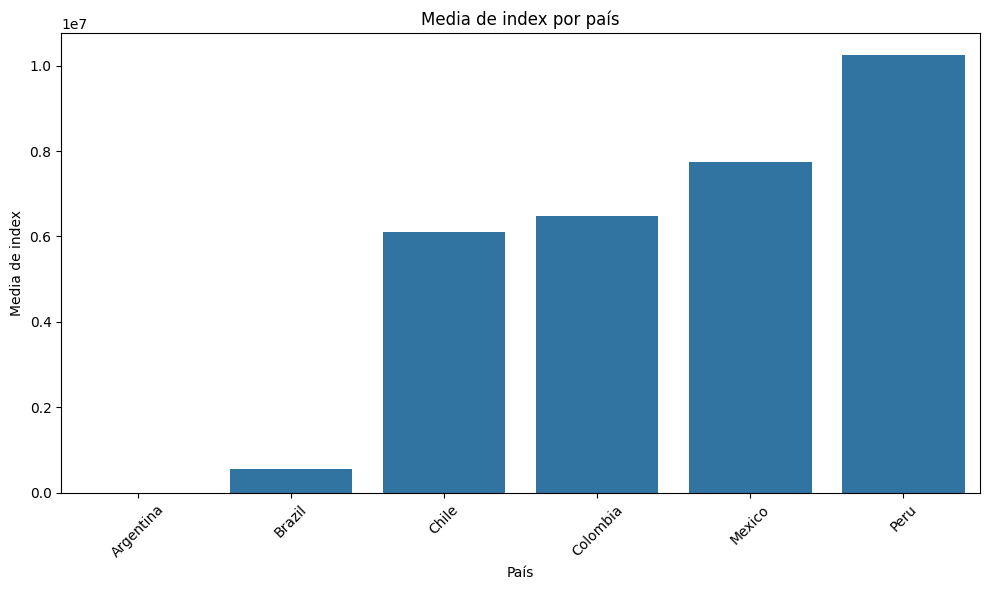

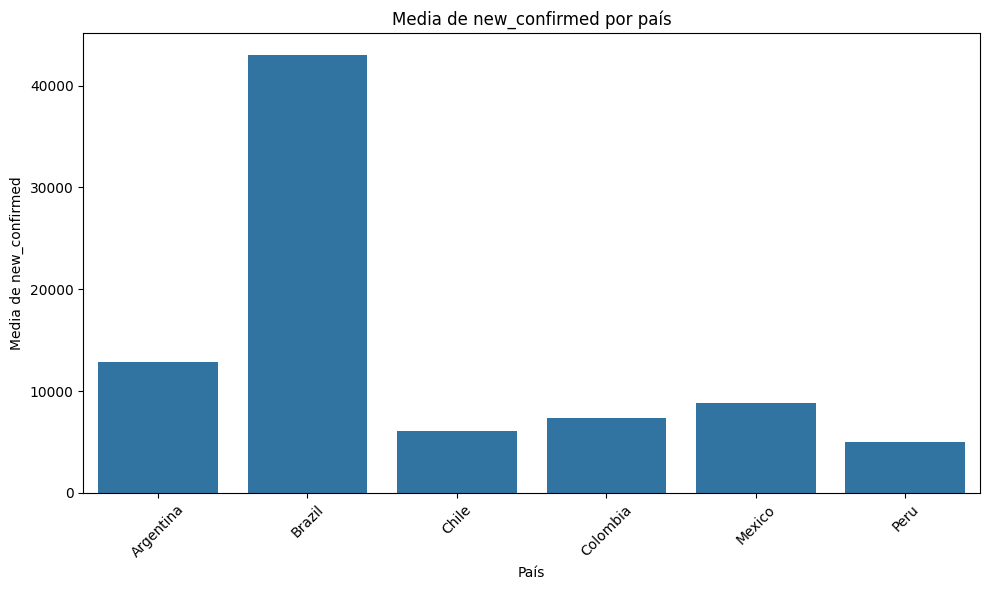

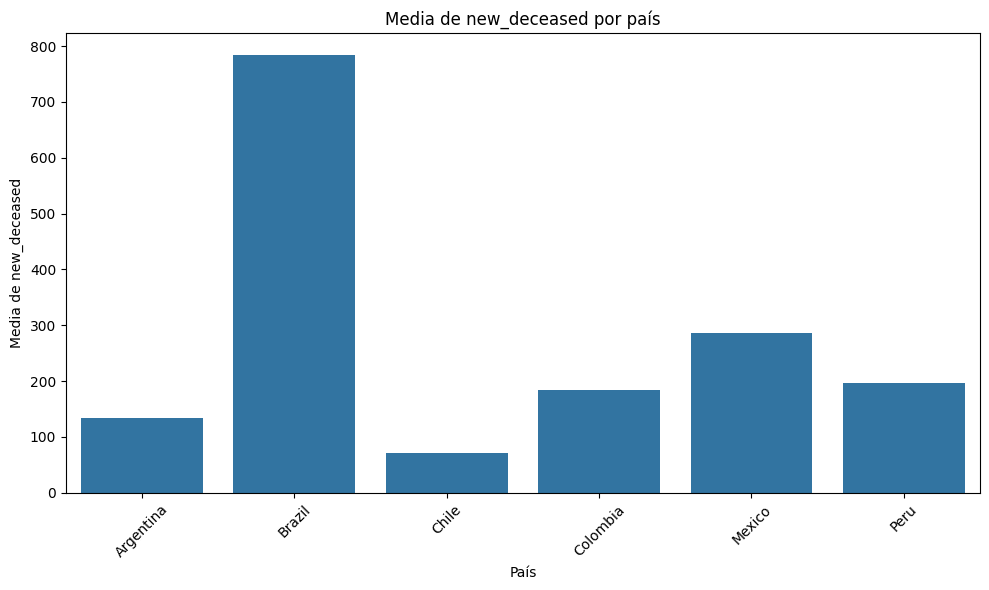

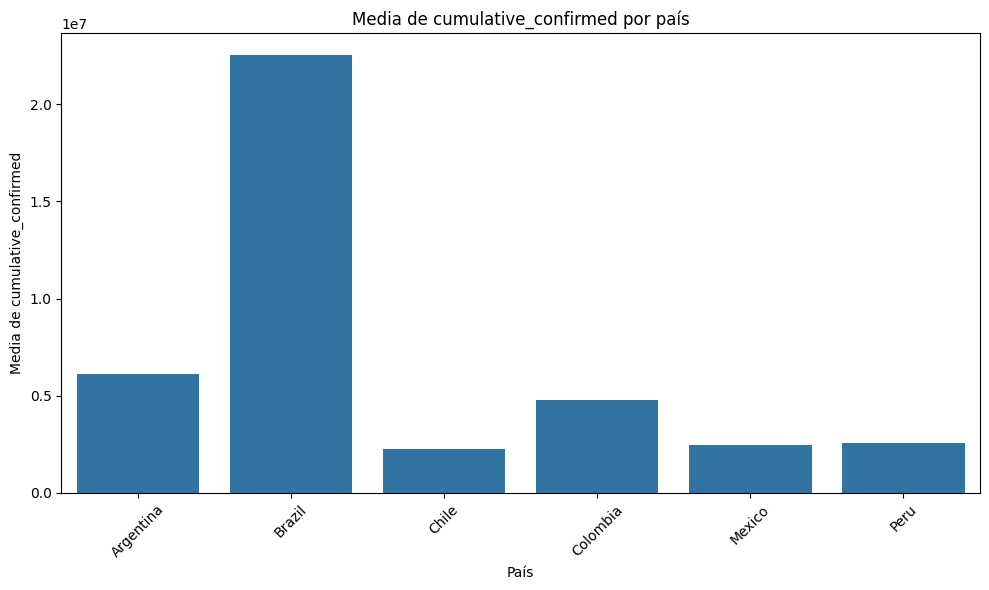

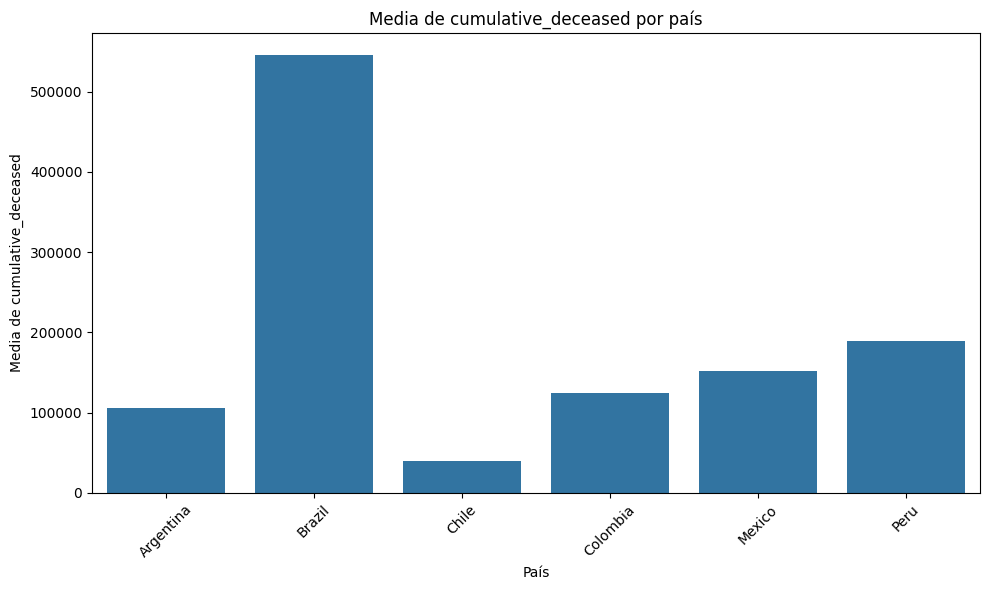

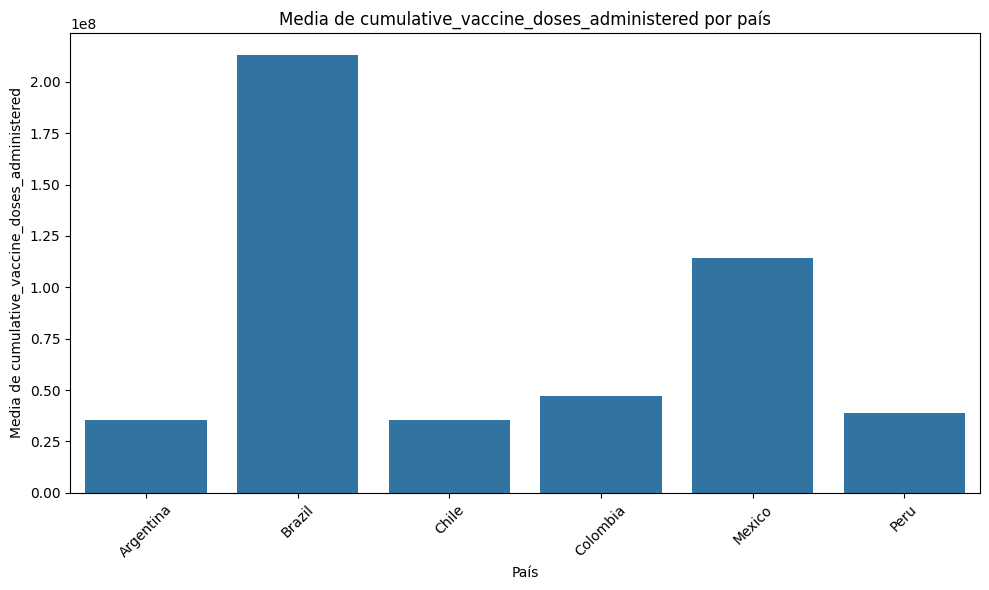

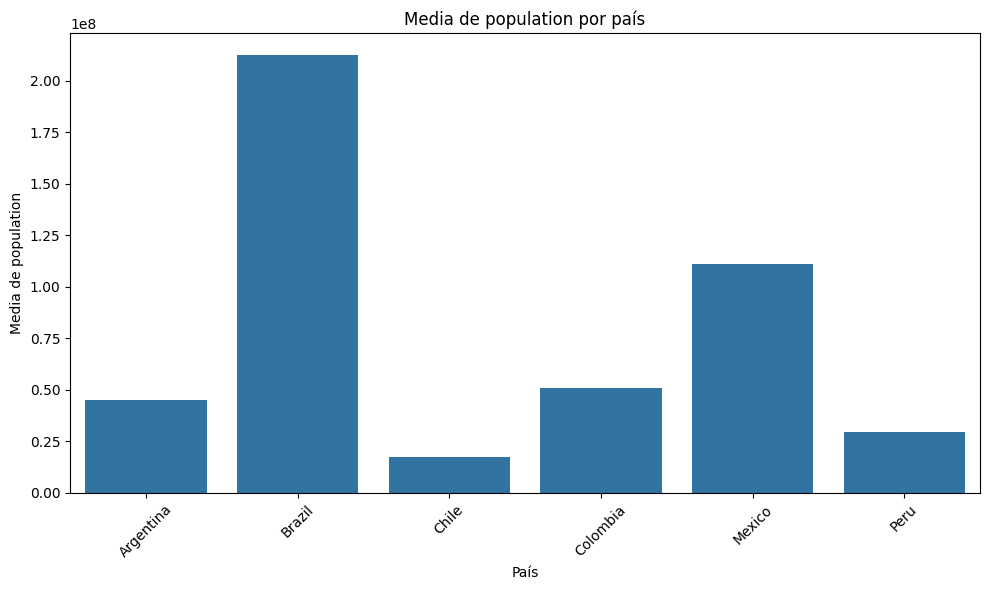

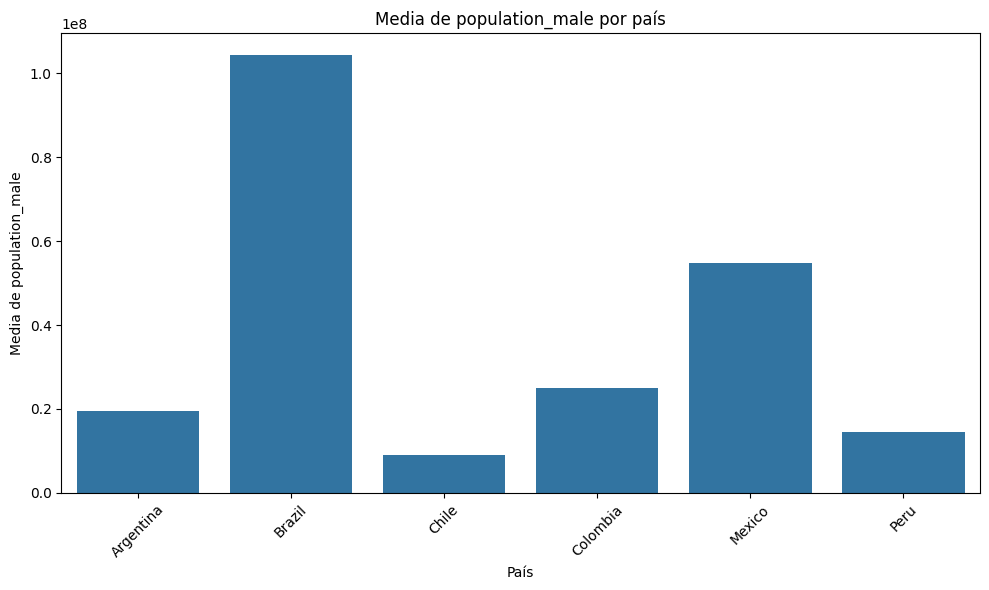

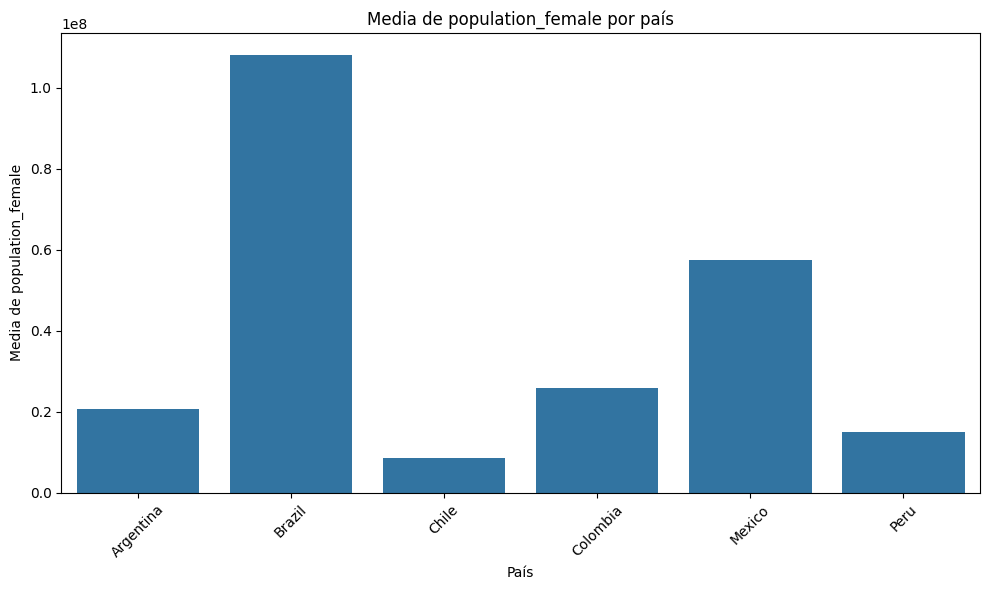

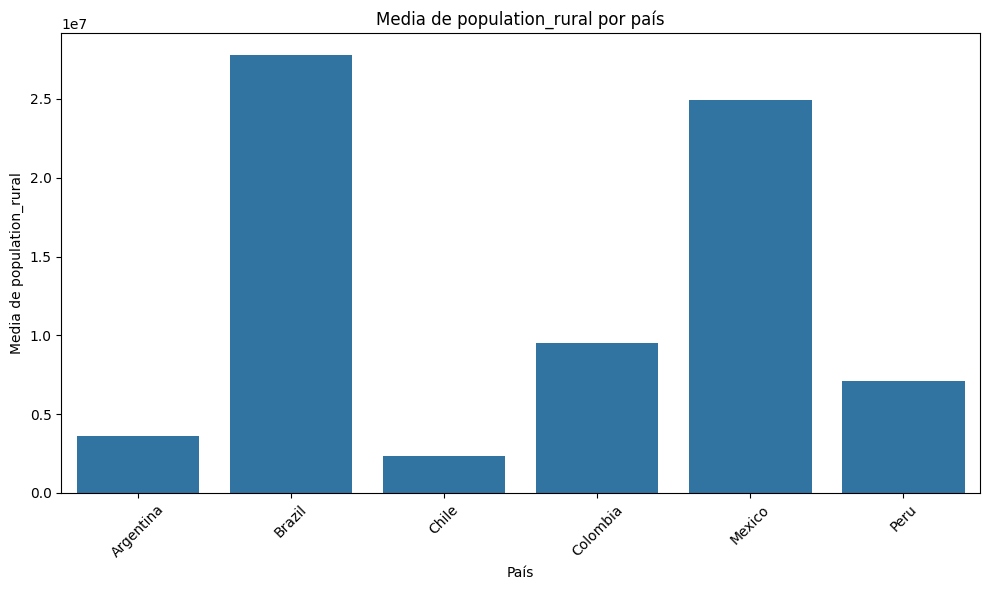

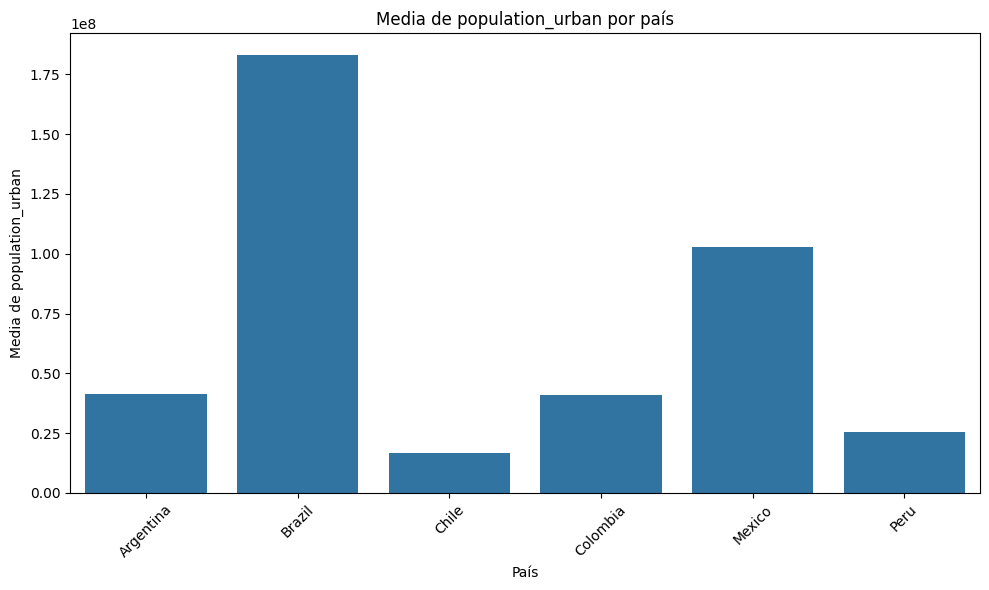

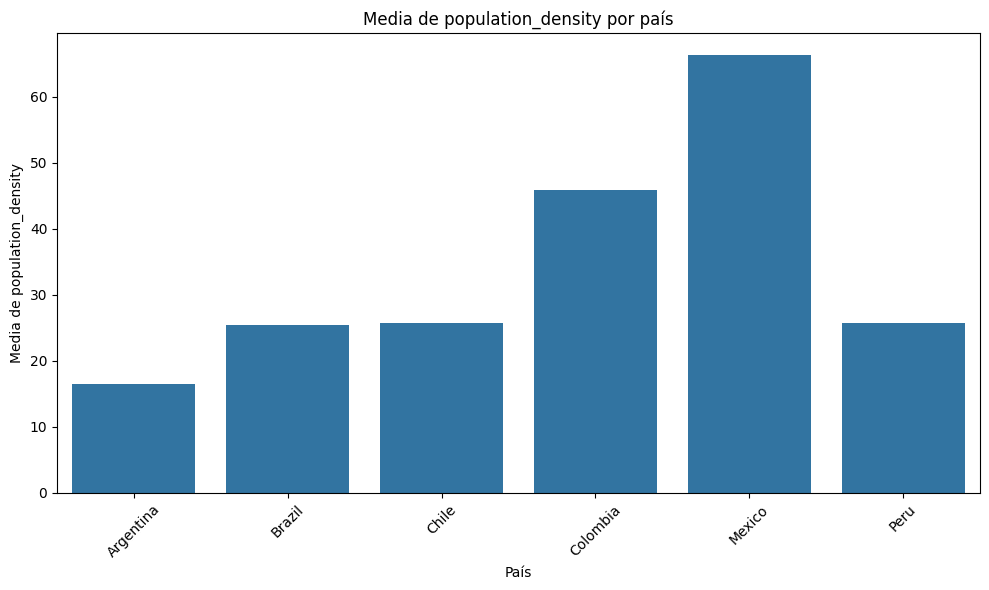

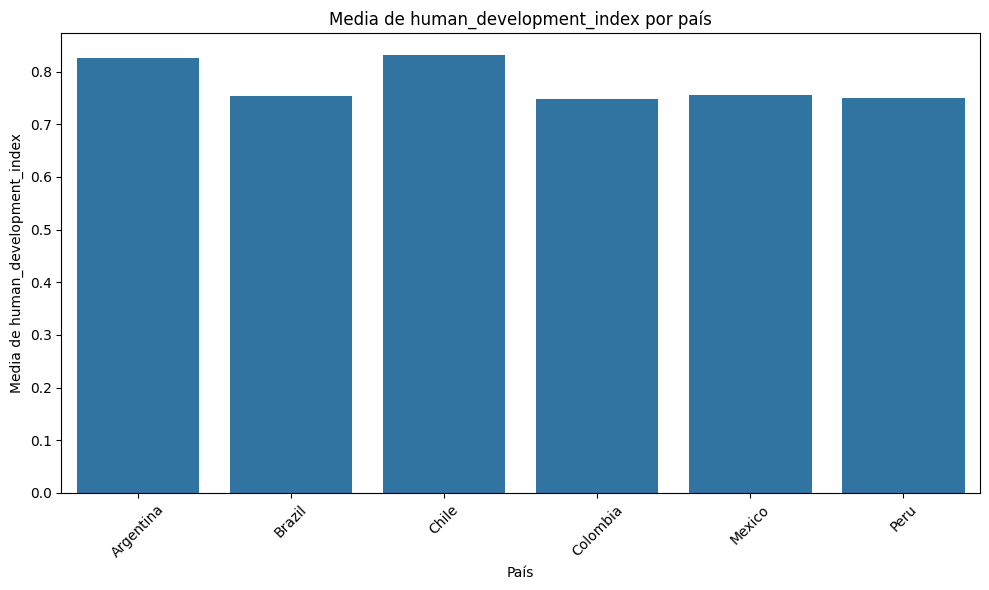

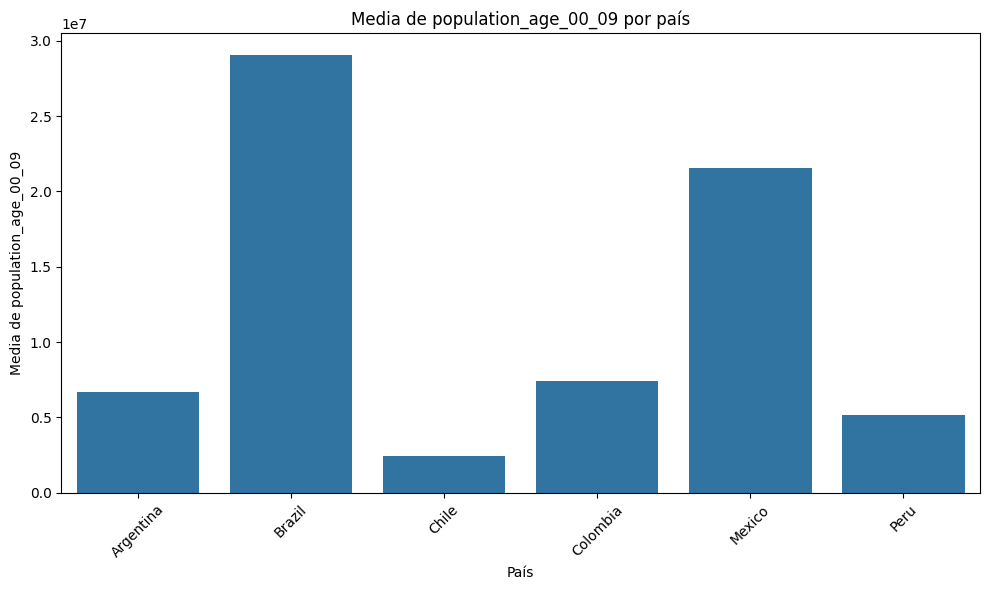

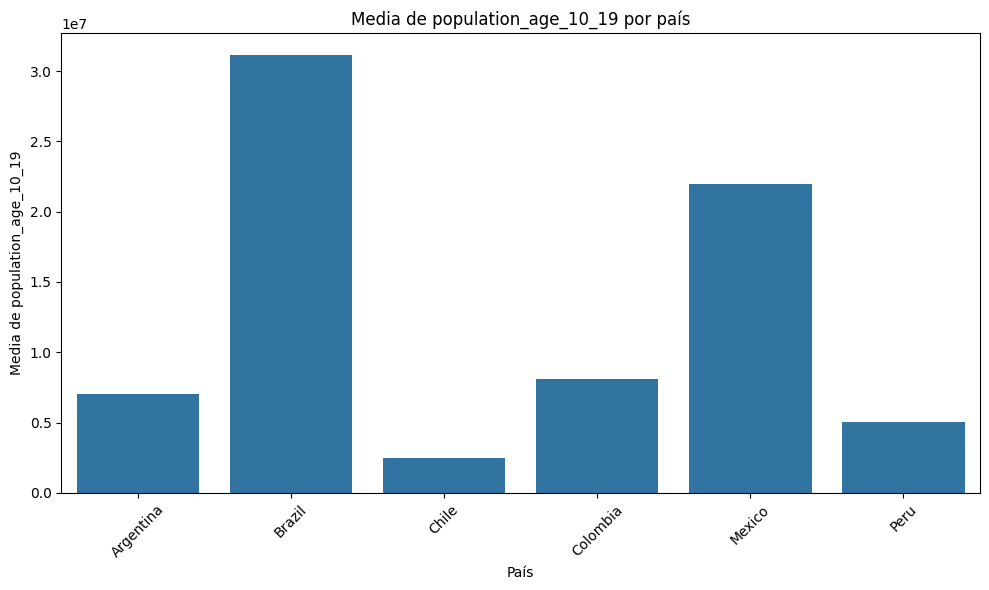

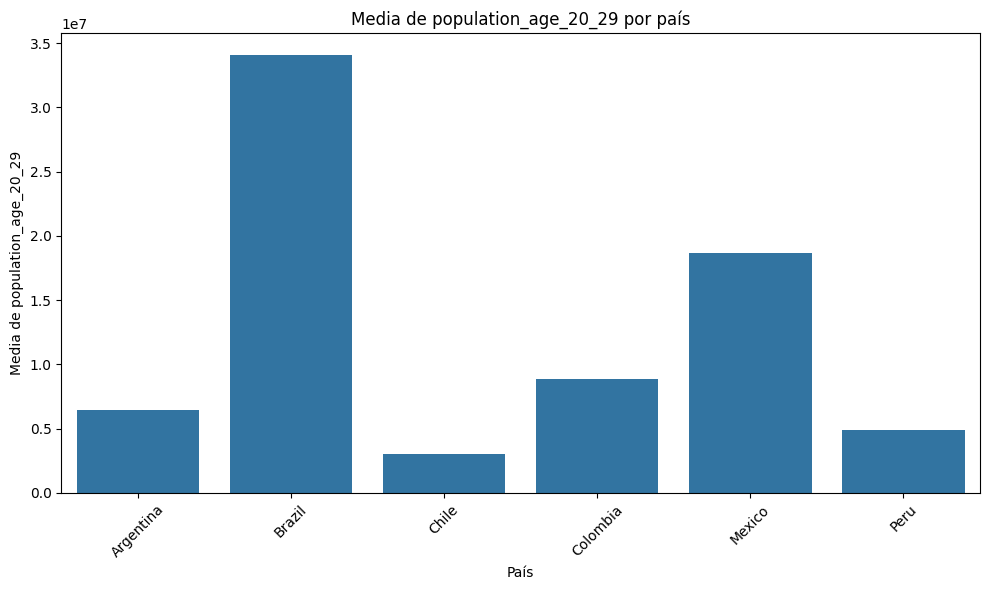

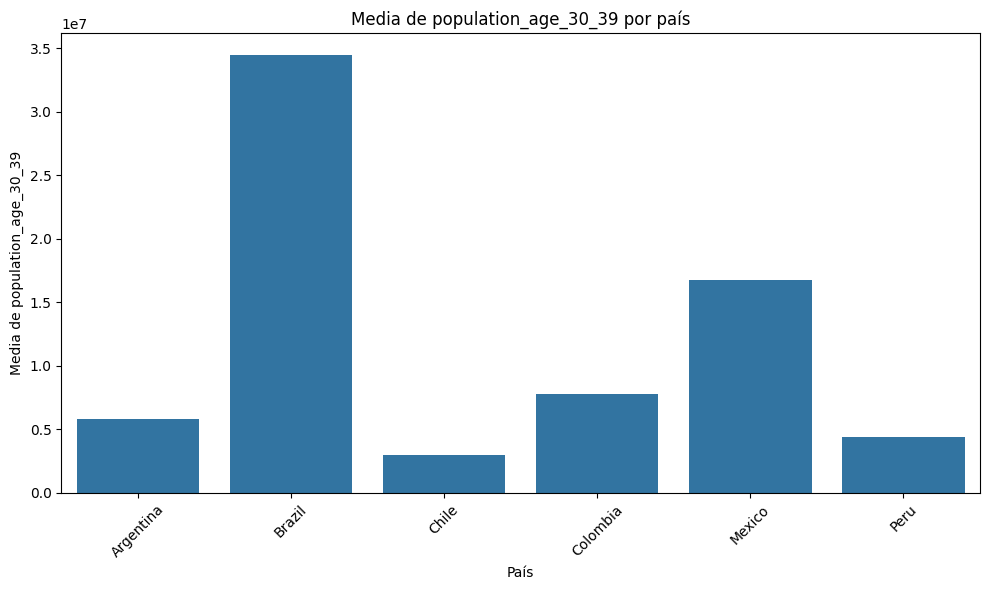

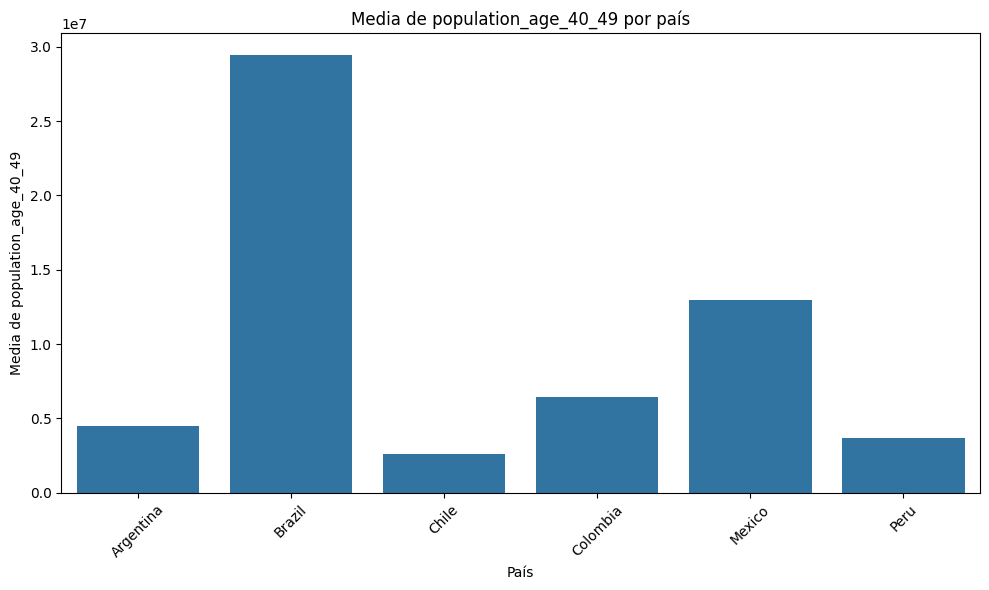

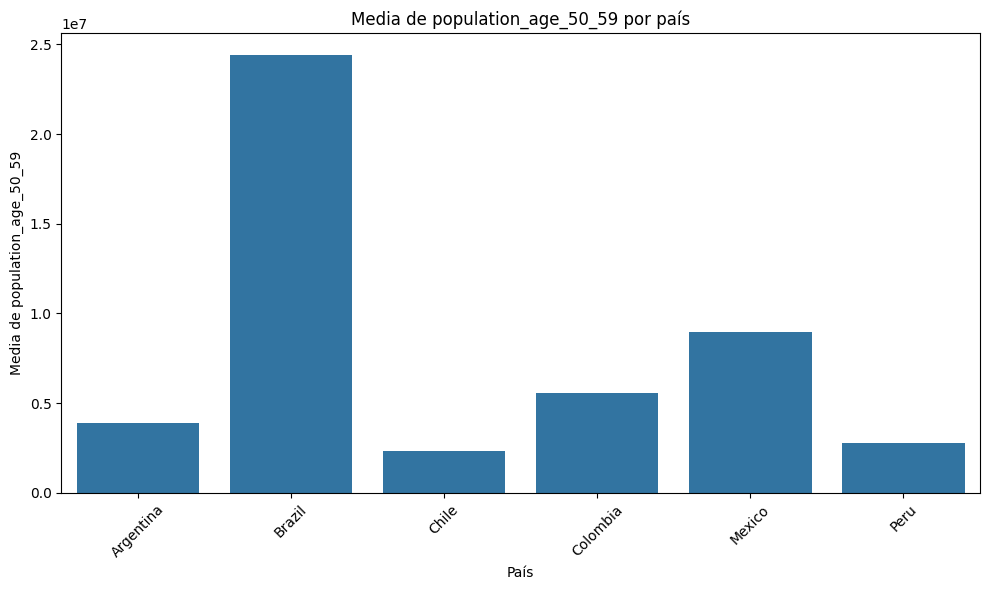

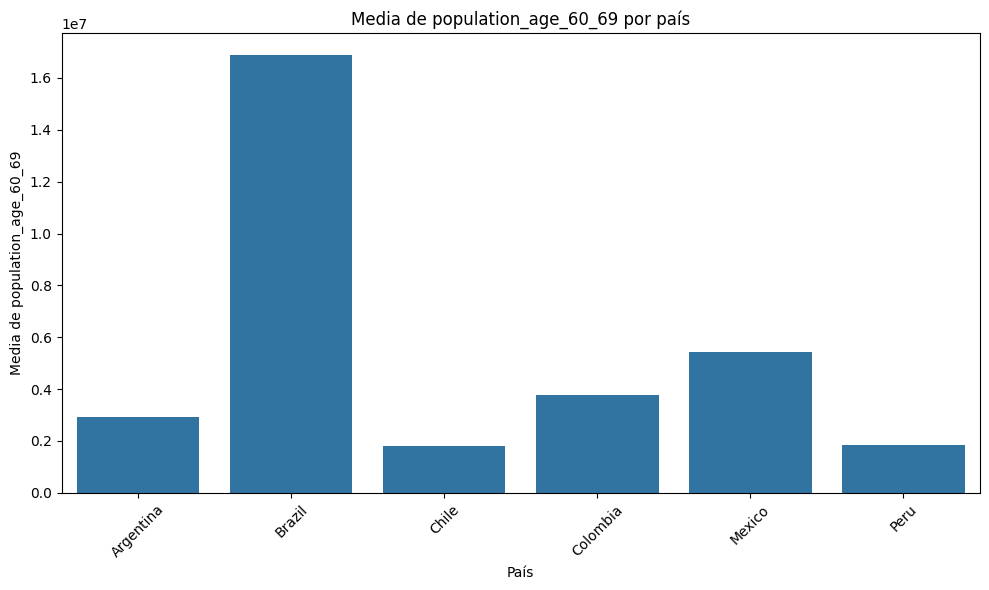

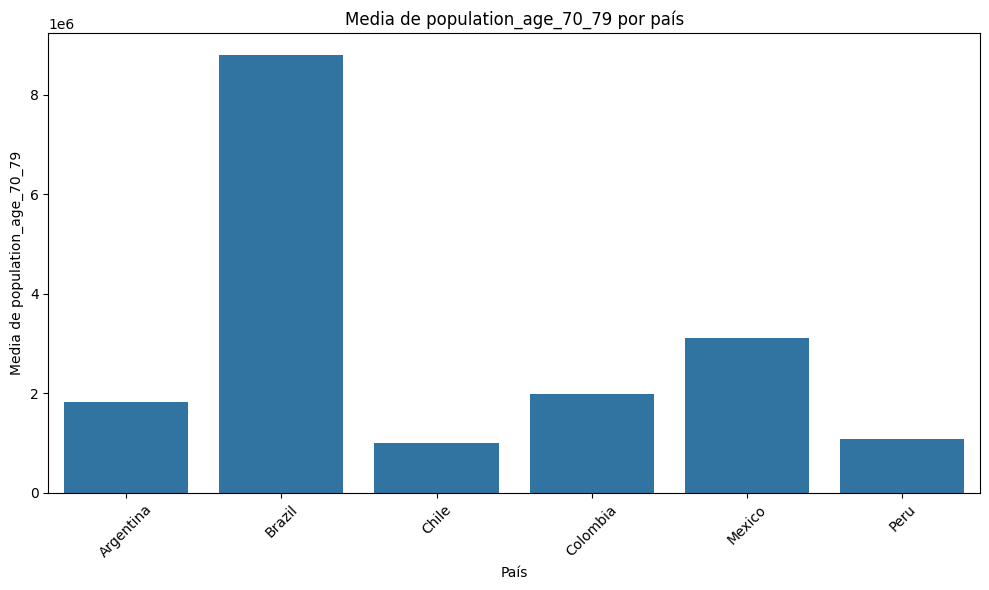

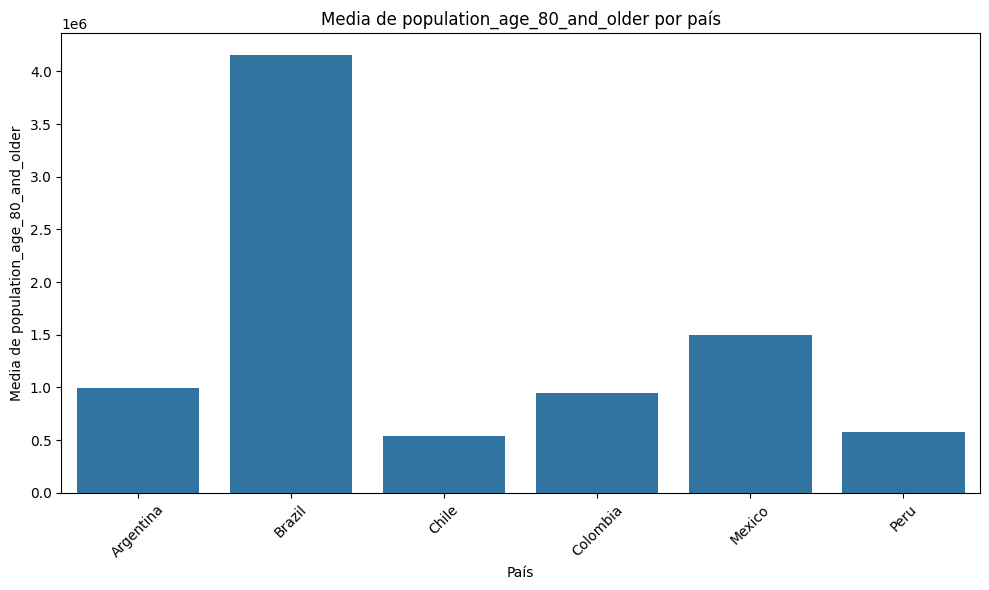

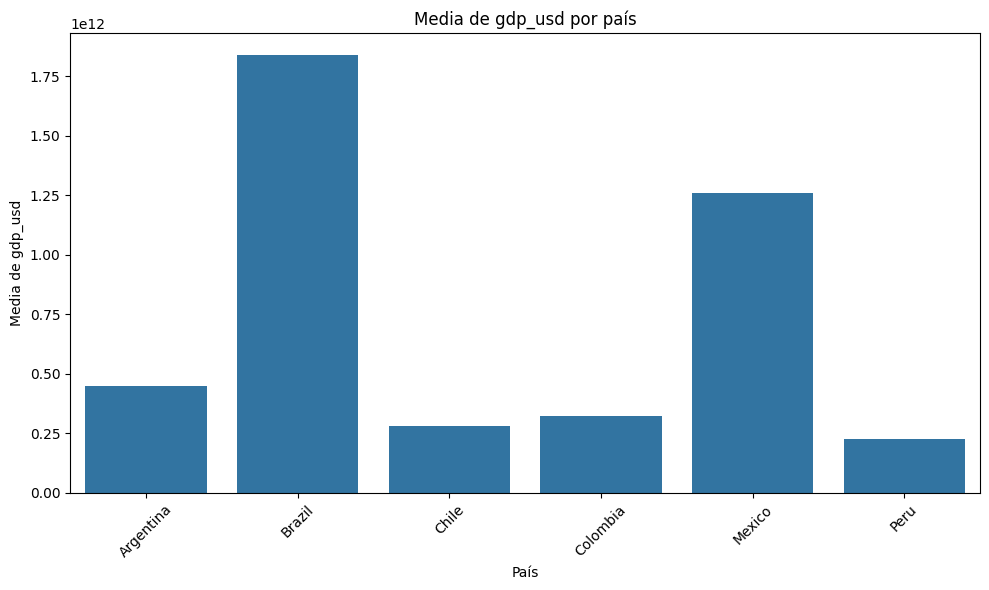

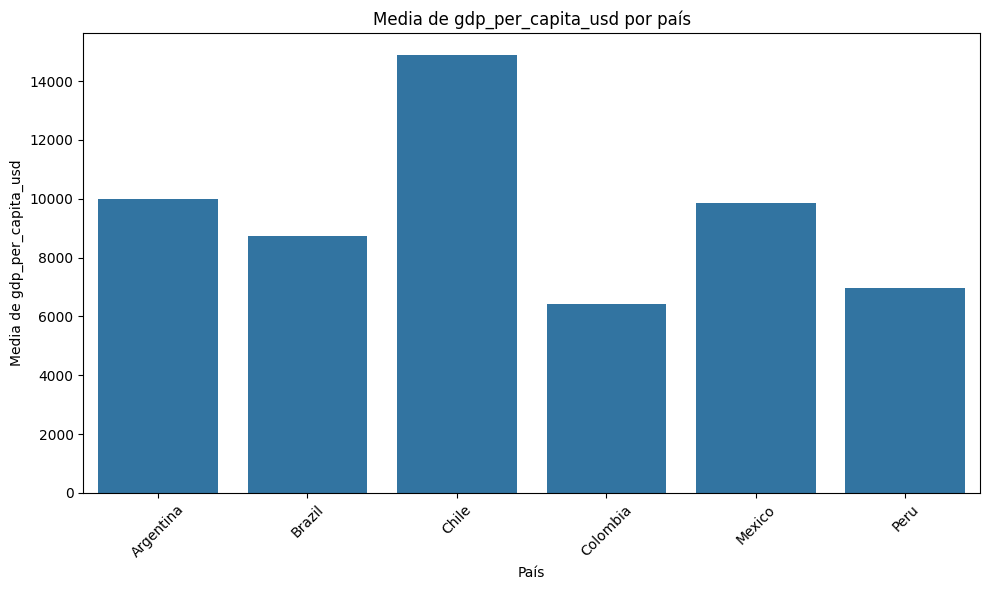

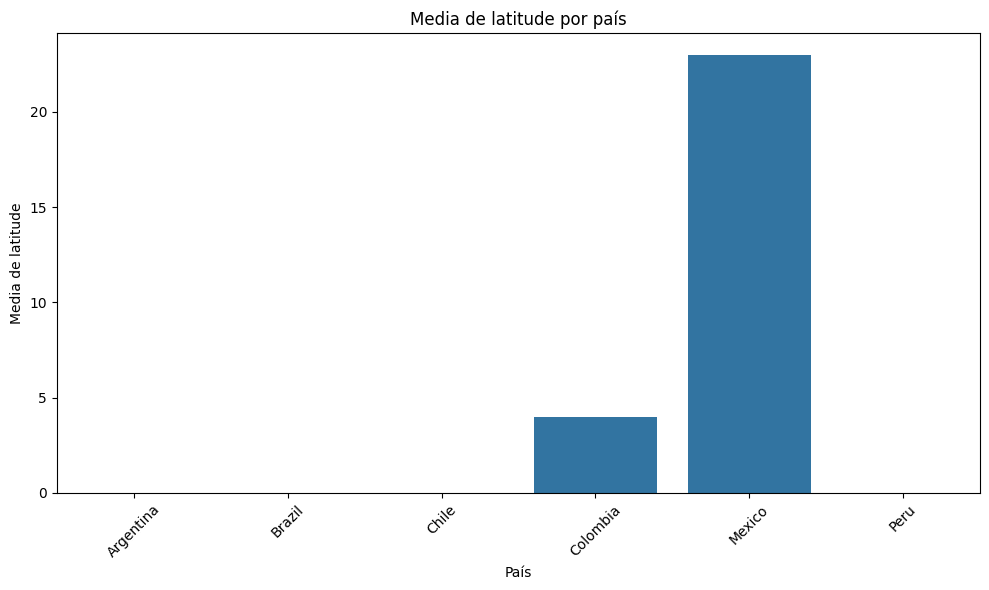

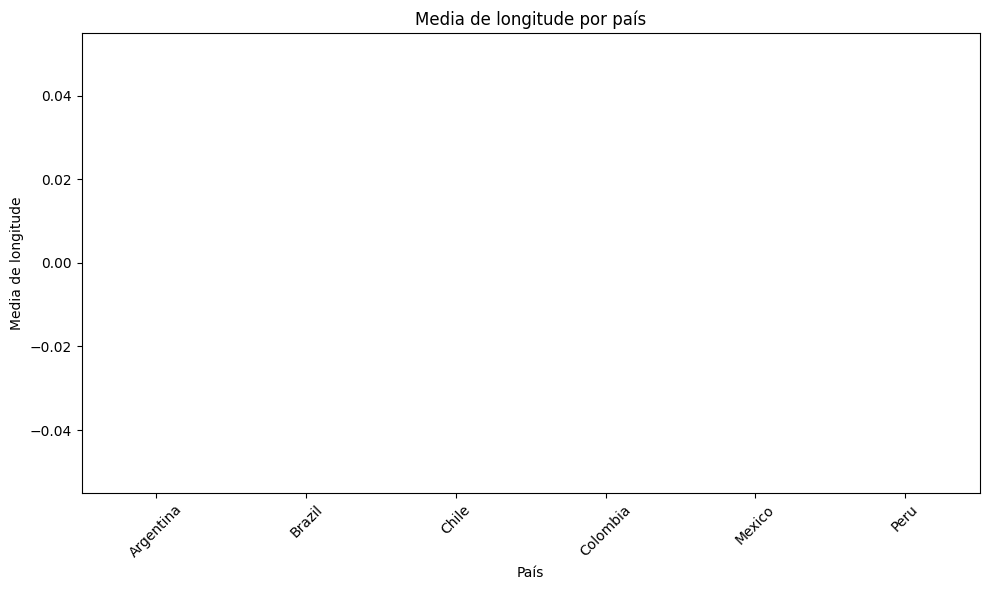

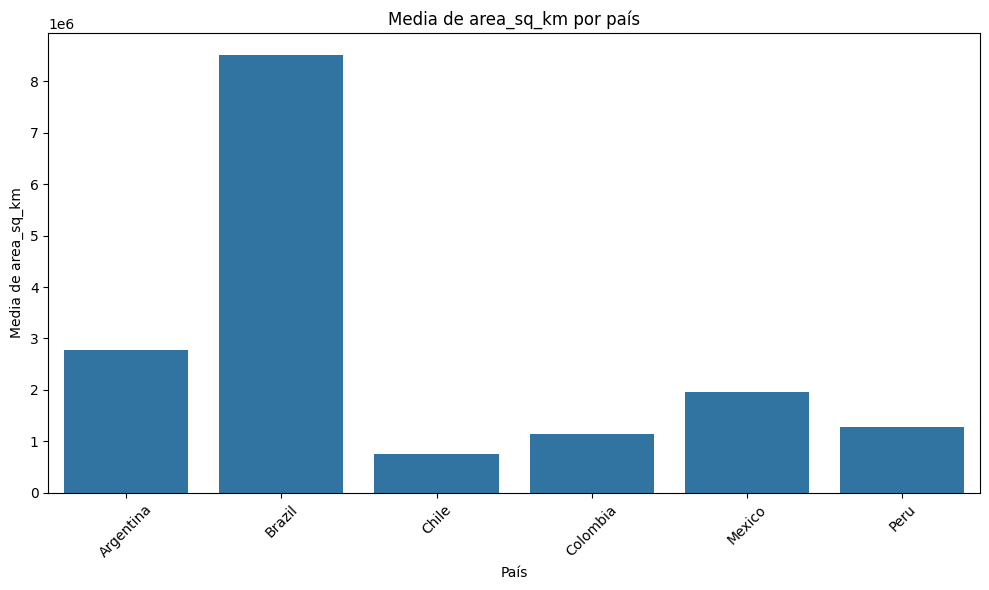

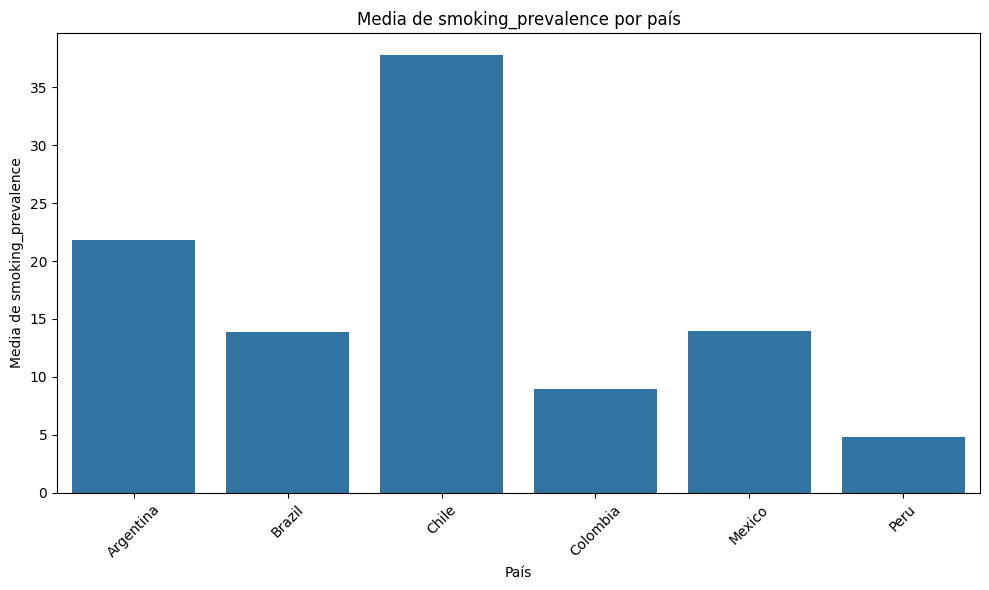

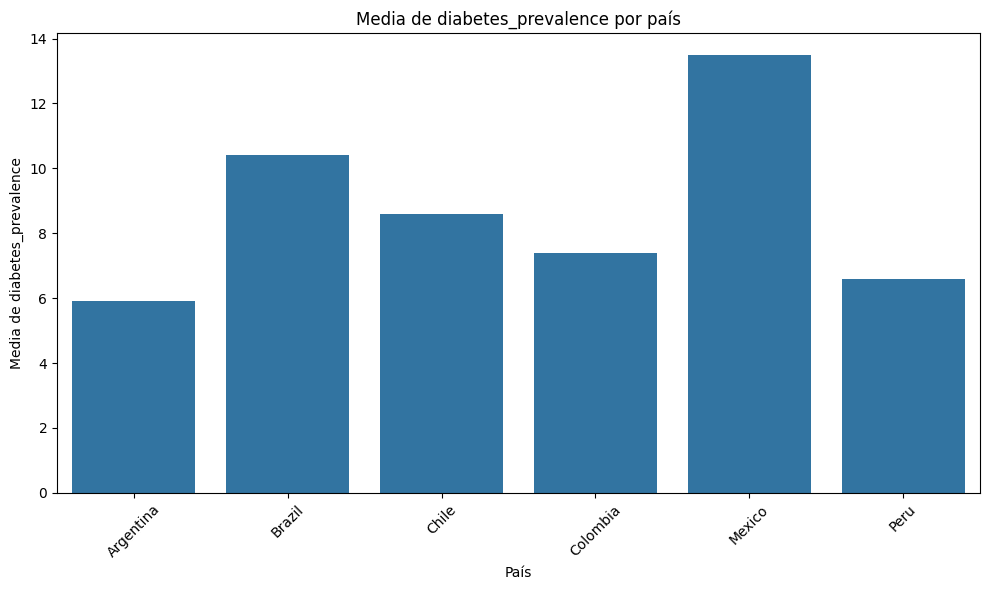

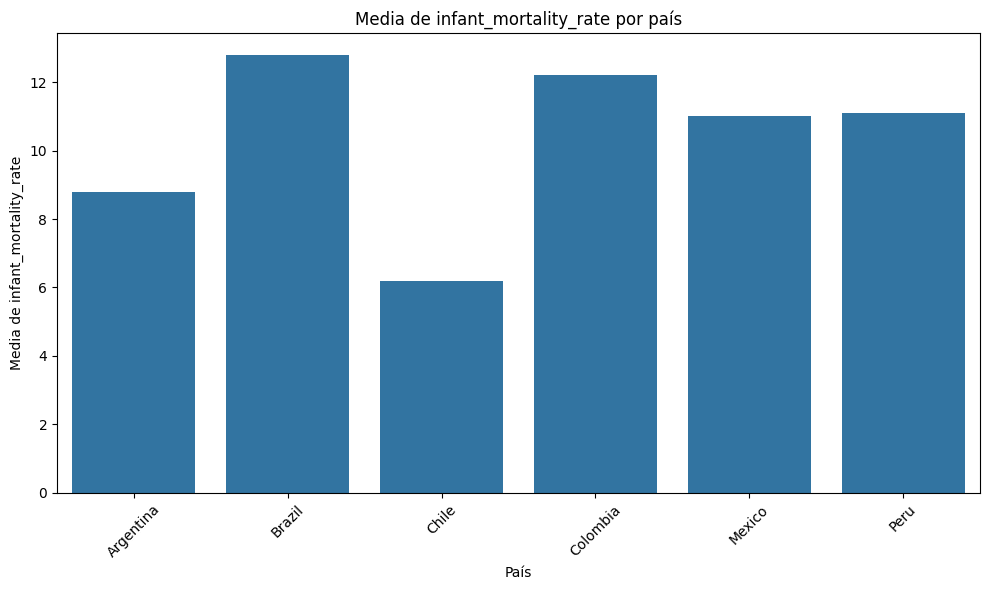

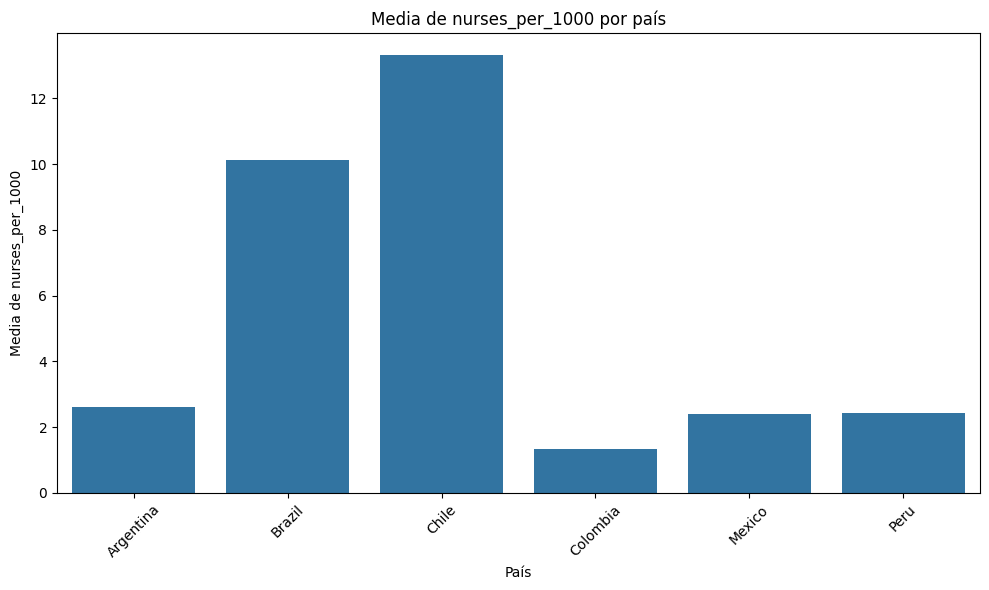

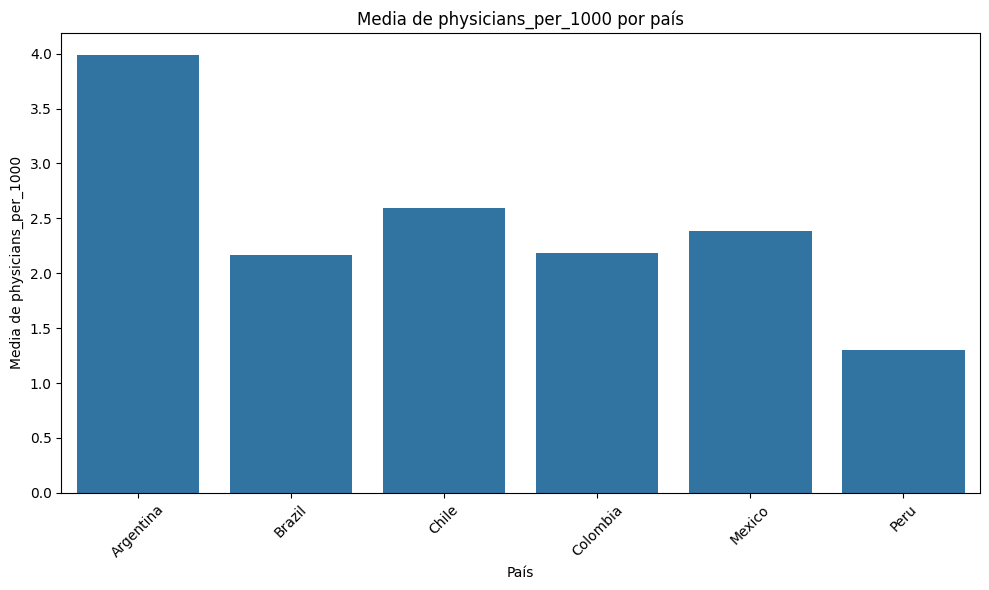

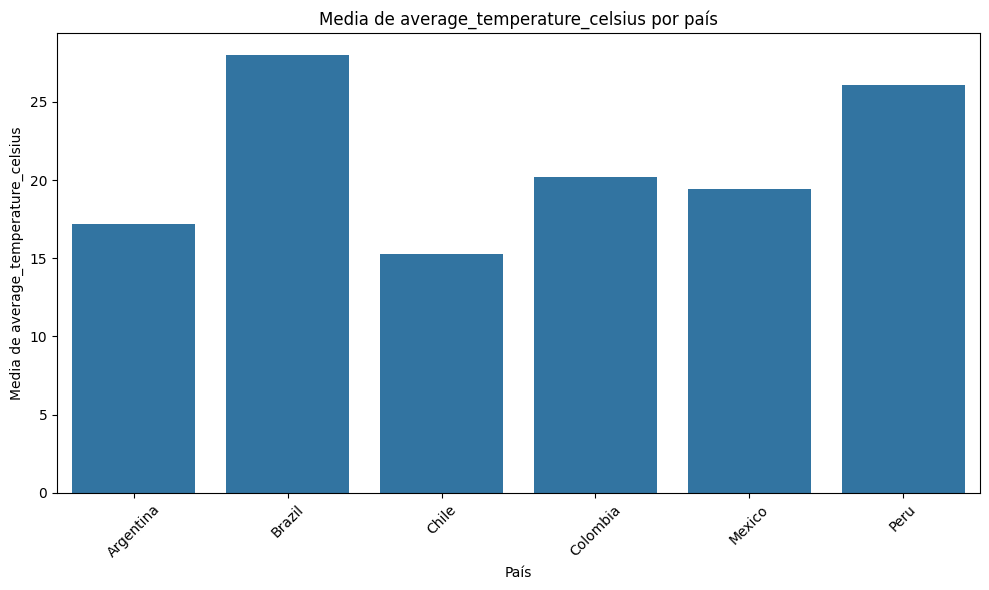

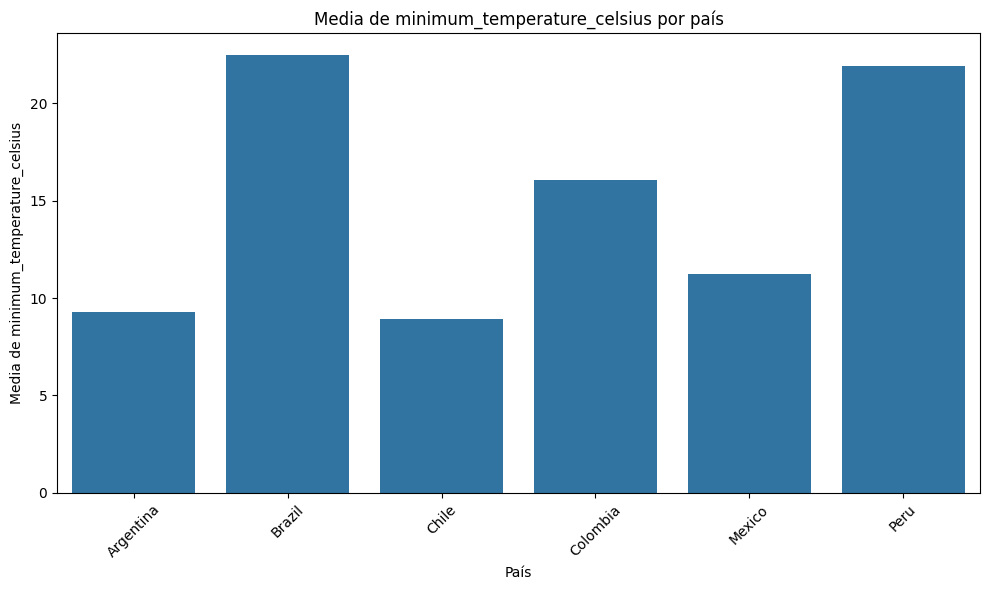

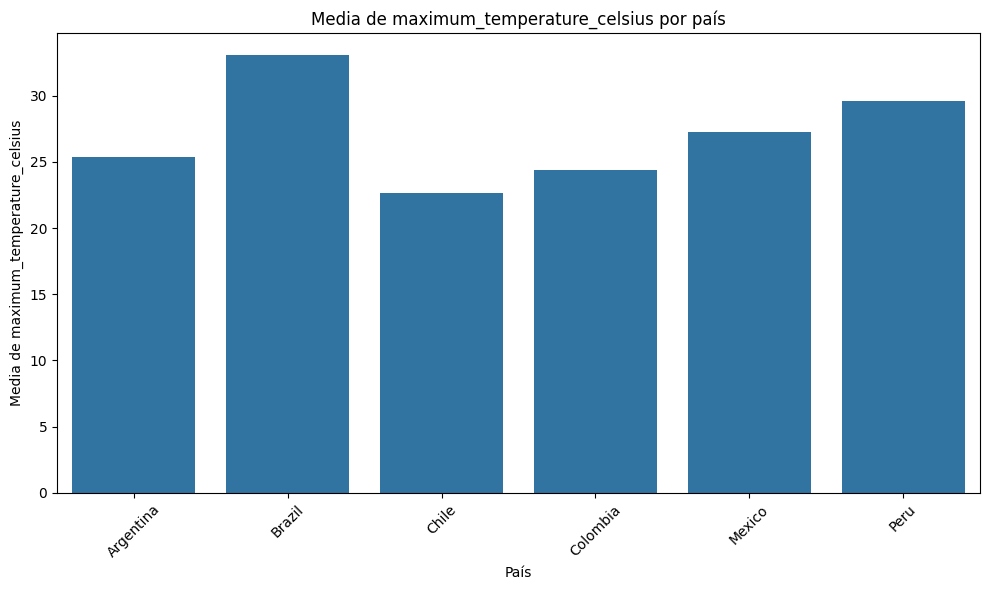

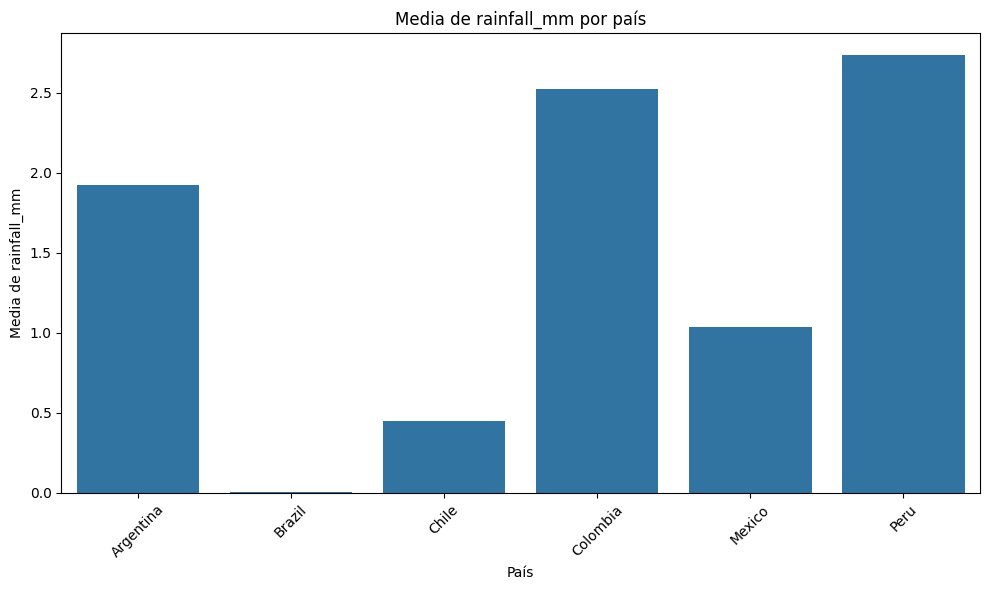

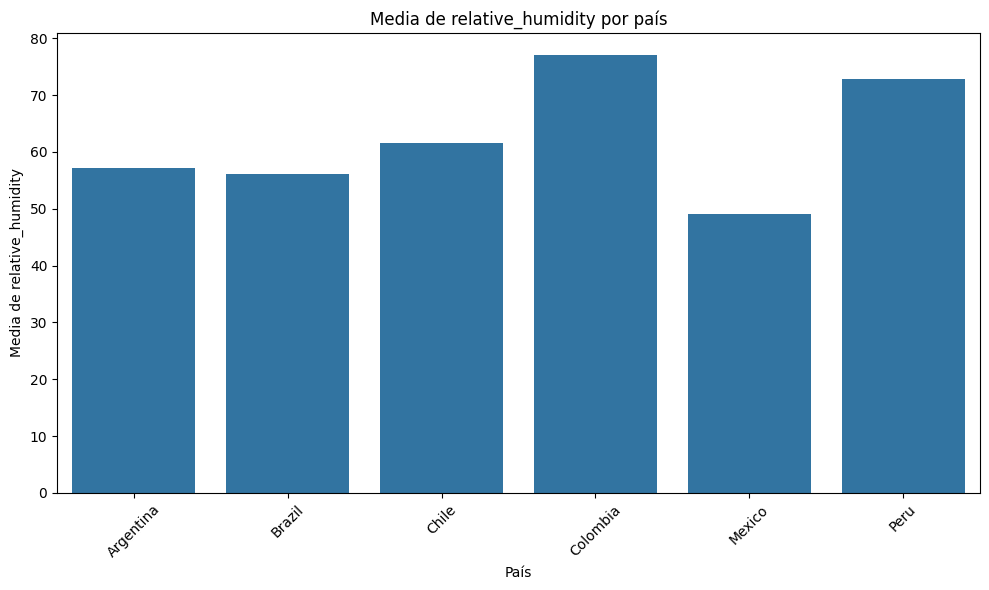

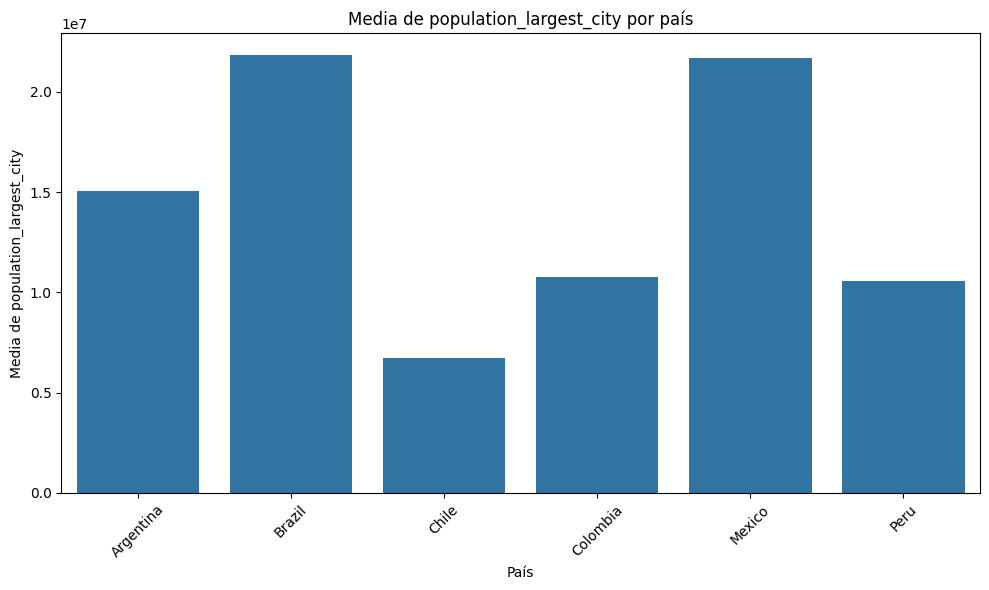

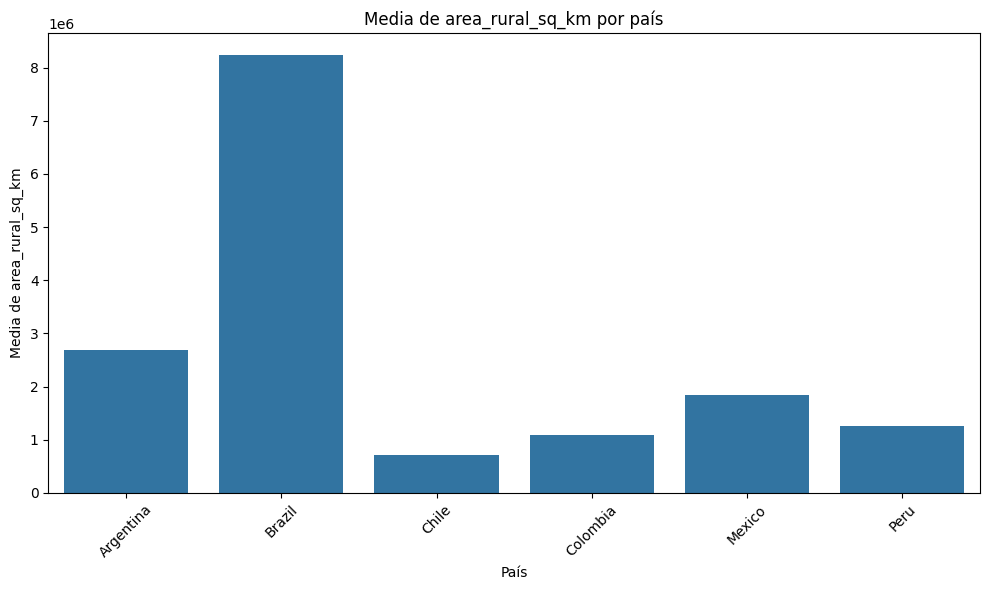

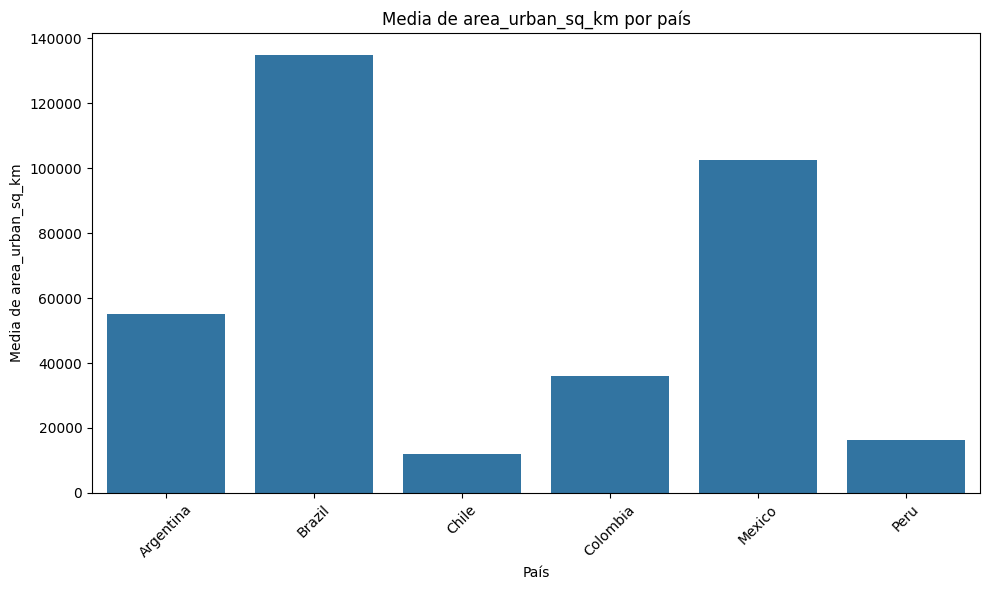

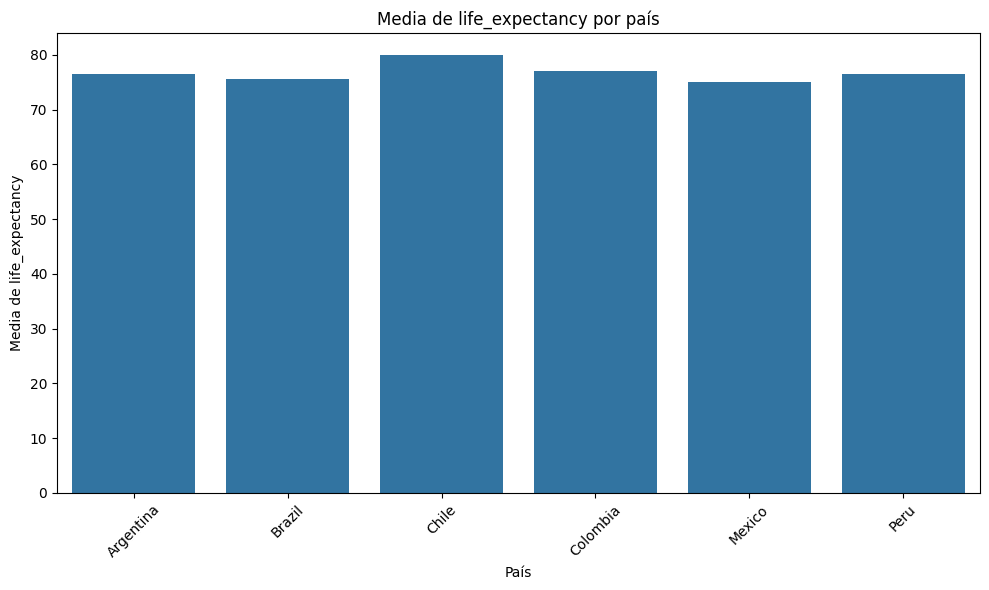

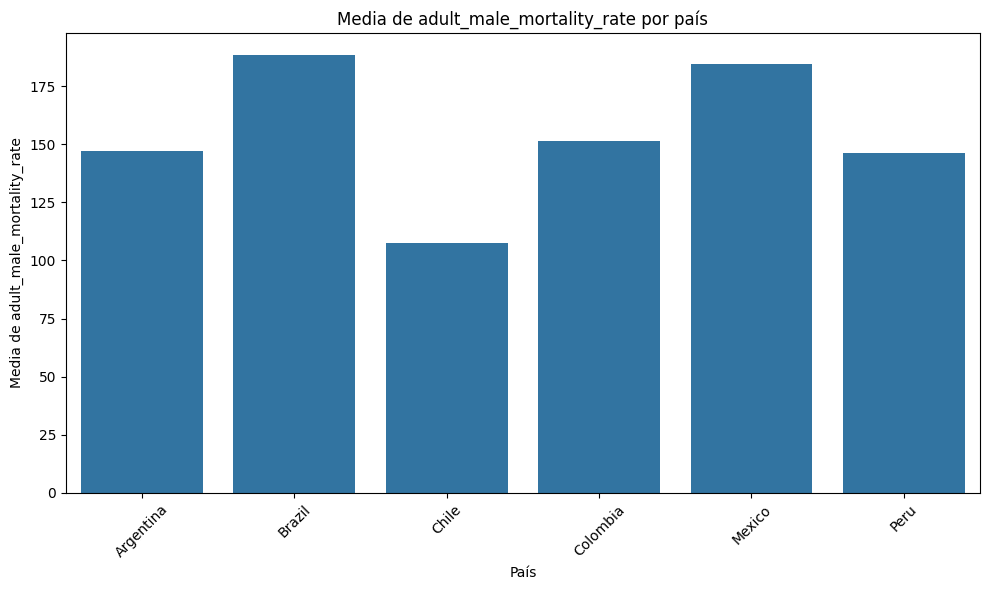

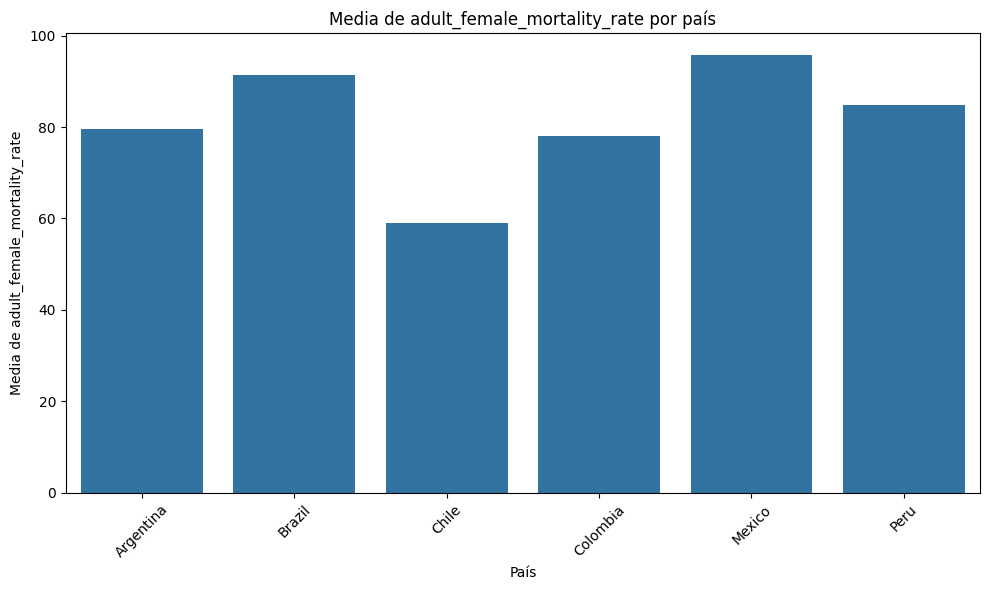

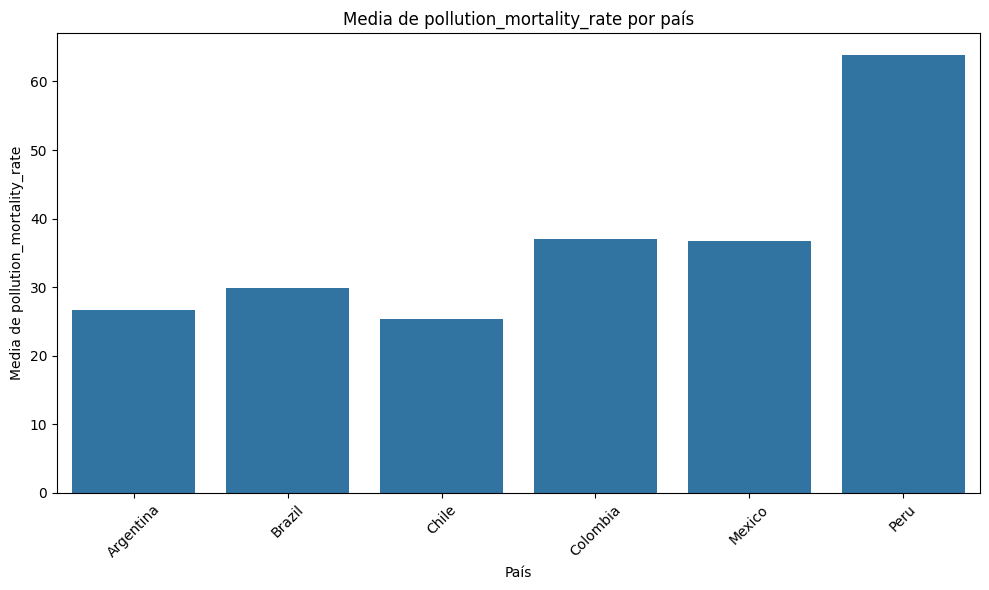

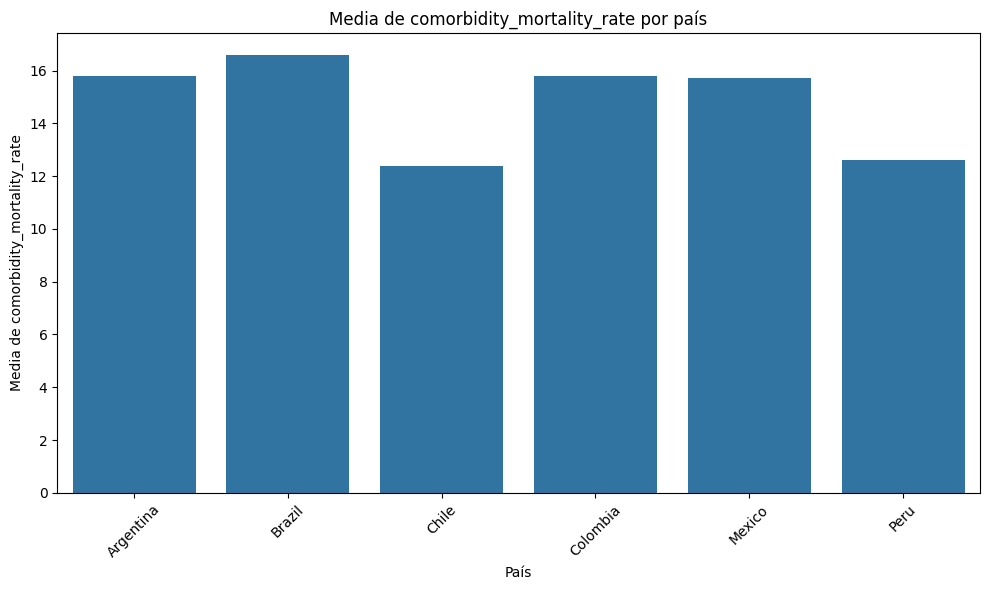

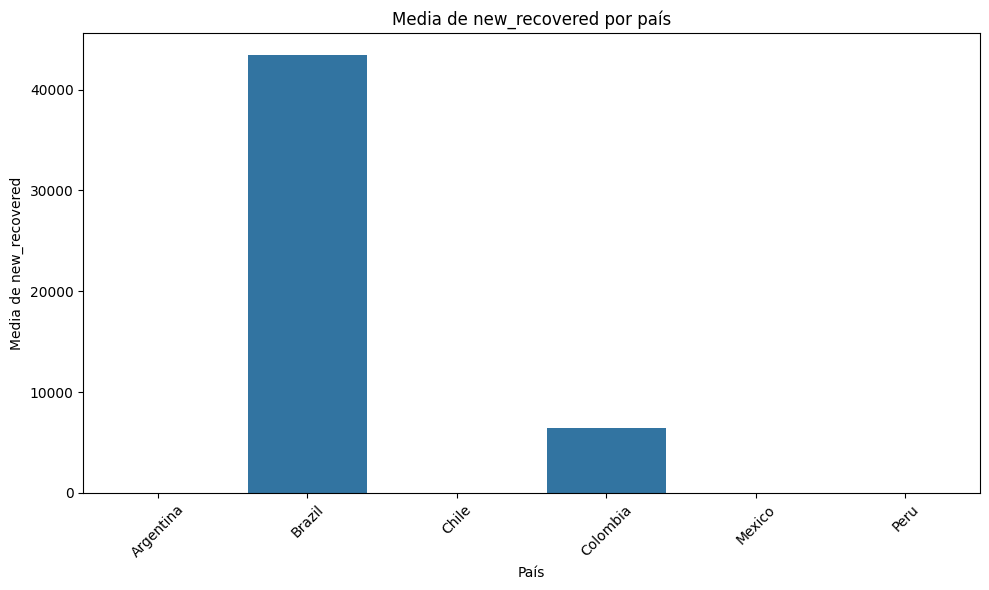

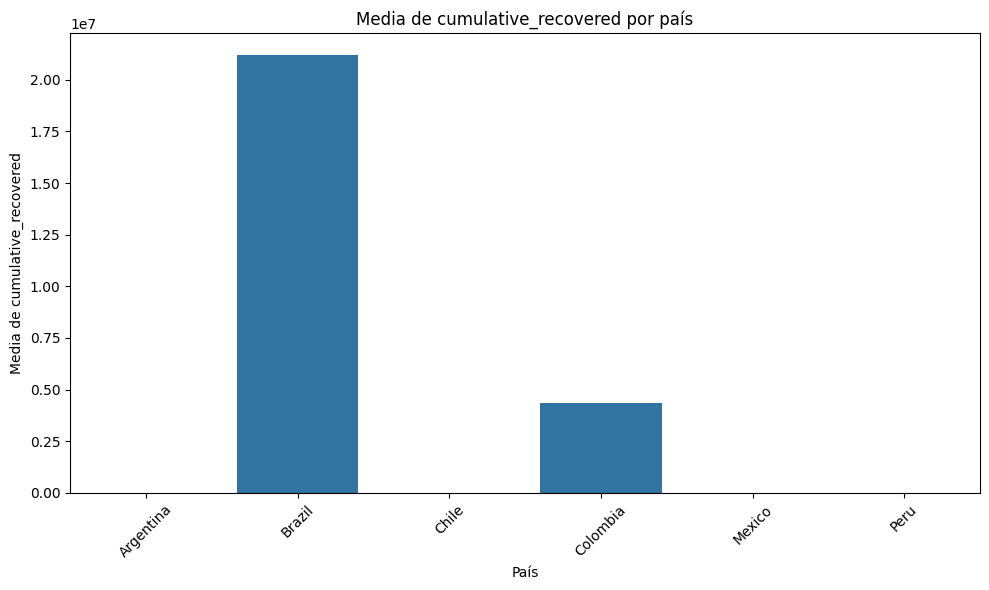

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas numéricas del DataFrame
numeric_cols = df_PI_filtrado_por_fecha.select_dtypes(include=[np.number])

# Iterar sobre cada columna numérica
for col in numeric_cols.columns:
    # Calcular la media por país para la columna actual
    media_pais = df_PI_filtrado_por_fecha.groupby('country_name')[col].mean().reset_index()
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico
    sns.barplot(data=media_pais, x='country_name', y=col)  # Crear el gráfico de barras
    plt.title(f'Media de {col} por país')  # Título del gráfico
    plt.xlabel('País')  # Etiqueta del eje x
    plt.ylabel(f'Media de {col}')  # Etiqueta del eje y
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
    plt.tight_layout()  # Ajustar el diseño del gráfico para evitar superposiciones
    plt.show()  # Mostrar el gráfico


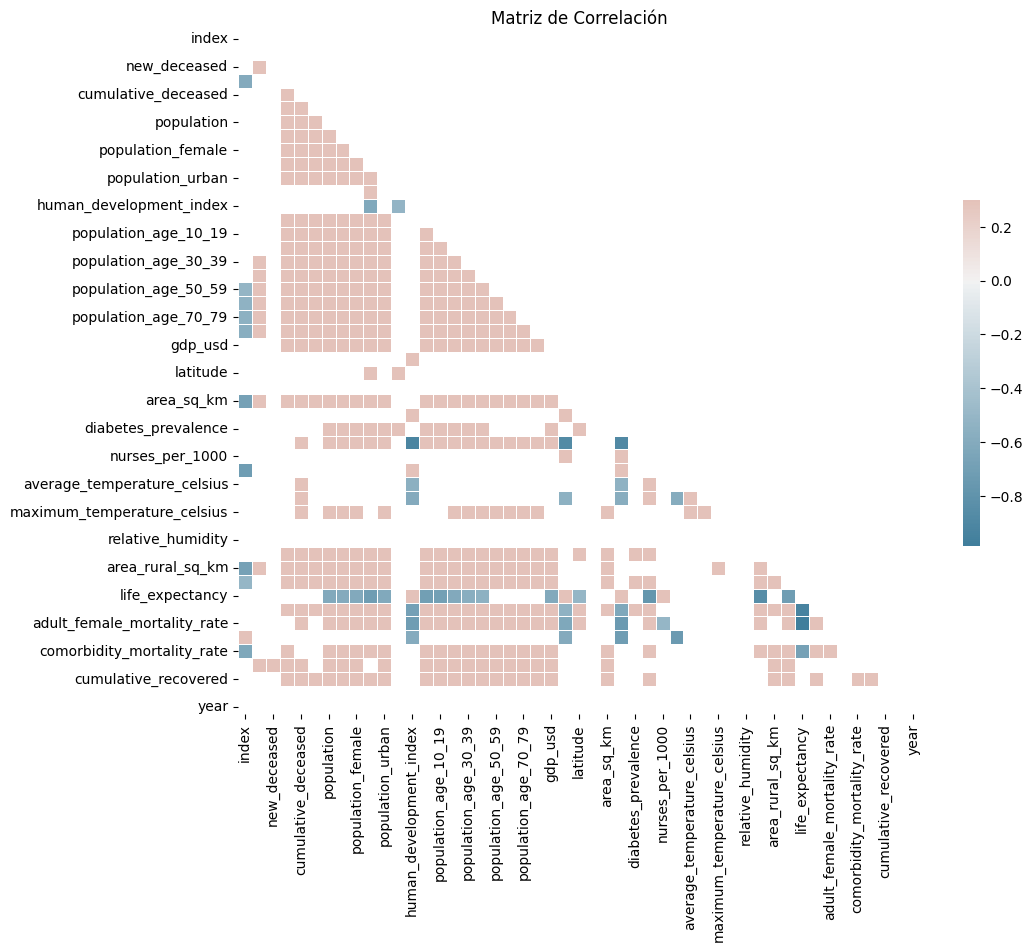

In [44]:
# Calcular la matriz de correlación
matriz_corr = numeric_cols.corr()

# Crear una máscara para la mitad inferior de la matriz de correlación
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
matriz_corr = matriz_corr[abs(matriz_corr)>abs(0.5)]
# Crear figura y ejes para el gráfico
f, ax = plt.subplots(figsize=(11, 9))

# Definir la paleta de colores para el mapa de calor
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Crear el mapa de calor de la matriz de correlación
sns.heatmap(matriz_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Configurar título del gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()


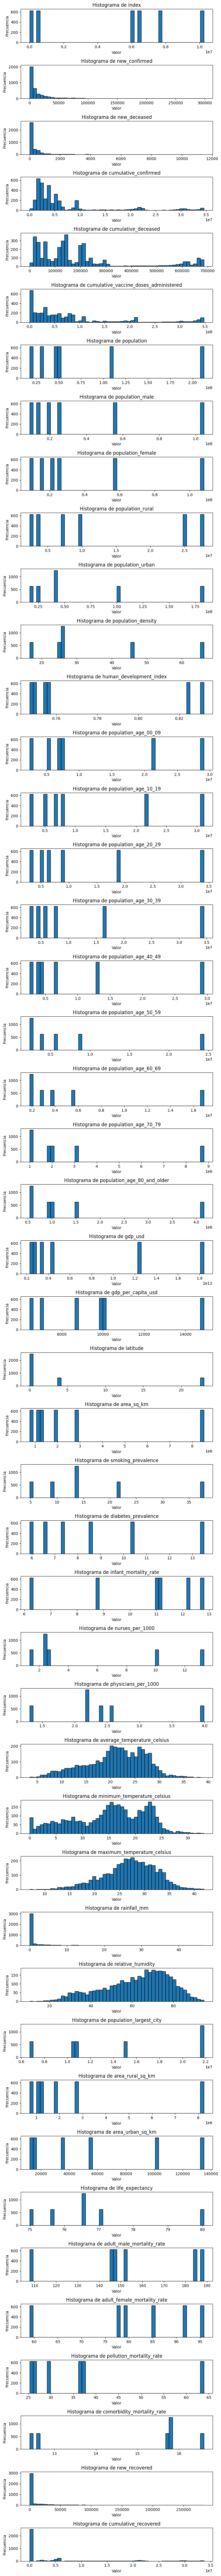

In [16]:
# Identificar las variables con cambios en los valores únicos
vars_with_changes = numeric_cols.columns[numeric_cols.nunique() > 1]

# Crear una figura con subtramas para cada variable
fig, axs = plt.subplots(nrows=len(vars_with_changes), ncols=1, figsize=(8, 2*len(vars_with_changes)))

# Iterar a través de cada variable y crear un histograma
for i, var in enumerate(vars_with_changes):
    axs[i].hist(numeric_cols[var], bins=50, edgecolor='black')  # Crear histograma con 50 bins
    axs[i].set_title(f'Histograma de {var}')  # Establecer el título del histograma
    axs[i].set_xlabel('Valor')  # Etiqueta del eje x
    axs[i].set_ylabel('Frecuencia')  # Etiqueta del eje y

# Ajustar el diseño de las subtramas y mostrar el gráfico
plt.tight_layout()
plt.show()


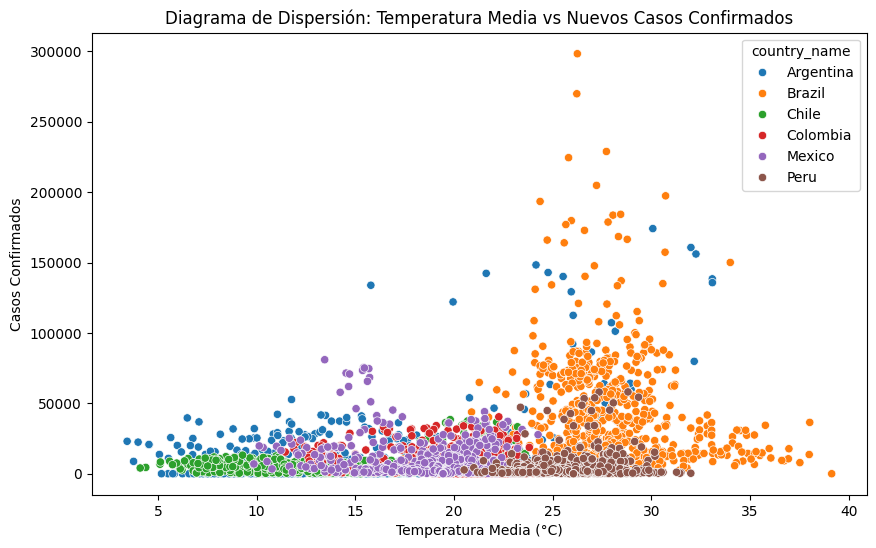

In [17]:
# Crear el diagrama de dispersión
fig, ax = plt.subplots(figsize=(10, 6))  # Definir el tamaño de la figura
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', hue='country_name', data=df_PI_filtrado_por_fecha, ax=ax)

# Añadir título y etiquetas de los ejes
plt.title('Diagrama de Dispersión: Temperatura Media vs Nuevos Casos Confirmados')  # Título del gráfico
plt.xlabel('Temperatura Media (°C)')  # Etiqueta del eje x
plt.ylabel('Casos Confirmados')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

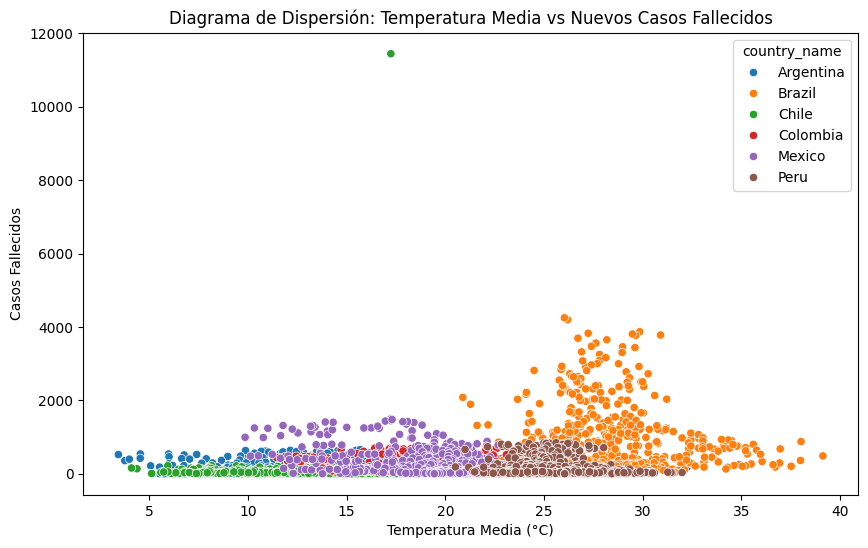

In [18]:
# Crear el diagrama de dispersión
fig, ax = plt.subplots(figsize=(10, 6))  # Definir el tamaño de la figura
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', hue='country_name', data=df_PI_filtrado_por_fecha, ax=ax)

# Añadir título y etiquetas de los ejes
plt.title('Diagrama de Dispersión: Temperatura Media vs Nuevos Casos Fallecidos')  # Título del gráfico
plt.xlabel('Temperatura Media (°C)')  # Etiqueta del eje x
plt.ylabel('Casos Fallecidos')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

C:\Users\Rembert\AppData\Local\Temp\ipykernel_9572\3039240189.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dosis_por_fecha_pais = df_PI_filtrado_por_fecha.pivot_table(index='date', columns='country_name', values='cumulative_vaccine_doses_administered', aggfunc='mean').resample('M').mean().reset_index()


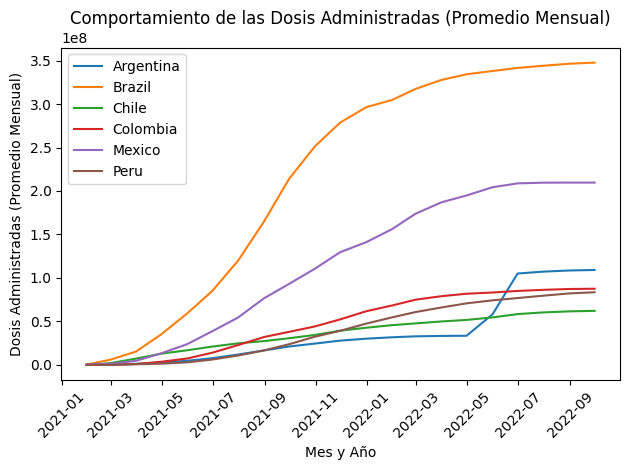

In [19]:
# Resample de los datos por mes y año y calcular el promedio de dosis administradas
dosis_por_fecha_pais = df_PI_filtrado_por_fecha.pivot_table(index='date', columns='country_name', values='cumulative_vaccine_doses_administered', aggfunc='mean').resample('M').mean().reset_index()

# Crear un gráfico de líneas con múltiples líneas para cada país
for country in dosis_por_fecha_pais.columns[1:]:  # iterar sobre las columnas de país (excluyendo 'date')
    plt.plot(dosis_por_fecha_pais['date'], dosis_por_fecha_pais[country], label=country)  # trazar la línea para cada país

# Añadir título y etiquetas
plt.title('Comportamiento de las Dosis Administradas (Promedio Mensual)')  # Título del gráfico
plt.xlabel('Mes y Año')  # Etiqueta del eje x
plt.ylabel('Dosis Administradas (Promedio Mensual)')  # Etiqueta del eje y
plt.xticks(rotation=45)  # rotar las etiquetas del eje x para mejor visualización

# Añadir leyenda
plt.legend()  # Añadir leyenda automáticamente basada en las etiquetas de país

# Mostrar el gráfico
plt.tight_layout()  # ajustar el diseño para evitar superposiciones
plt.show()  # Mostrar el gráfico finalizado

C:\Users\Rembert\AppData\Local\Temp\ipykernel_9572\3383682427.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="date", y="cumulative_vaccine_doses_administered", data=df_PI_filtrado_por_fecha, ci=None)


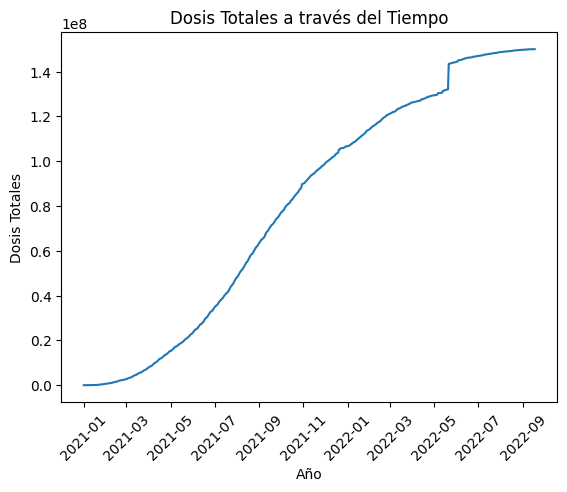

In [20]:
# Crear el gráfico de línea
sns.lineplot(x="date", y="cumulative_vaccine_doses_administered", data=df_PI_filtrado_por_fecha, ci=None)

# Añadir título y etiquetas de los ejes
plt.title("Dosis Totales a través del Tiempo")  # Título del gráfico
plt.xlabel("Año")  # Etiqueta del eje x
plt.ylabel("Dosis Totales")  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show()

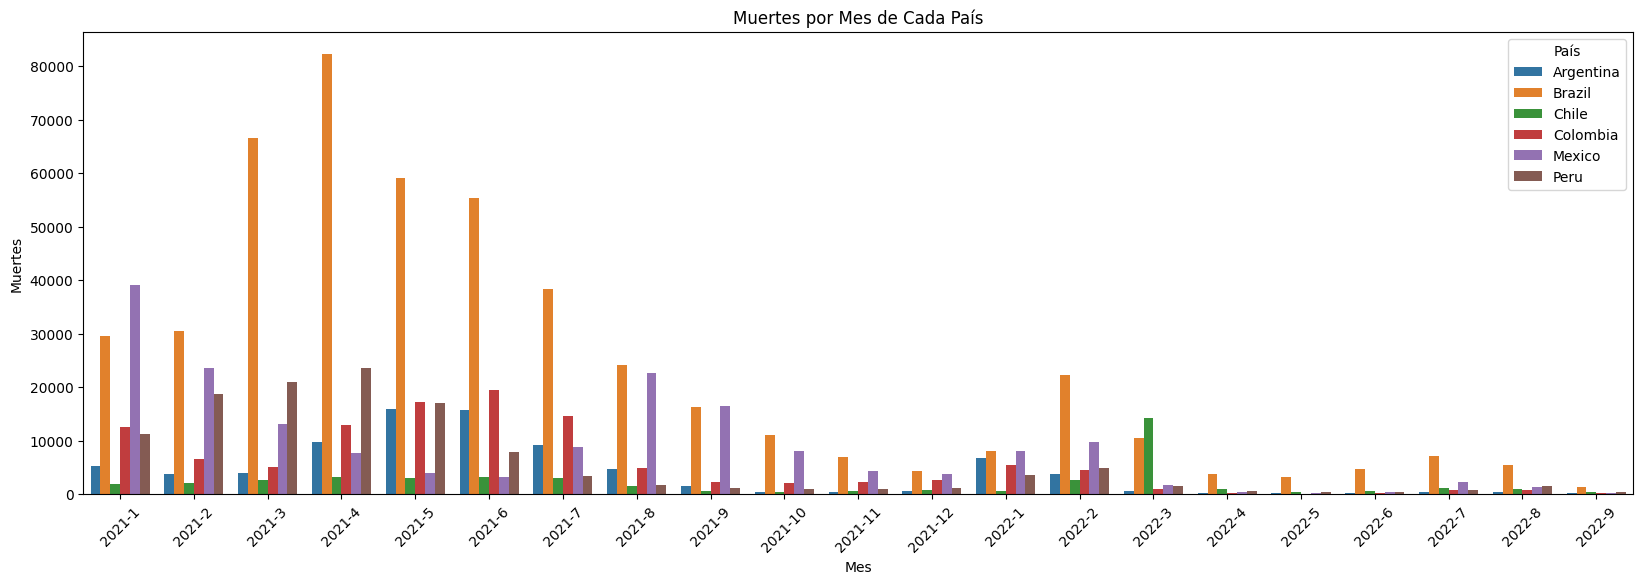

In [21]:
# Calcular el número total de muertes por mes para cada país
df_PI_filtrado_por_fecha['month'] = df_PI_filtrado_por_fecha.index.month  # Extraer el mes de la fecha
df_PI_filtrado_por_fecha['year'] = df_PI_filtrado_por_fecha.index.year  # Extraer el año de la fecha
country_deaths = df_PI_filtrado_por_fecha.groupby(['country_name', 'year', 'month'])['new_deceased'].sum().reset_index()

# Crear una columna que combine año y mes para ordenar adecuadamente
country_deaths['month_year'] = country_deaths['year'].astype(str) + '-' + country_deaths['month'].astype(str)

# Ordenar los datos por año y mes
country_deaths = country_deaths.sort_values(['year', 'month'])

# Crear el gráfico de barras agrupadas por país y mes
plt.figure(figsize=(20, 6))  # Tamaño de la figura
sns.barplot(x="month_year", y="new_deceased", hue="country_name", data=country_deaths)  # Crear el gráfico de barras
plt.xlabel('Mes')  # Etiqueta del eje x
plt.ylabel('Muertes')  # Etiqueta del eje y
plt.title('Muertes por Mes de Cada País')  # Título del gráfico
plt.legend(title='País')  # Añadir leyenda con título de país
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show()

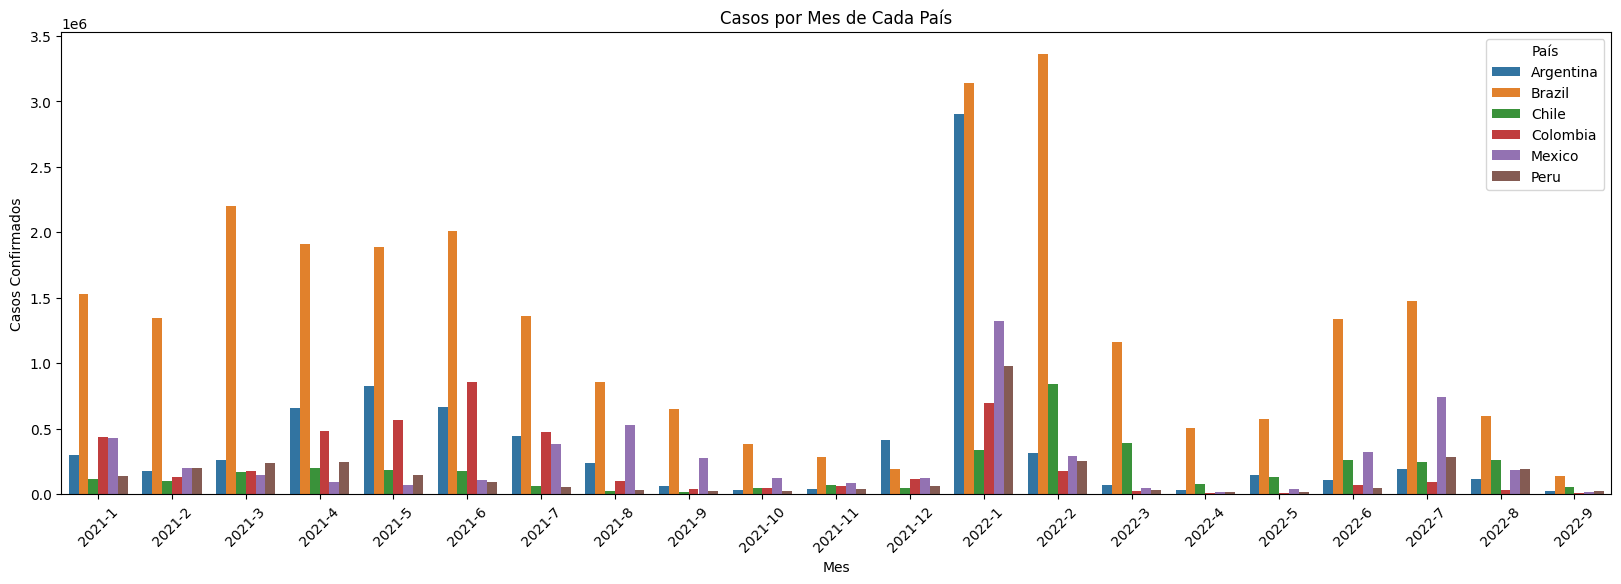

In [22]:
# Calcular el número total de casos confirmados por mes para cada país
df_PI_filtrado_por_fecha['month'] = df_PI_filtrado_por_fecha.index.month  # Extraer el mes de la fecha
df_PI_filtrado_por_fecha['year'] = df_PI_filtrado_por_fecha.index.year  # Extraer el año de la fecha
country_deaths = df_PI_filtrado_por_fecha.groupby(['country_name', 'year', 'month'])['new_confirmed'].sum().reset_index()

# Crear una columna que combine año y mes para ordenar adecuadamente
country_deaths['month_year'] = country_deaths['year'].astype(str) + '-' + country_deaths['month'].astype(str)

# Ordenar los datos por año y mes
country_deaths = country_deaths.sort_values(['year', 'month'])

# Crear el gráfico de barras agrupadas por país y mes
plt.figure(figsize=(20, 6))  # Tamaño de la figura
sns.barplot(x="month_year", y="new_confirmed", hue="country_name", data=country_deaths)  # Crear el gráfico de barras
plt.xlabel('Mes')  # Etiqueta del eje x
plt.ylabel('Casos Confirmados')  # Etiqueta del eje y
plt.title('Casos por Mes de Cada País')  # Título del gráfico
plt.legend(title='País')  # Añadir leyenda con título de país
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show() 

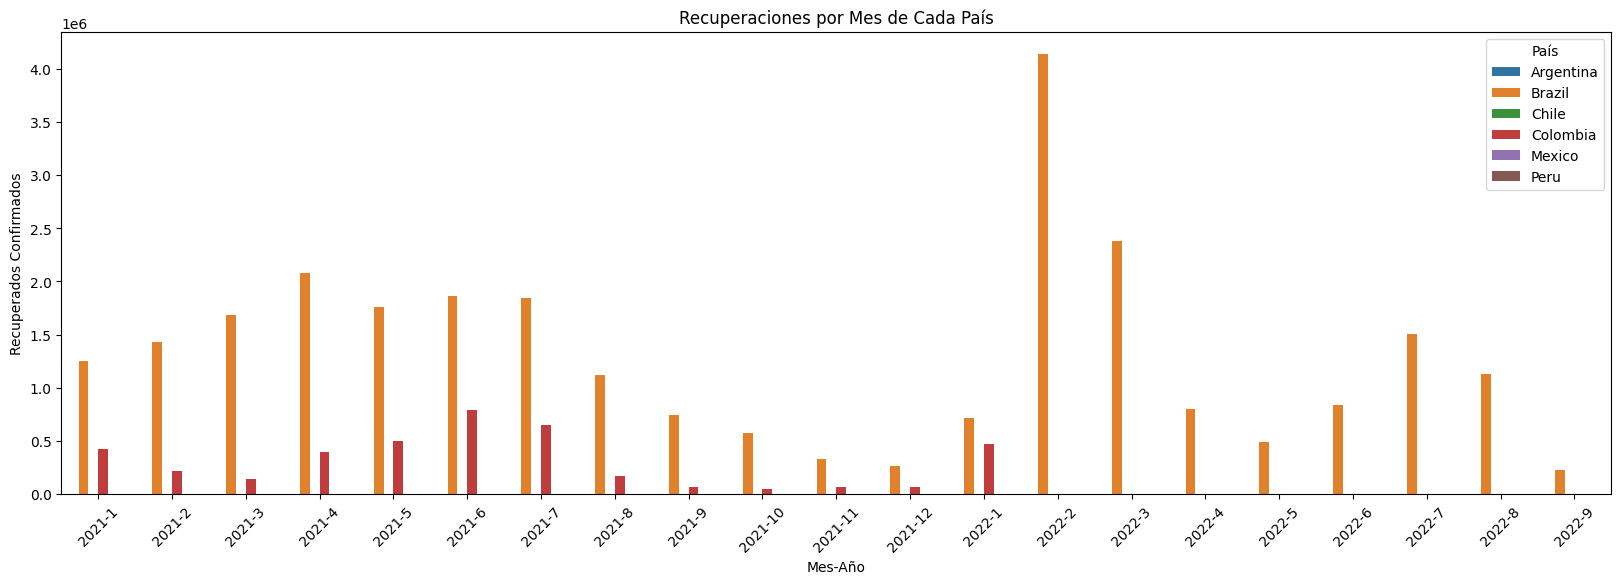

In [23]:
# Agrupar los datos por país, año y mes, y calcular la suma de recuperaciones confirmadas
df_PI_filtrado_por_fecha['month'] = df_PI_filtrado_por_fecha.index.month  # Extraer el mes de la fecha
df_PI_filtrado_por_fecha['year'] = df_PI_filtrado_por_fecha.index.year  # Extraer el año de la fecha
country_recoveries = df_PI_filtrado_por_fecha.groupby(['country_name', 'year', 'month'])['new_recovered'].sum().reset_index()

# Crear una columna que combine año y mes para ordenar adecuadamente
country_recoveries['month_year'] = country_recoveries['year'].astype(str) + '-' + country_recoveries['month'].astype(str)

# Ordenar los datos por año y mes
country_recoveries = country_recoveries.sort_values(['year', 'month'])

# Crear el gráfico de barras agrupadas por país y mes
plt.figure(figsize=(20, 6))  # Tamaño de la figura
sns.barplot(x="month_year", y="new_recovered", hue="country_name", data=country_recoveries)  # Crear el gráfico de barras
plt.xlabel('Mes-Año')  # Etiqueta del eje x
plt.ylabel('Recuperados Confirmados')  # Etiqueta del eje y
plt.title('Recuperaciones por Mes de Cada País')  # Título del gráfico
plt.legend(title='País')  # Añadir leyenda con título de país
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show()

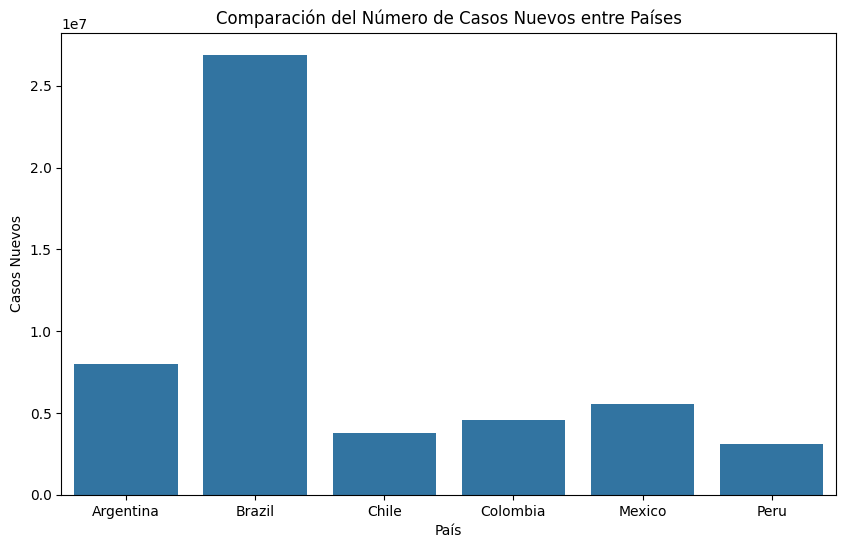

In [24]:
# Agrupar los datos por país y calcular la suma de casos nuevos
country_cases = df_PI_filtrado_por_fecha.groupby('country_name')['new_confirmed'].sum().reset_index()

# Crear un gráfico de barras para comparar el número de casos nuevos entre países
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.barplot(x="country_name", y="new_confirmed", data=country_cases)  # Crear el gráfico de barras
plt.xlabel('País')  # Etiqueta del eje x
plt.ylabel('Casos Nuevos')  # Etiqueta del eje y
plt.title('Comparación del Número de Casos Nuevos entre Países')  # Título del gráfico
plt.show()  # Mostrar el gráfico

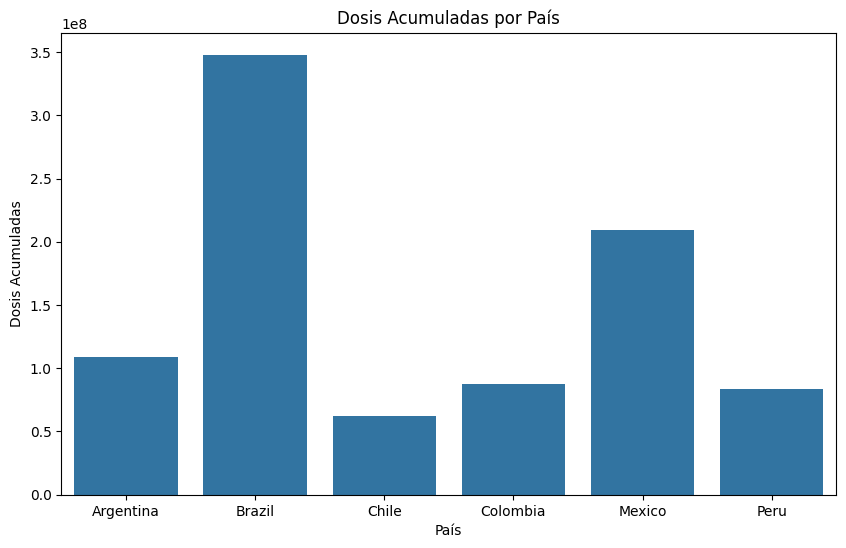

In [25]:
# Calcular las dosis acumuladas por país
country_doses = df_PI_filtrado_por_fecha.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index()

# Crear un gráfico de barras para visualizar las dosis acumuladas por país
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.barplot(x="country_name", y="cumulative_vaccine_doses_administered", data=country_doses)  # Crear el gráfico de barras
plt.xlabel('País')  # Etiqueta del eje x
plt.ylabel('Dosis Acumuladas')  # Etiqueta del eje y
plt.title('Dosis Acumuladas por País')  # Título del gráfico
plt.show()  # Mostrar el gráfico

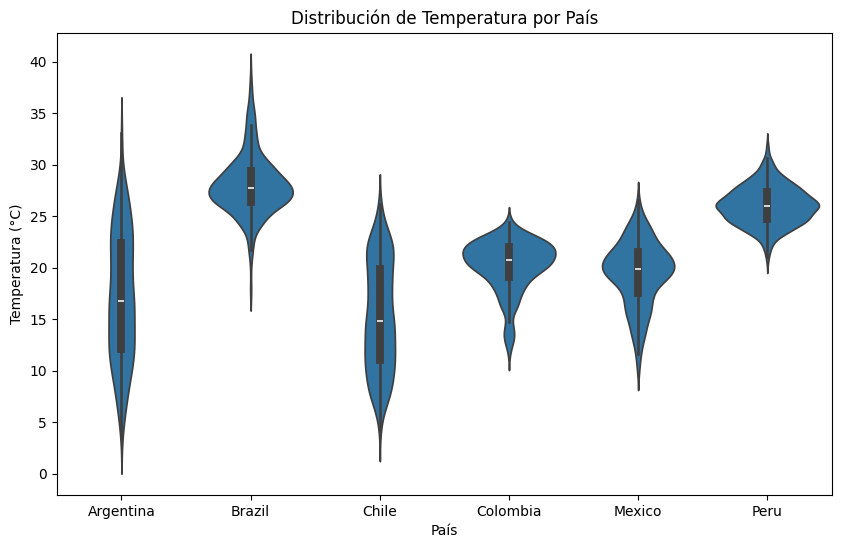

In [26]:
# Crear un gráfico de violín para visualizar la distribución de temperatura por país
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.violinplot(x='country_name', y='average_temperature_celsius', data=df_PI_filtrado_por_fecha)  # Crear el gráfico de violín
plt.xlabel('País')  # Etiqueta del eje x
plt.ylabel('Temperatura (°C)')  # Etiqueta del eje y
plt.title('Distribución de Temperatura por País')  # Título del gráfico
plt.show()  # Mostrar el gráfico

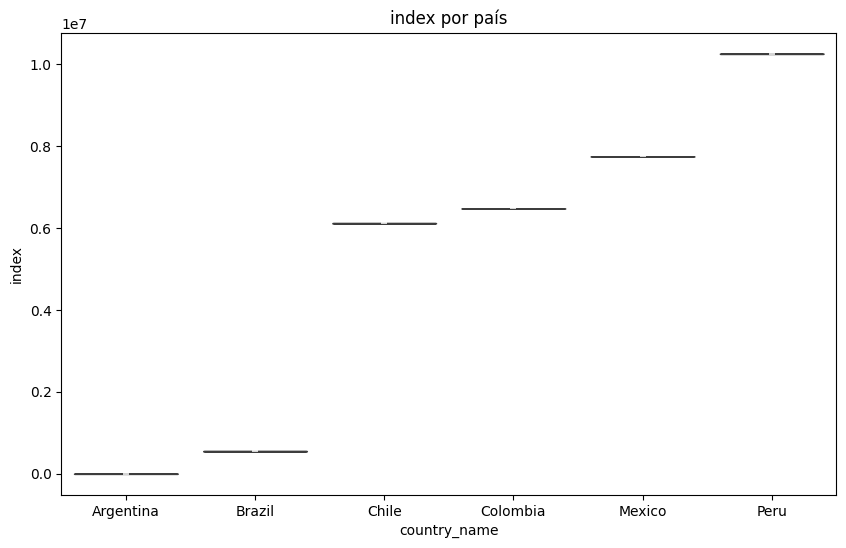

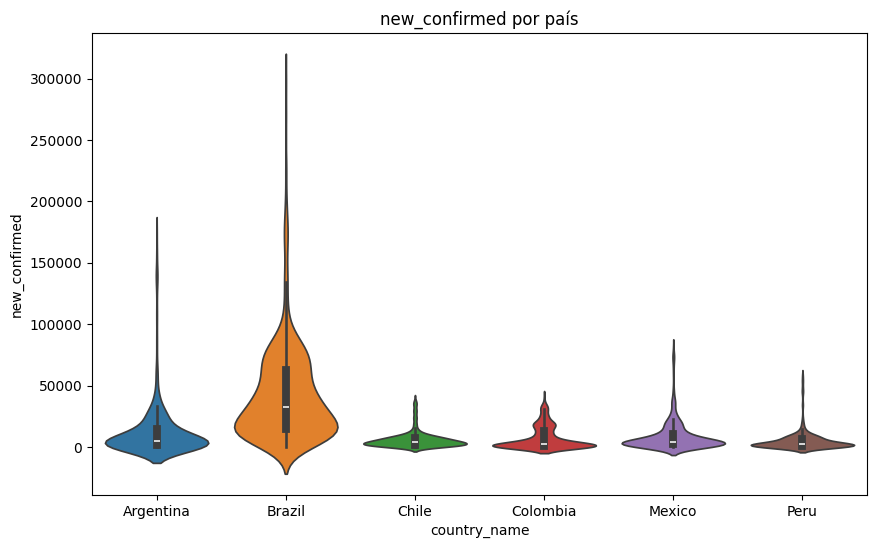

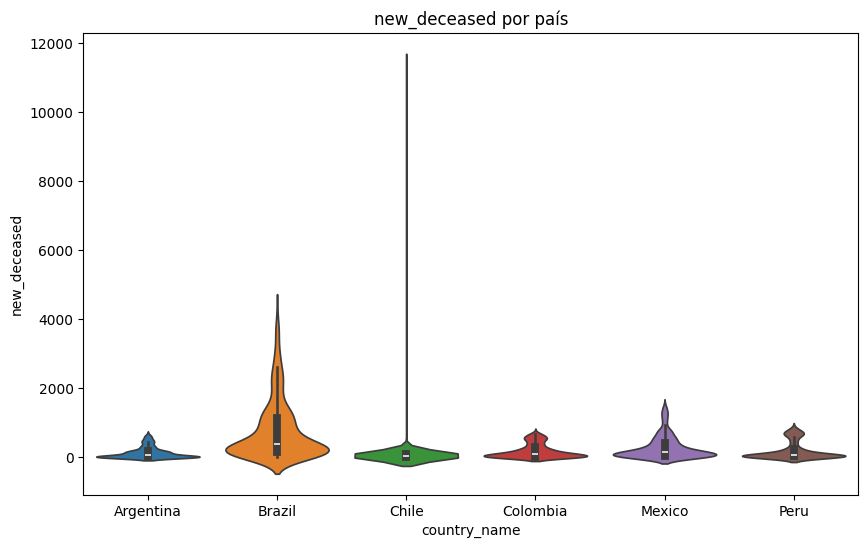

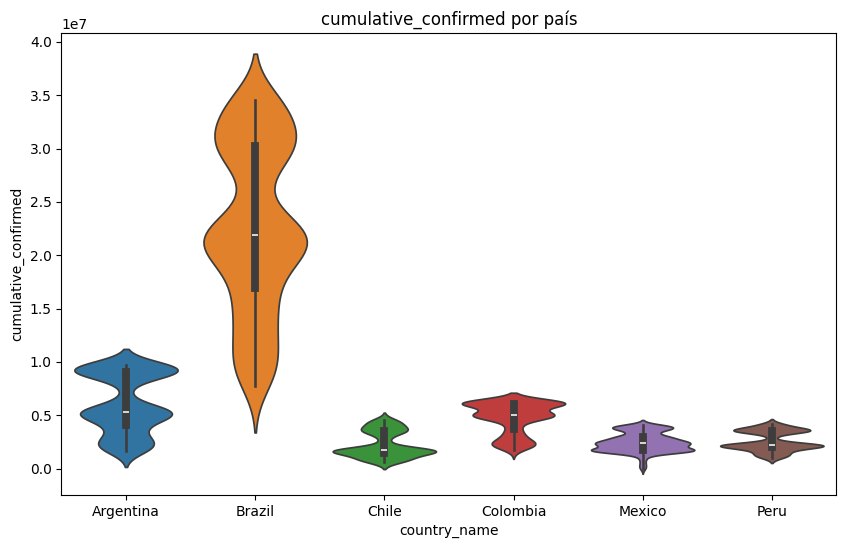

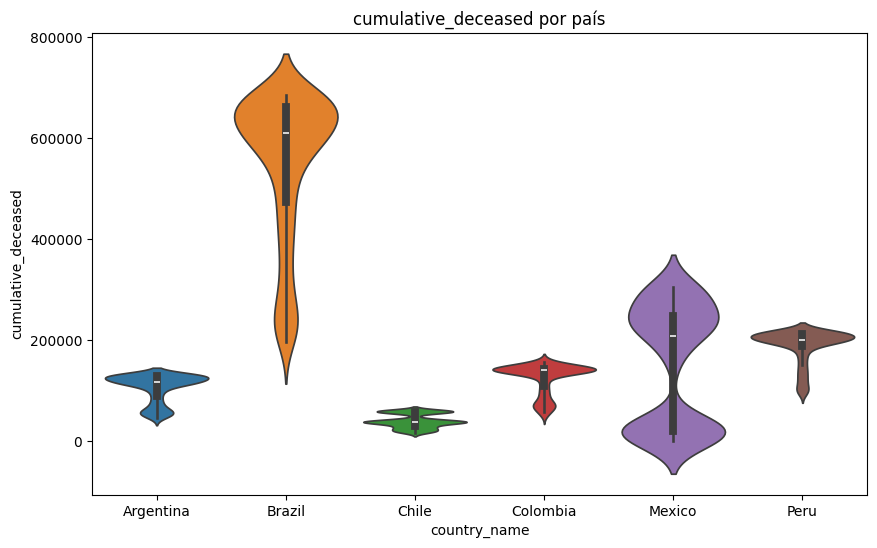

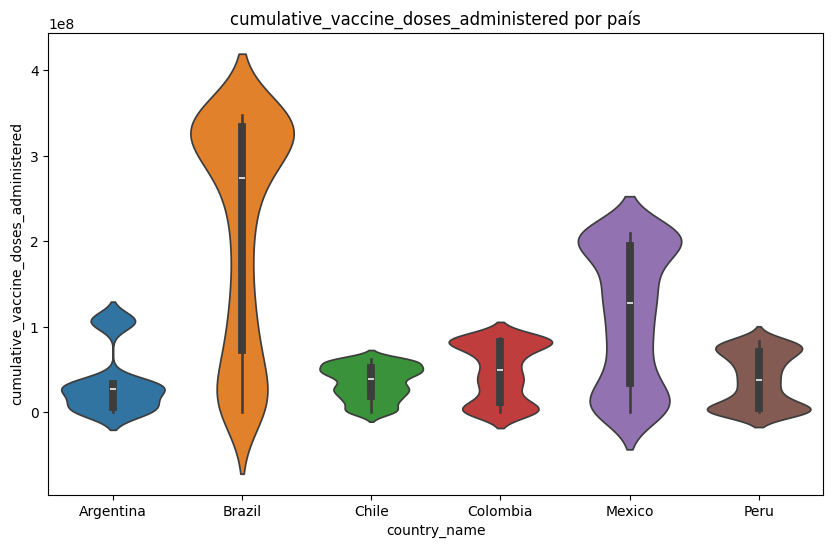

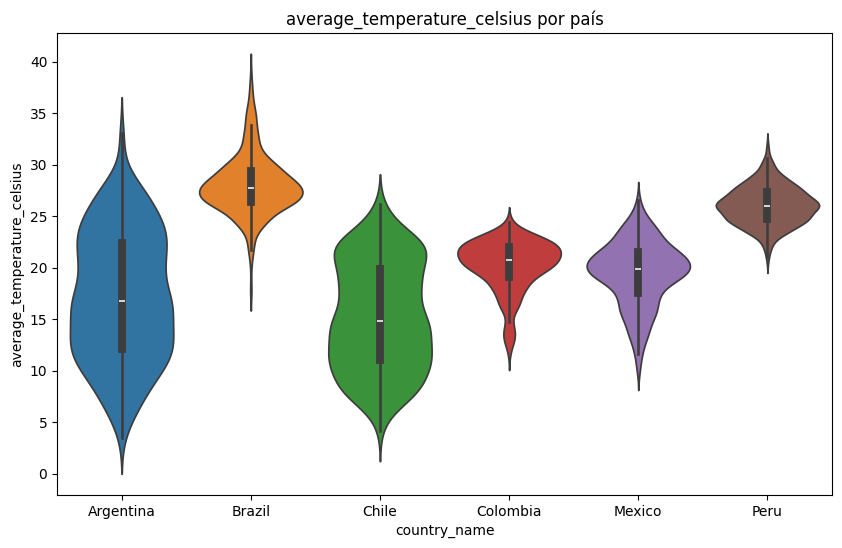

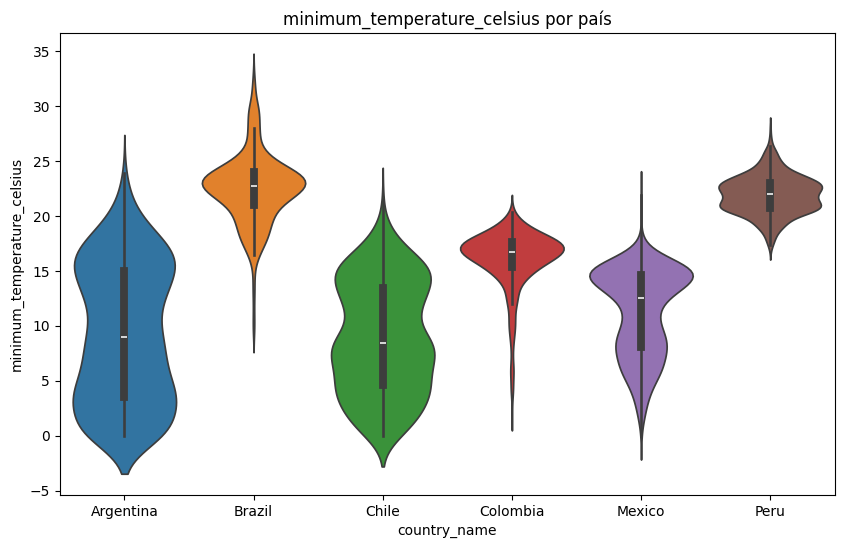

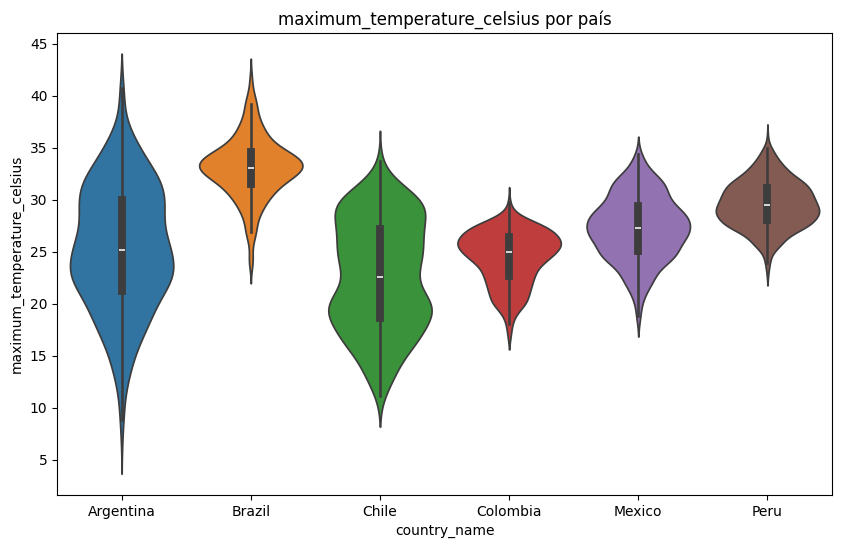

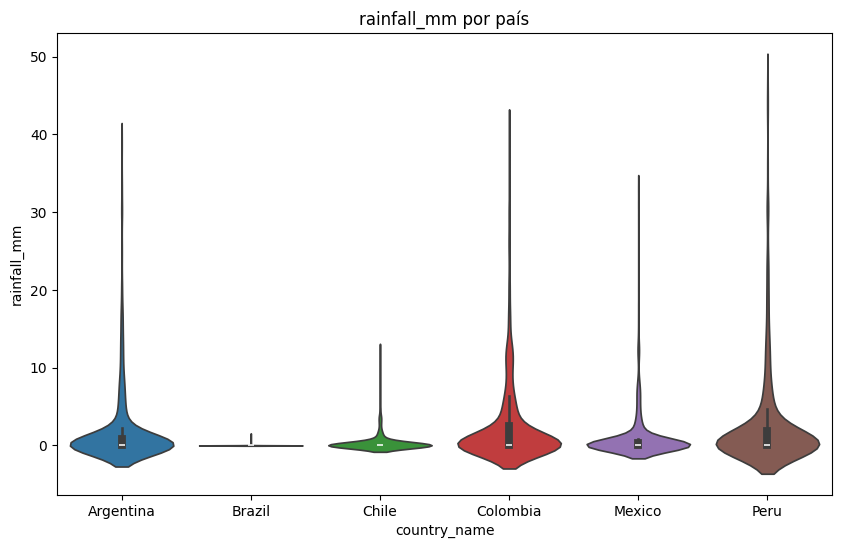

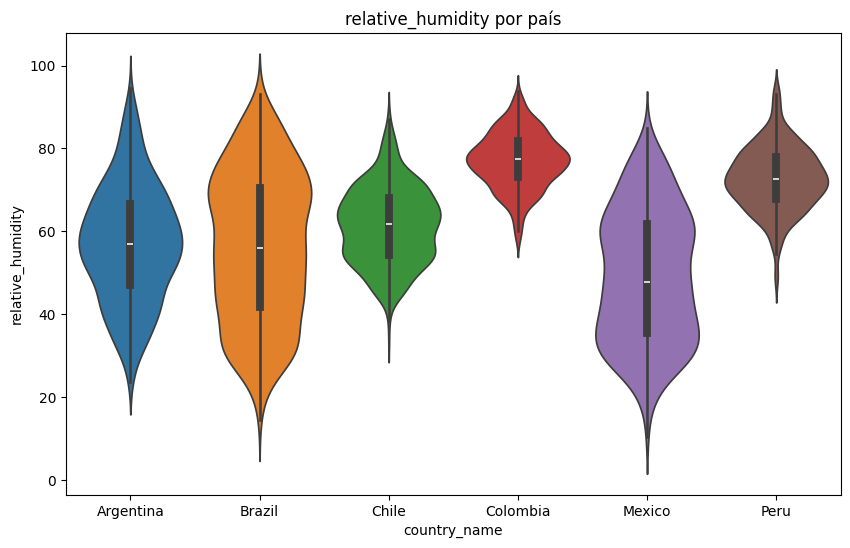

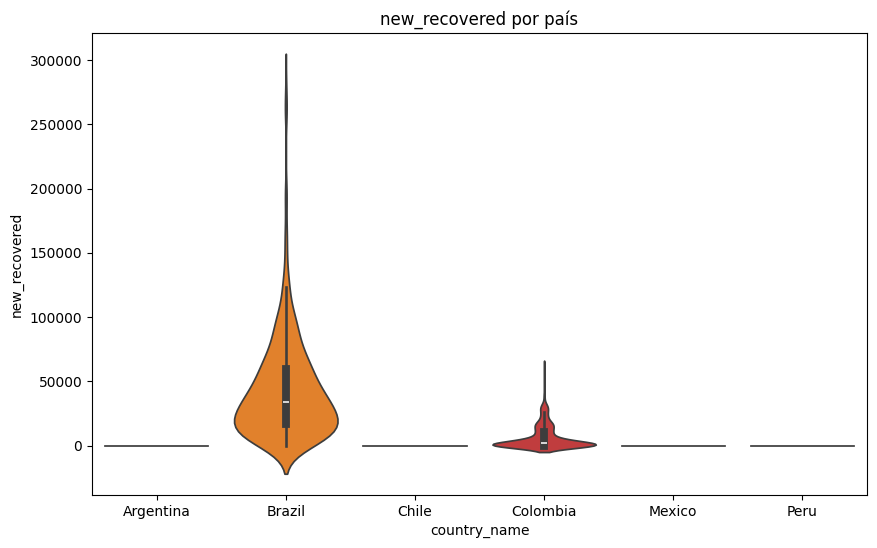

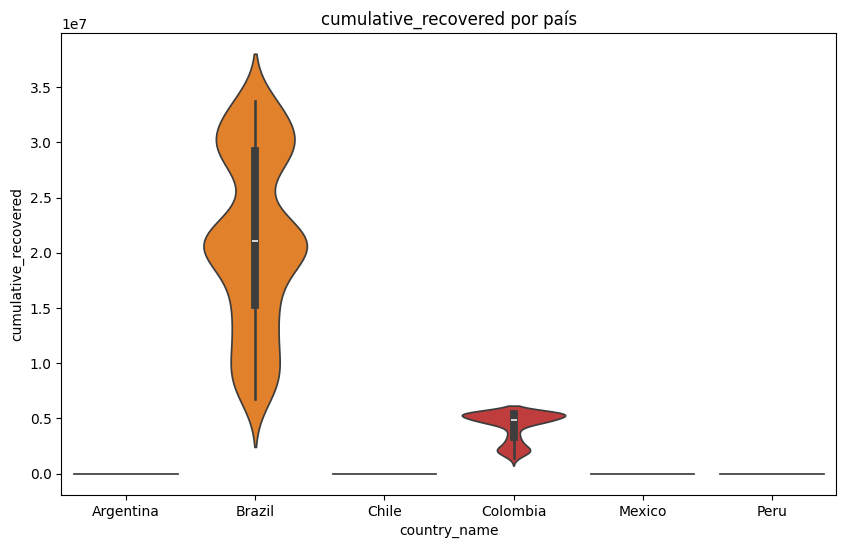

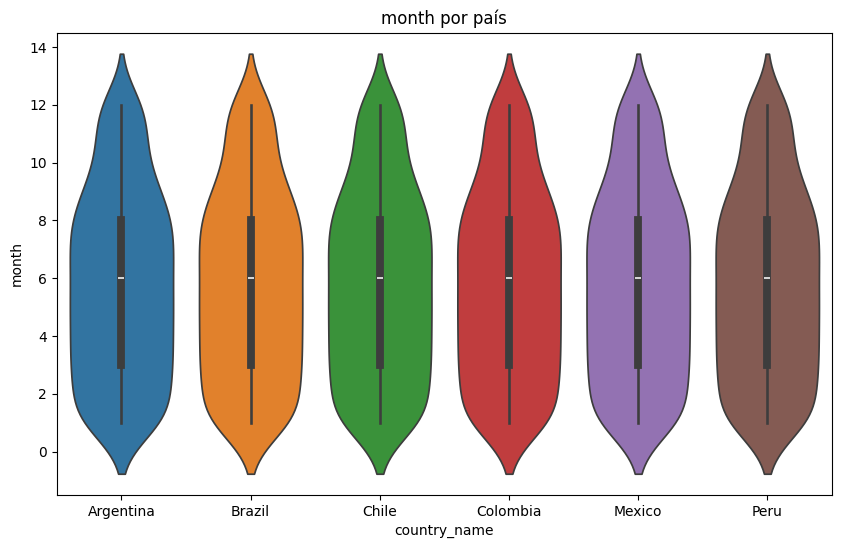

In [27]:
# Inicializar una lista vacía para almacenar los nombres de las columnas con más de 6 valores únicos
columnas_mayores_6 = []

# Iterar a través de las columnas del dataframe filtrado
for i in df_PI_filtrado_por_fecha.columns:
    # Verificar si la columna no está en la lista de exclusión y tiene más de 6 valores únicos
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude'] and df_PI_filtrado_por_fecha[i].nunique() > 6:
        columnas_mayores_6.append(i)

# Agregar 'country_name' a la lista de columnas
columnas_mayores_6.append('country_name')

# Crear un nuevo dataframe con las columnas seleccionadas
df_PI_filtrado_por_fecha_mayores_6 = df_PI_filtrado_por_fecha[columnas_mayores_6]

# Iterar a través de las columnas del nuevo dataframe
for i in df_PI_filtrado_por_fecha_mayores_6.columns:
    # Verificar si la columna no está en la lista de exclusión
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        # Crear un gráfico de violín para cada columna
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=df_PI_filtrado_por_fecha_mayores_6, hue='country_name')
        plt.title(f'{i} por país')  # Usar f-strings para dar formato al título
        plt.show()  # Mostrar el gráfico


C:\Users\Rembert\AppData\Local\Temp\ipykernel_9572\1322059433.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(column_names)), y=data, palette="viridis")


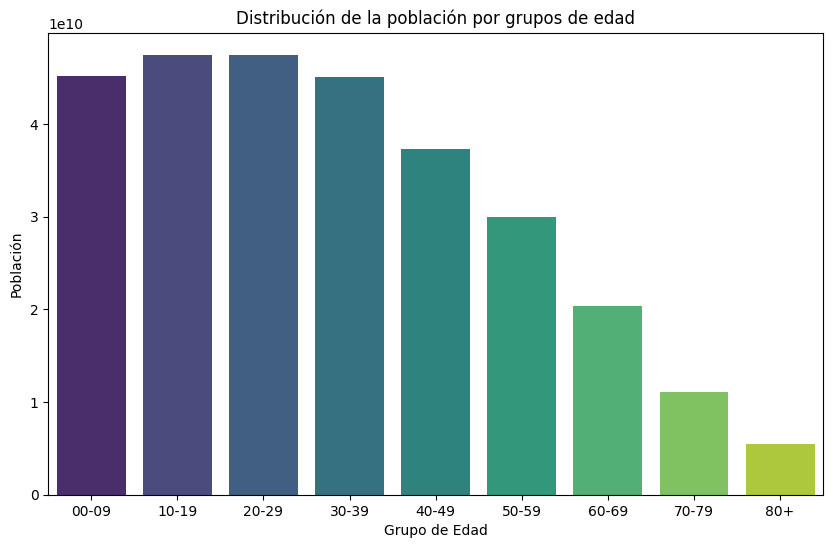

In [28]:
# Nombres de las columnas de grupos de edad
column_names = [
    'population_age_00_09',
    'population_age_10_19',
    'population_age_20_29',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_and_older'
]

# Obtener los datos de población total por grupo de edad
data = [df_PI_filtrado_por_fecha[col_name].sum() for col_name in column_names]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=range(len(column_names)), y=data, palette="viridis")

# Etiquetas en el eje x
plt.xticks(range(len(column_names)), ['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

# Título y etiquetas de los ejes
plt.title('Distribución de la población por grupos de edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Población')

plt.show()  # Mostrar el gráfico


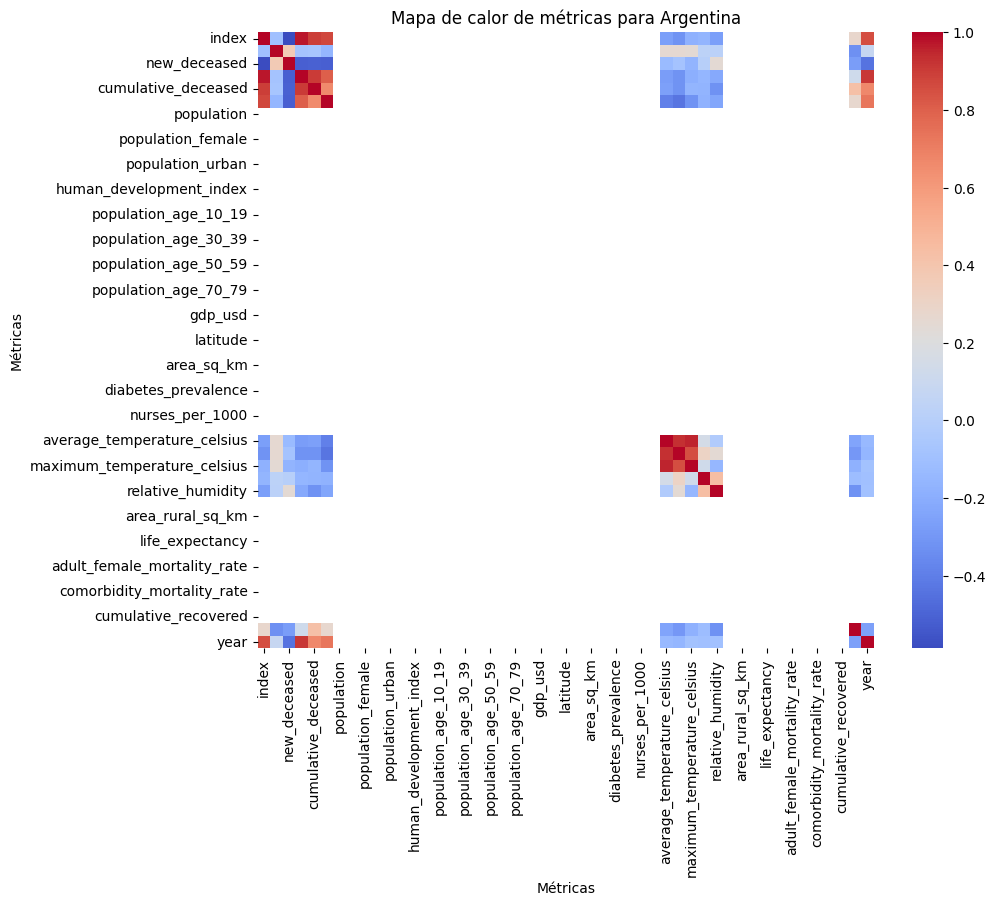

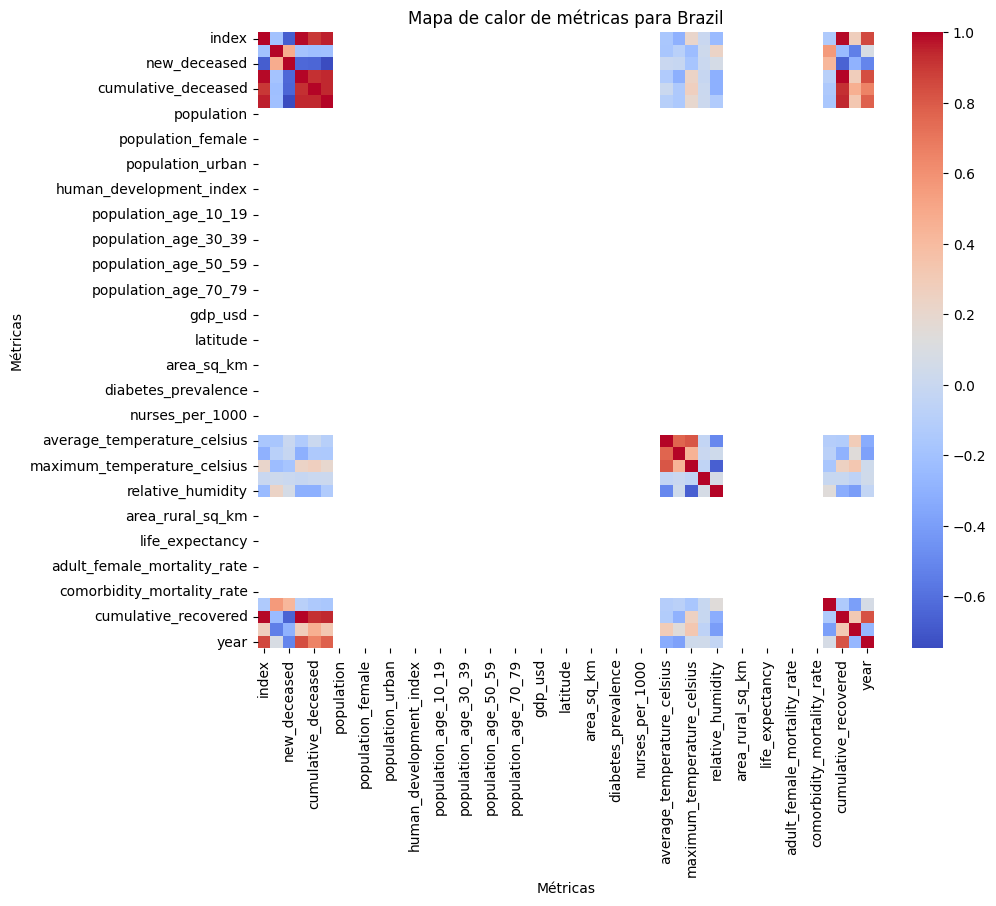

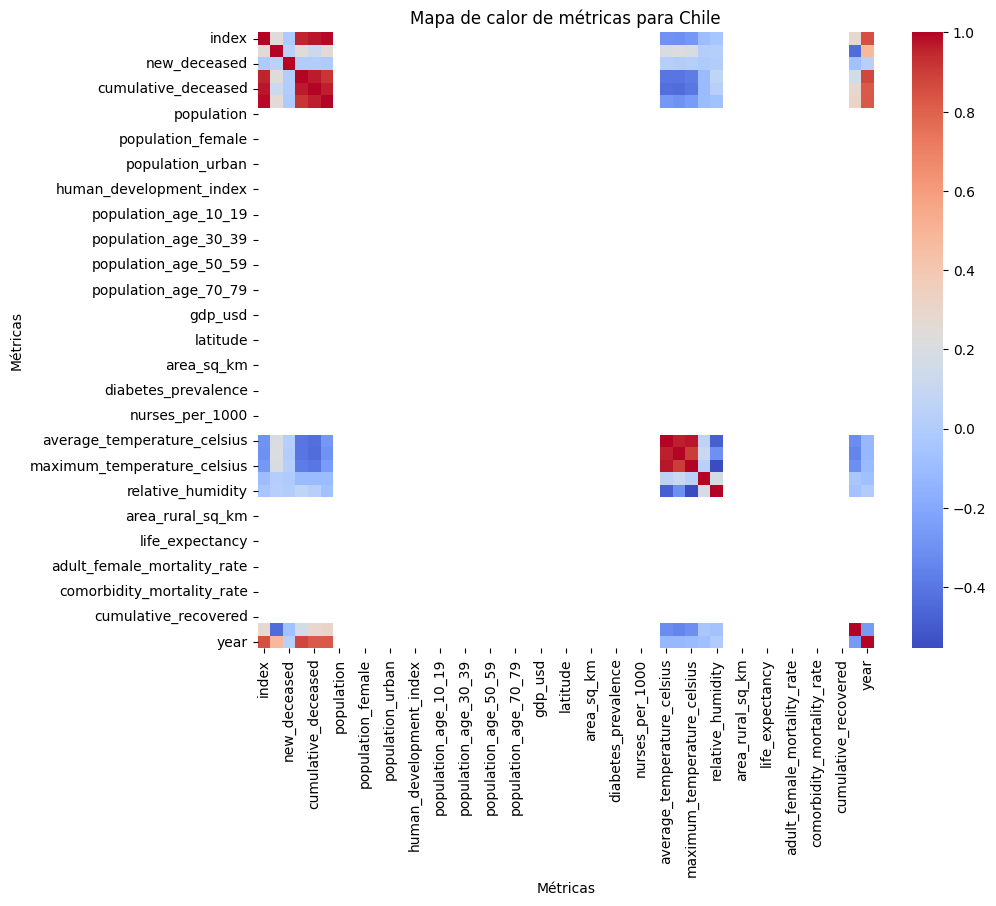

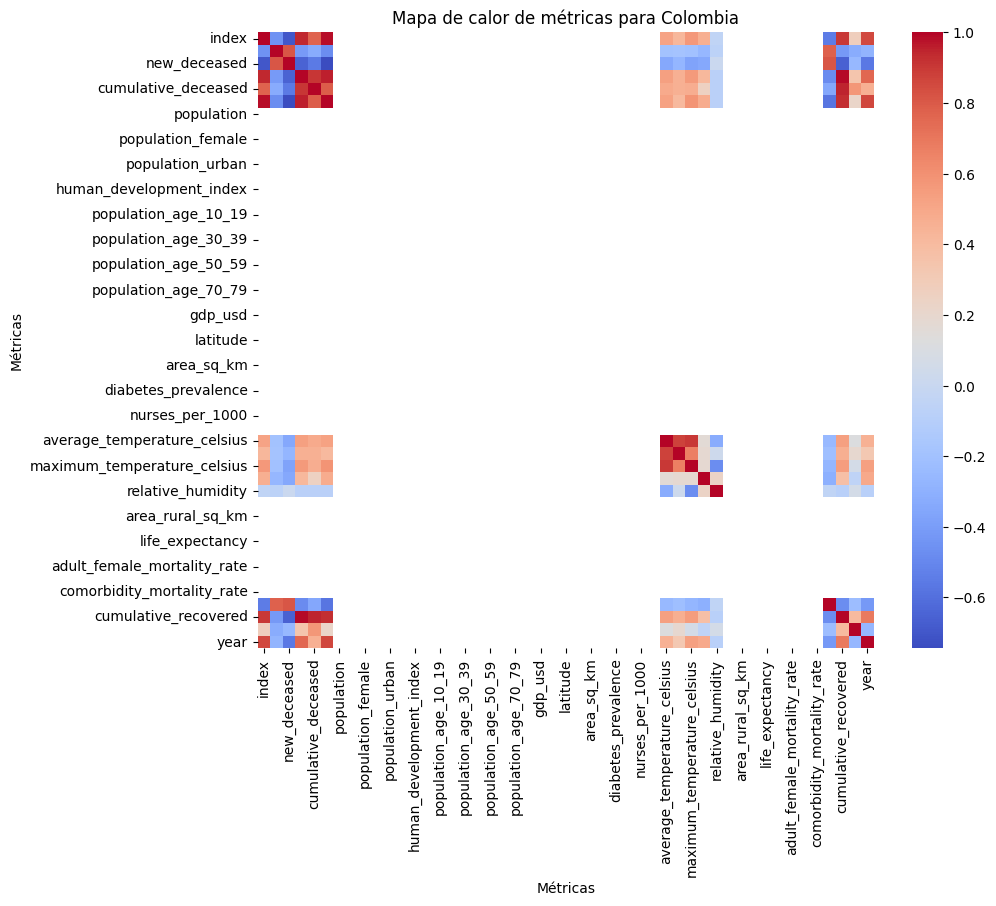

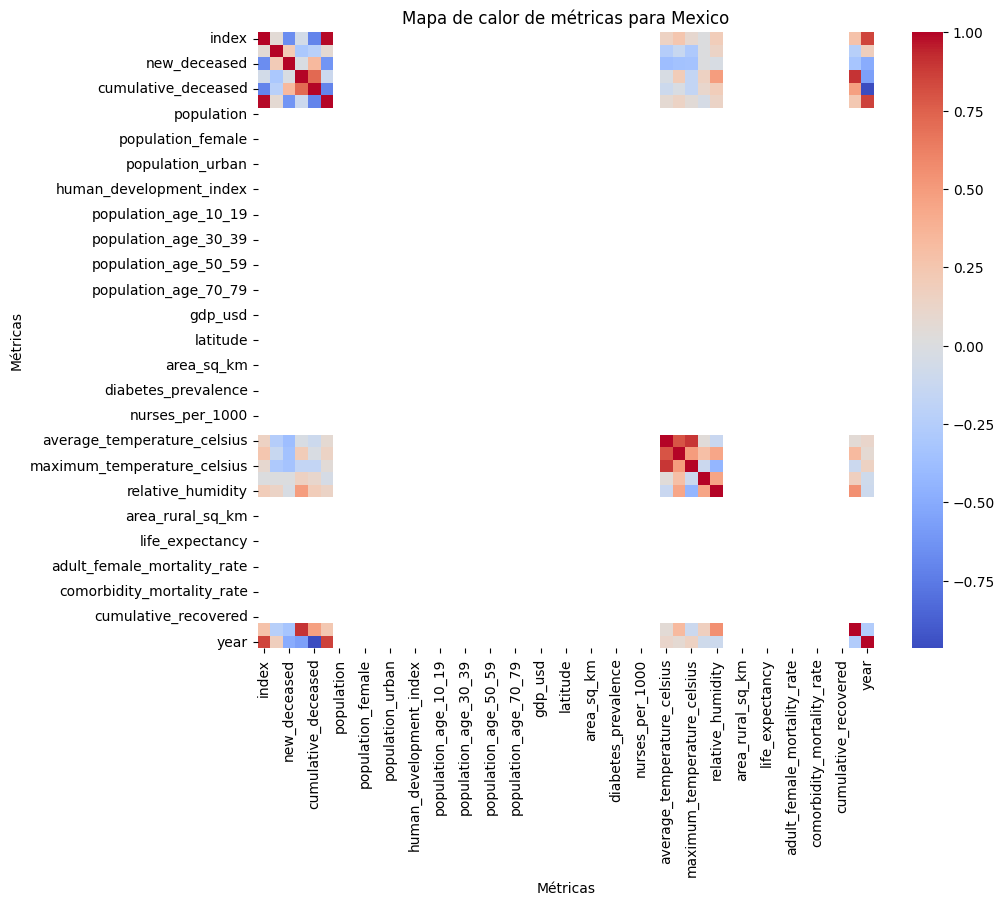

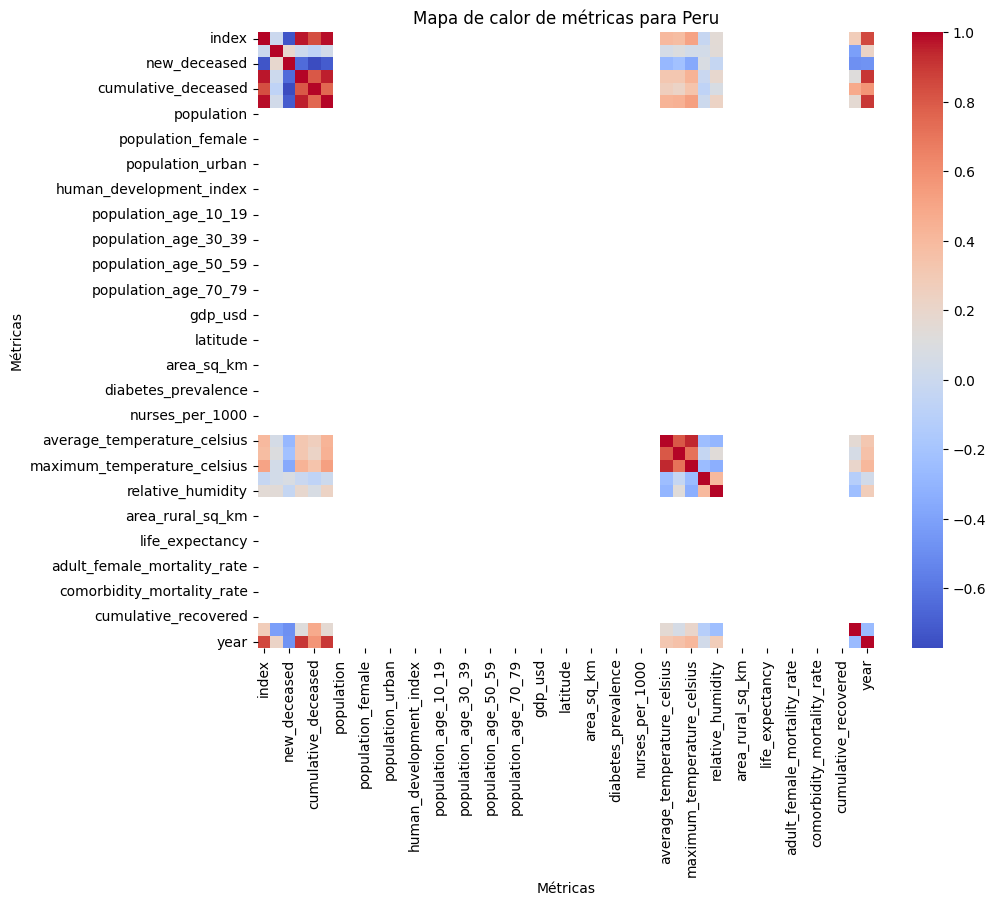

In [29]:
# Obtener la lista de países únicos en los datos filtrados
countries = df_PI_filtrado_por_fecha['country_name'].unique()

# Iterar sobre cada país para crear un mapa de calor de correlación
for country in countries:
    # Filtrar los datos para el país actual
    country_data = df_PI_filtrado_por_fecha[df_PI_filtrado_por_fecha['country_name'] == country]
    
    # Seleccionar las columnas numéricas para el país actual
    numeric_cols = country_data.select_dtypes(include=[int, float]).columns
    
    # Crear el mapa de calor para el país actual
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        country_data[numeric_cols].corr(),
        cmap="coolwarm",  # Elección del esquema de color
        square=True  # Para hacer que los cuadrados de la trama sean cuadrados
    )
    
    # Agregar título y etiquetas
    plt.title(f"Mapa de calor de métricas para {country}")
    plt.xlabel("Métricas")
    plt.ylabel("Métricas")
    
    # Mostrar el gráfico
    plt.show()


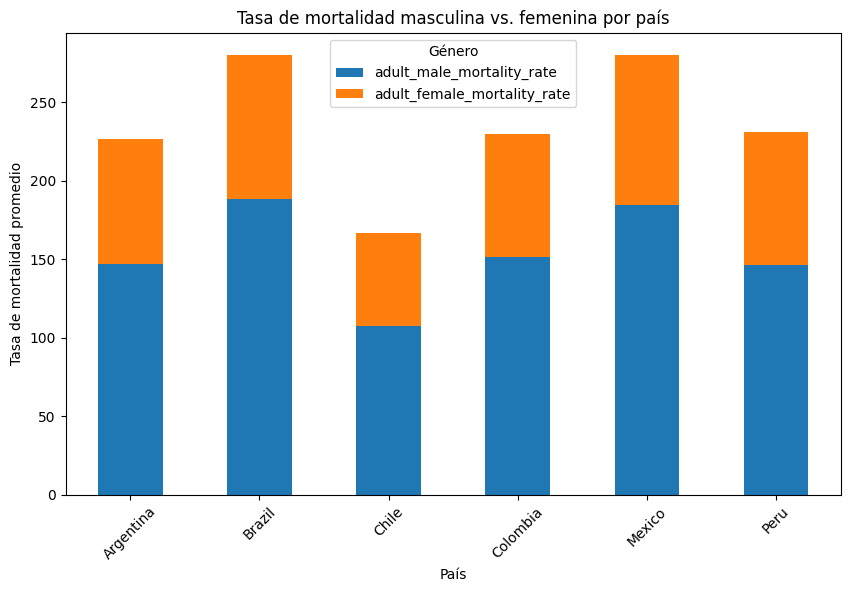

In [30]:
# Agrupar los datos por país y calcular la media de las tasas de mortalidad masculina y femenina
grouped_data = df_PI_filtrado_por_fecha.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean()

# Crear un diagrama de barras apilado
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Etiquetas y título del gráfico
plt.xlabel('País')
plt.ylabel('Tasa de mortalidad promedio')
plt.title('Tasa de mortalidad masculina vs. femenina por país')

# Agregar leyenda y personalizar el título de la leyenda
plt.legend(title='Género')

# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


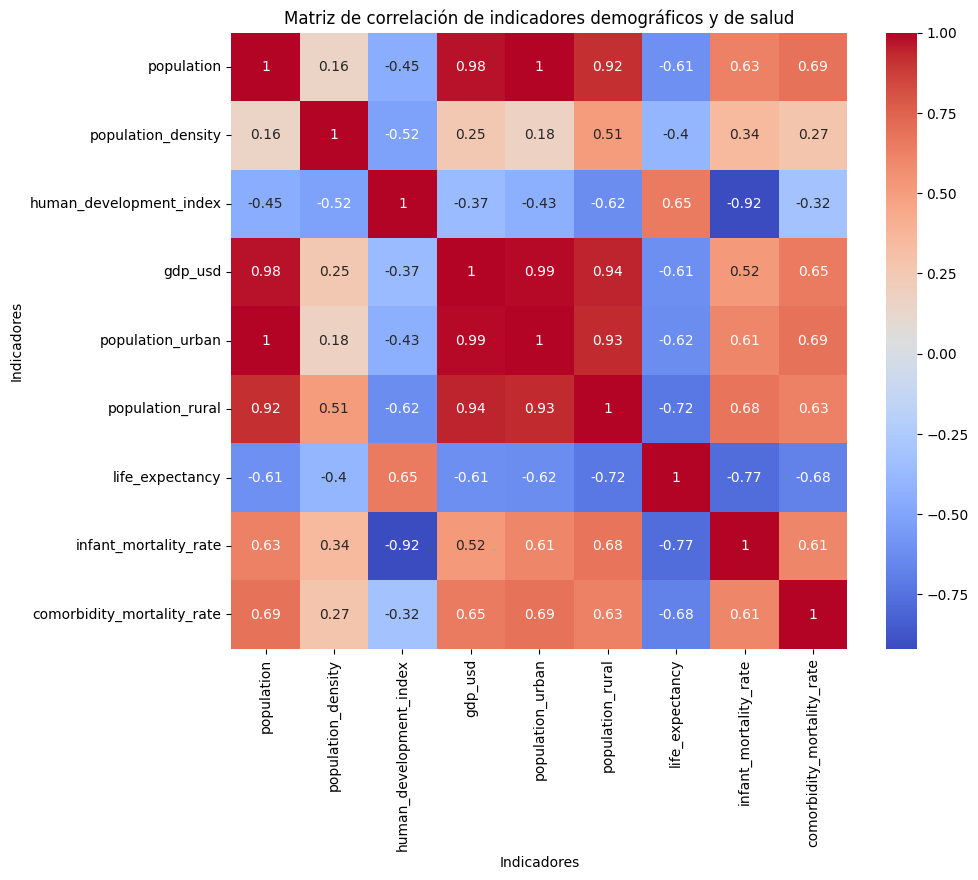

In [31]:
# Definir indicadores demográficos y de salud
indicadores_demograficos = ['population', 'population_density', 'human_development_index', 'gdp_usd', 'population_urban', 'population_rural']
indicadores_salud = ['life_expectancy', 'infant_mortality_rate', 'comorbidity_mortality_rate']

# Seleccionar los indicadores demográficos y de salud del DataFrame
indicators = df_PI_filtrado_por_fecha[indicadores_demograficos + indicadores_salud]

# Calcular la matriz de correlación
corr_matrix = indicators.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,  # Mostrar los valores de correlación en el mapa de calor
    cmap="coolwarm",  # Esquema de color para el mapa de calor
    square=True  # Hacer que los cuadrados del mapa de calor sean cuadrados
)

# Agregar título y etiquetas
plt.title("Matriz de correlación de indicadores demográficos y de salud")
plt.xlabel("Indicadores")
plt.ylabel("Indicadores")

# Mostrar el gráfico
plt.show()


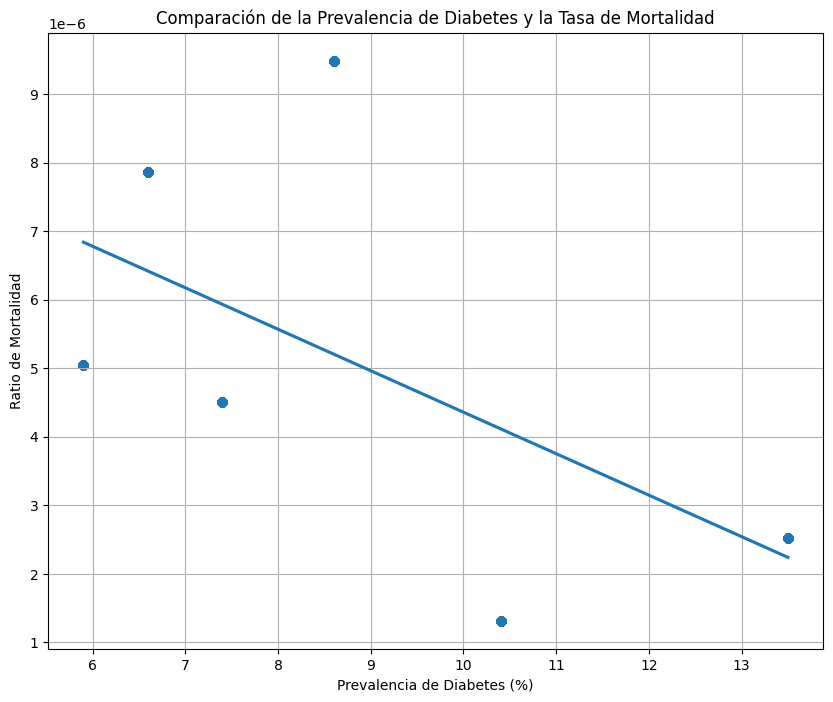

In [32]:
# Calcular el ratio de mortalidad como la suma de las tasas de mortalidad dividido por la población
mortality_ratio = ((df_PI_filtrado_por_fecha['adult_female_mortality_rate'] + df_PI_filtrado_por_fecha['adult_male_mortality_rate']) / df_PI_filtrado_por_fecha['population'])

# Definir las variables a utilizar en el gráfico de dispersión
vars1 = ['diabetes_prevalence', 'mortality_ratio']

# Mapear los nombres de las variables para una mejor visualización
var_map = {'diabetes_prevalence': 'Prevalencia de Diabetes', 'mortality_ratio': 'Ratio de mortalidad'}

# Seleccionar columnas numéricas del DataFrame
numeric_cols = df_PI_filtrado_por_fecha.select_dtypes(include=[np.number])

# Asignar el ratio de mortalidad al DataFrame
df_PI_filtrado_por_fecha['mortality_ratio'] = mortality_ratio

# Crear un gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_PI_filtrado_por_fecha, x='diabetes_prevalence', y='mortality_ratio')
sns.regplot(data=df_PI_filtrado_por_fecha, x='diabetes_prevalence', y='mortality_ratio', ci=None)  # ci=None para quitar el intervalo de confianza

# Agregar título y etiquetas
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad')
plt.xlabel('Prevalencia de Diabetes (%)')
plt.ylabel('Ratio de Mortalidad')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Avance 3

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import geopandas as gpd
import os

In [34]:
# Leer el archivo CSV y cargar los datos en un DataFrame
df_PI_filtrado_por_fecha = pd.read_csv(r"C:\Users\Rembert\Desktop\Proyecto Integrador M4\DatosFinalesFiltrado.csv", sep=',')


In [35]:
# Convertir la columna 'date' a tipo datetime
df_PI_filtrado_por_fecha['date'] = pd.to_datetime(df_PI_filtrado_por_fecha['date'])

# Establecer 'date' como índice del DataFrame
df_PI_filtrado_por_fecha.set_index('date', inplace=True)


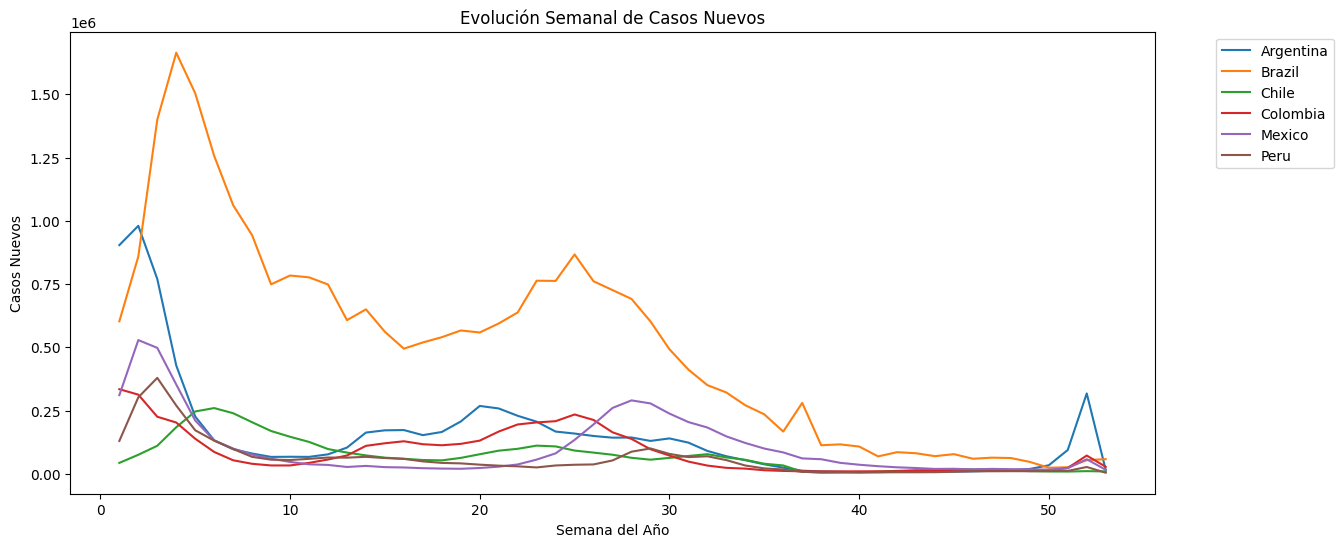

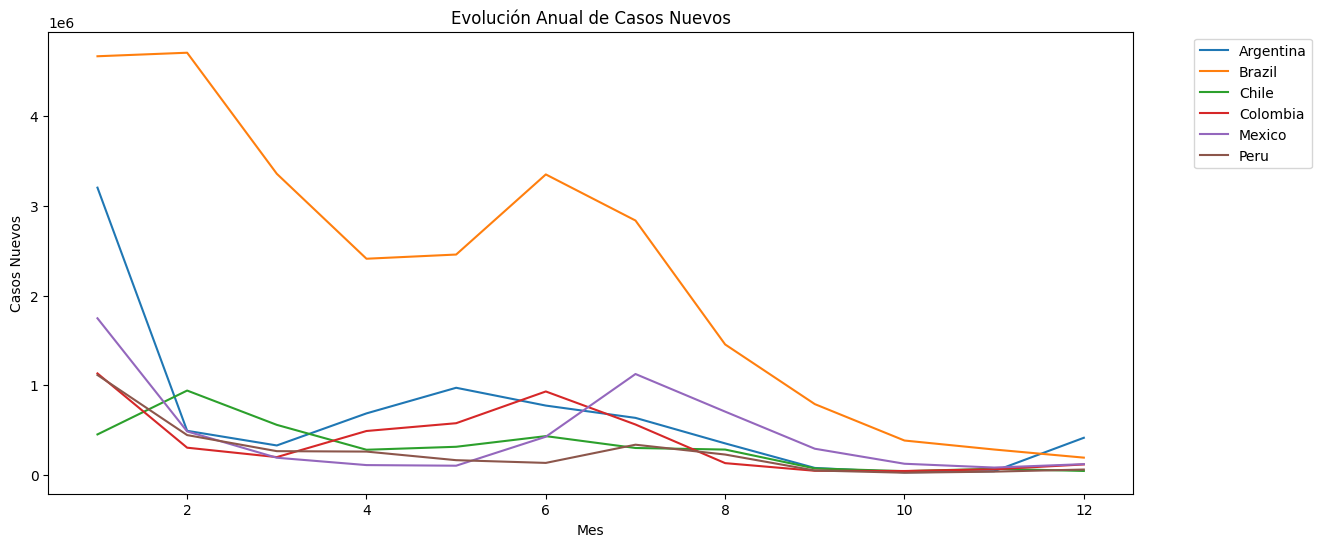

In [36]:
# Agregar columnas de semana y mes
df_PI_filtrado_por_fecha['week'] = df_PI_filtrado_por_fecha.index.isocalendar().week
df_PI_filtrado_por_fecha['month'] = df_PI_filtrado_por_fecha.index.month  # Usar month en lugar de isocalendar().month

# Gráfico de casos semanales
weekly_cases = df_PI_filtrado_por_fecha.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

plt.figure(figsize=(14, 6))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos')
plt.title('Evolución Semanal de Casos Nuevos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico de casos anuales
annual_cases = df_PI_filtrado_por_fecha.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

plt.figure(figsize=(14, 6))
for country in annual_cases['country_name'].unique():
    country_annual_cases = annual_cases[annual_cases['country_name'] == country]
    plt.plot(country_annual_cases['month'], country_annual_cases['new_confirmed'], label=country)

plt.xlabel('Mes')
plt.ylabel('Casos Nuevos')
plt.title('Evolución Anual de Casos Nuevos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Rembert\AppData\Local\Temp\ipykernel_9572\3350810276.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='País')


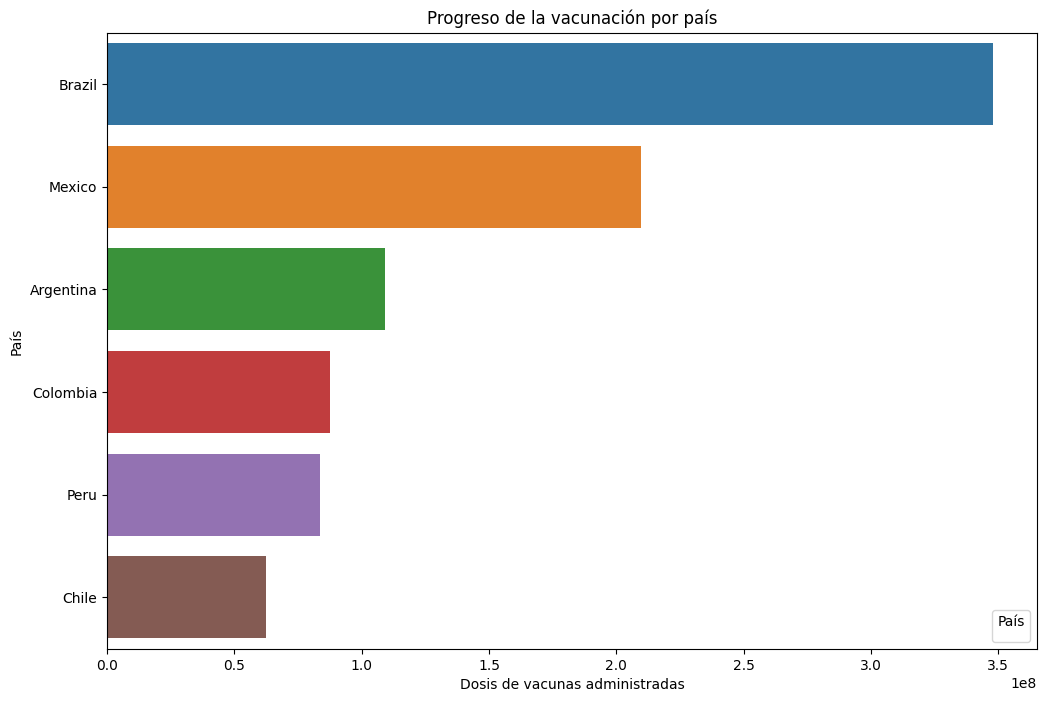

In [37]:
# Calcular el total de dosis de vacunas administradas por país y ordenar de mayor a menor
vacunacion = df_PI_filtrado_por_fecha.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
# Crear el gráfico de barras utilizando seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=vacunacion.values, y=vacunacion.index, hue=vacunacion.index)
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')
plt.legend(title='País')
plt.show()


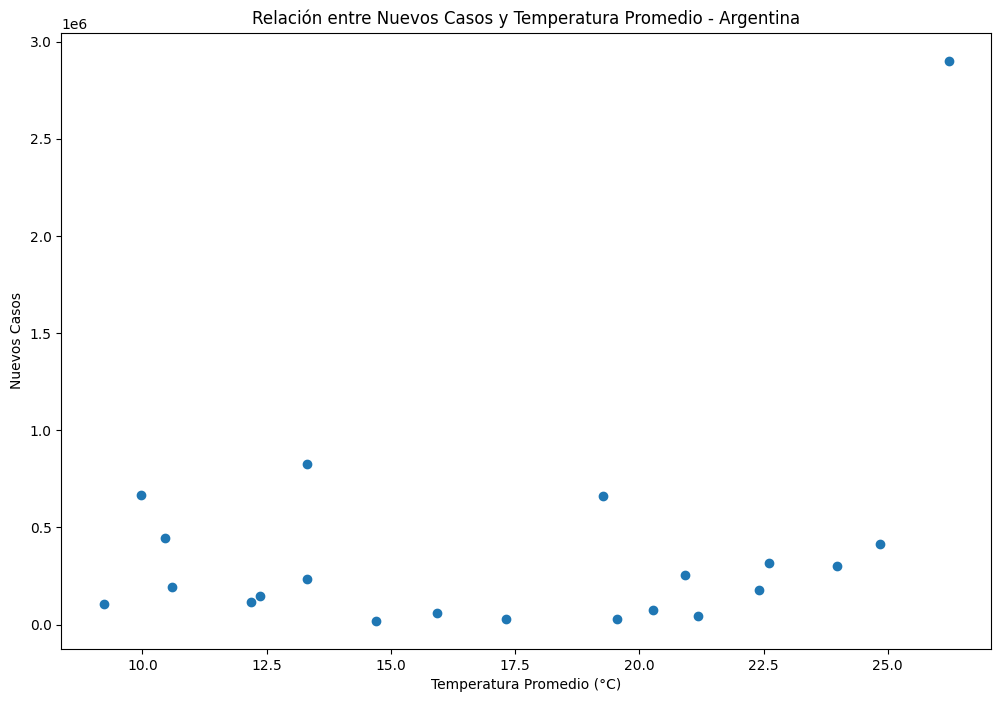

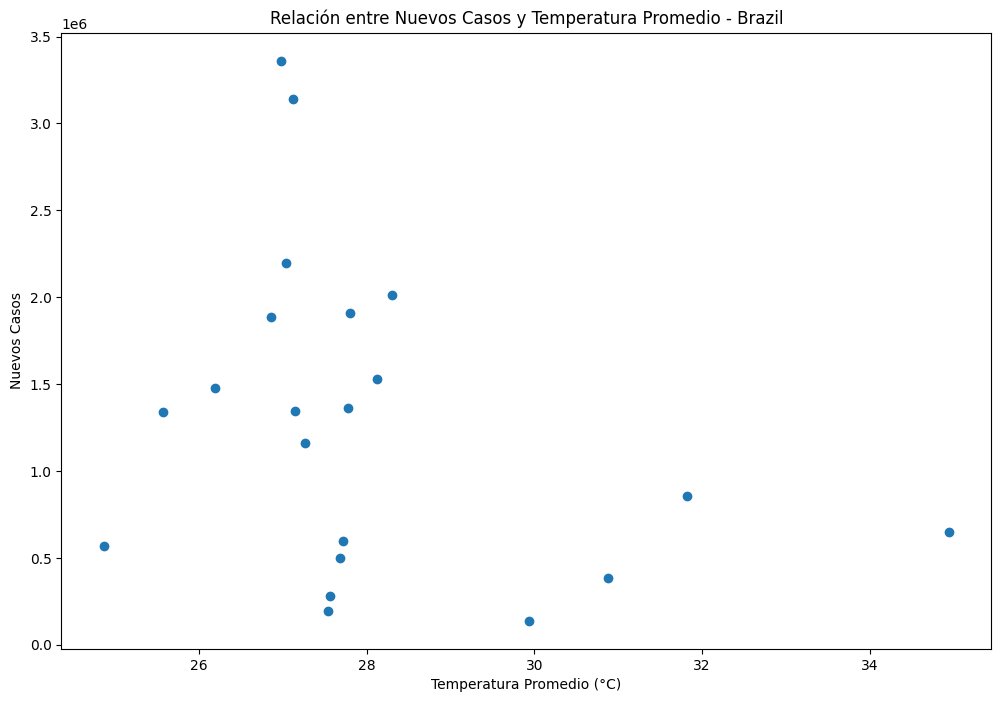

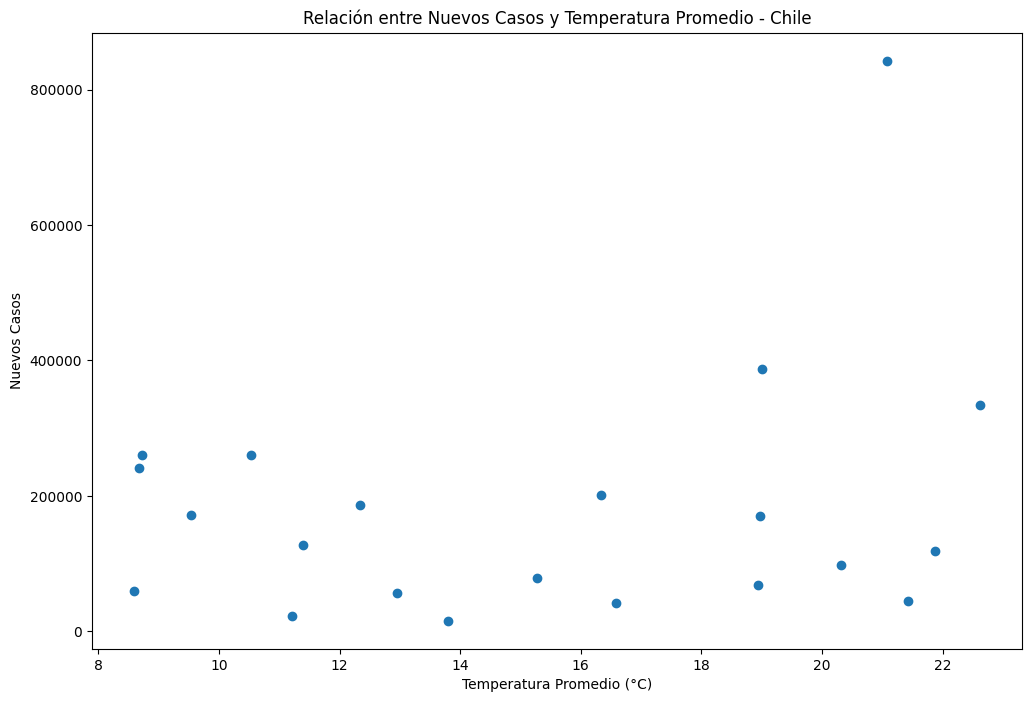

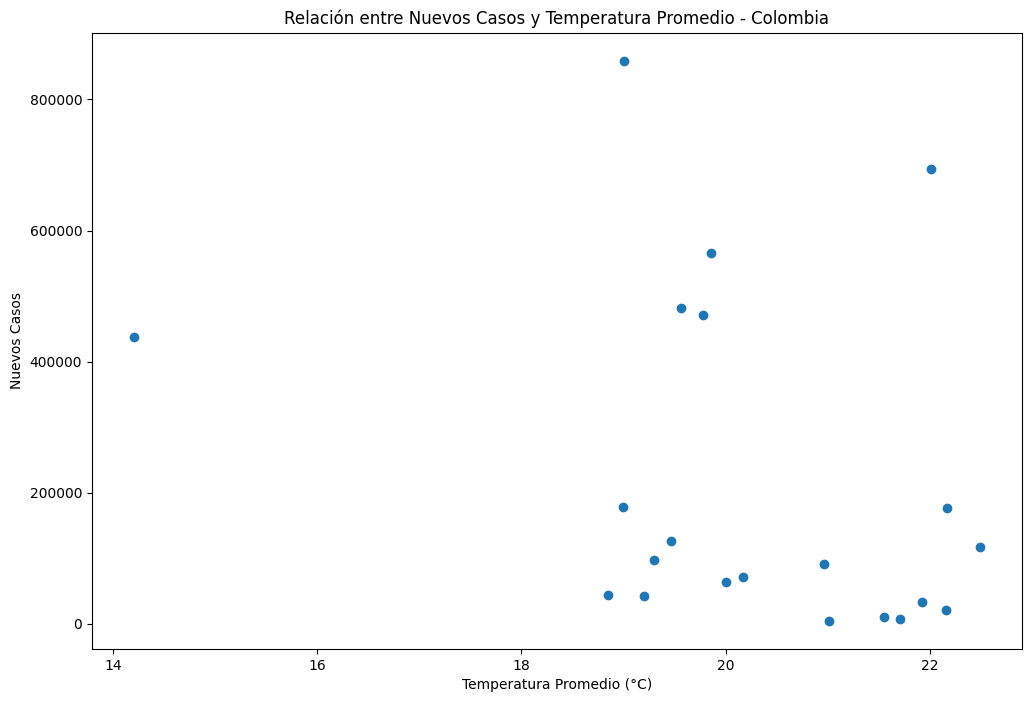

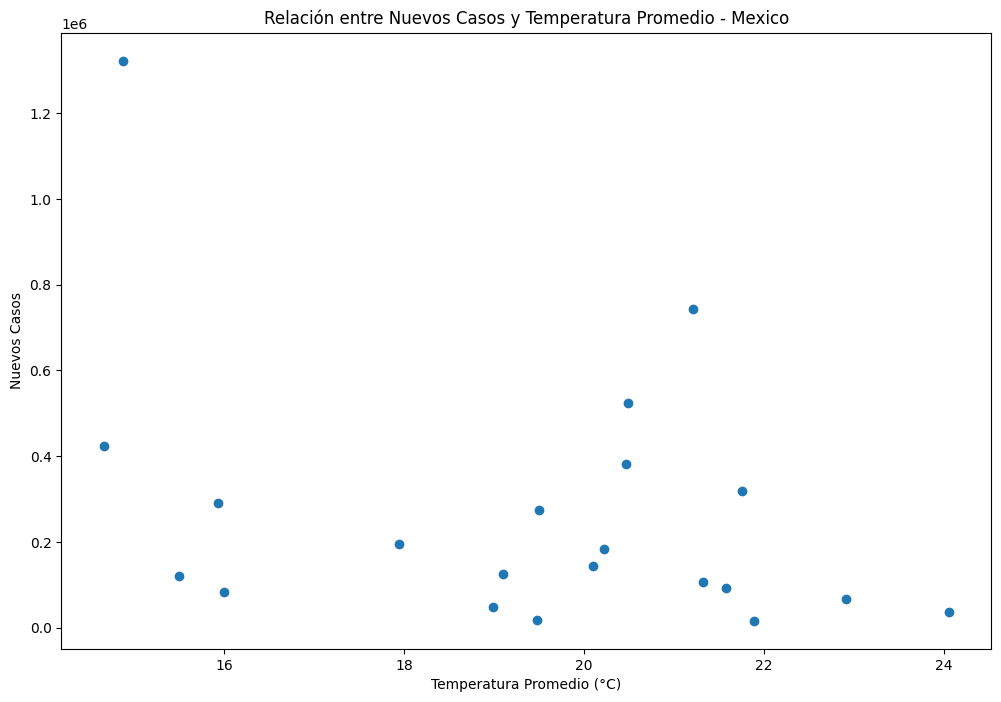

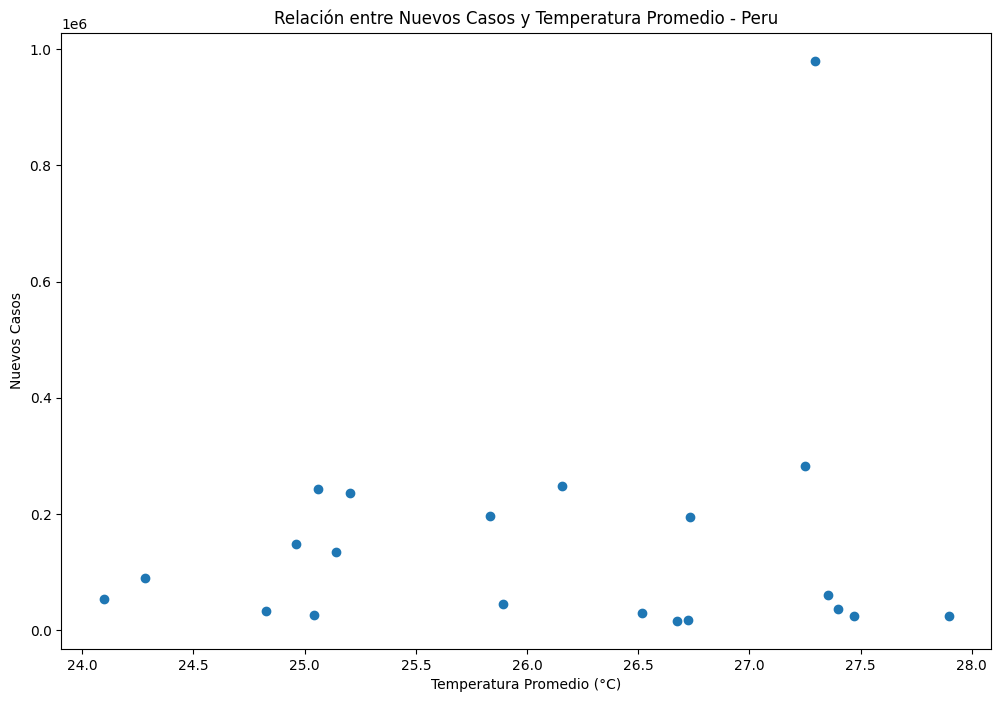

In [38]:
# Iterar sobre cada país único en el dataframe
for country in df_PI_filtrado_por_fecha['country_name'].unique():
    # Filtrar los datos del país actual y hacer una copia para evitar cambios no deseados
    country_data = df_PI_filtrado_por_fecha[df_PI_filtrado_por_fecha['country_name'] == country].copy()
    
    # Reiniciar el índice para facilitar el manejo de los datos
    country_data.reset_index(inplace=True)
    
    # Convertir la columna de fecha a tipo datetime y extraer el mes y el año
    country_data['date'] = pd.to_datetime(country_data['date'])
    country_data['month'] = country_data['date'].dt.month
    country_data['year'] = country_data['date'].dt.year
    
    # Agrupar por año y mes, sumando nuevos casos y calculando la temperatura promedio mensual
    country_data_monthly = country_data.groupby(['year', 'month']).agg({
        'new_confirmed': 'sum',
        'average_temperature_celsius': 'mean'
    })
    
    # Crear un gráfico de dispersión para cada país
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Graficar el diagrama de dispersión
    ax.scatter(country_data_monthly['average_temperature_celsius'], country_data_monthly['new_confirmed'])
    
    # Añadir título y etiquetas
    ax.set_title(f'Relación entre Nuevos Casos y Temperatura Promedio - {country}')
    ax.set_xlabel('Temperatura Promedio (°C)')
    ax.set_ylabel('Nuevos Casos')
    
    # Mostrar el gráfico
    plt.show()


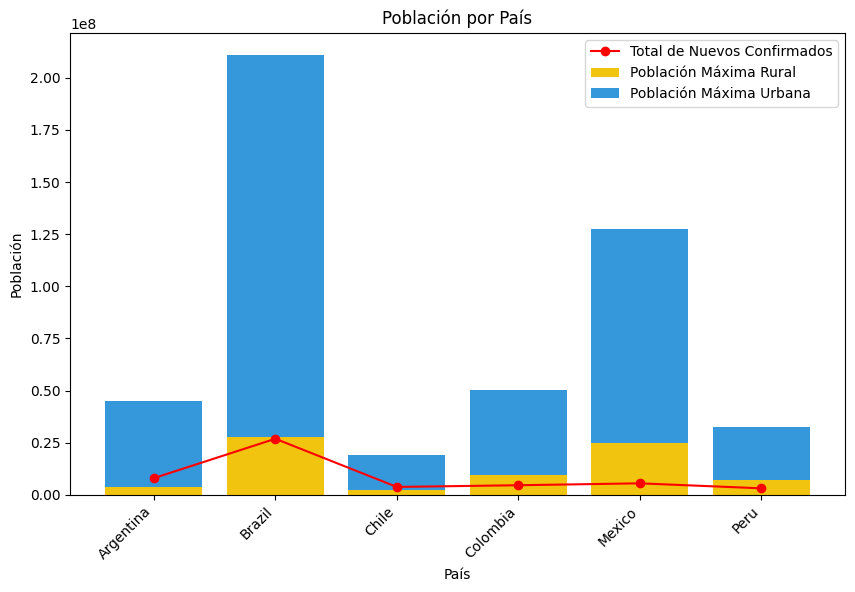

In [39]:
# Agrupa los datos por país y calcula las cantidades máximas de población urbana, población rural y nuevos casos confirmados totales
df_grouped = df_PI_filtrado_por_fecha.groupby('country_name').agg({
    'population_urban': 'max',         # Obtiene la máxima población urbana por país
    'population_rural': 'max',         # Obtiene la máxima población rural por país
    'new_confirmed': 'sum'             # Suma total de nuevos casos confirmados por país
})

# Renombra las columnas para mayor claridad en la visualización
df_grouped.columns = ['Población Máxima Urbana', 'Población Máxima Rural', 'Total de Nuevos Confirmados']

# Crea un gráfico de barras apiladas para comparar la población rural y urbana, y una línea para los nuevos casos confirmados
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index, df_grouped['Población Máxima Rural'], label='Población Máxima Rural', color='#f1c40f')
plt.bar(df_grouped.index, df_grouped['Población Máxima Urbana'], bottom=df_grouped['Población Máxima Rural'], label='Población Máxima Urbana', color='#3498db')
plt.plot(df_grouped.index, df_grouped['Total de Nuevos Confirmados'], label='Total de Nuevos Confirmados', color='r', marker='o')
plt.xlabel('País')
plt.ylabel('Población')
plt.title('Población por País')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


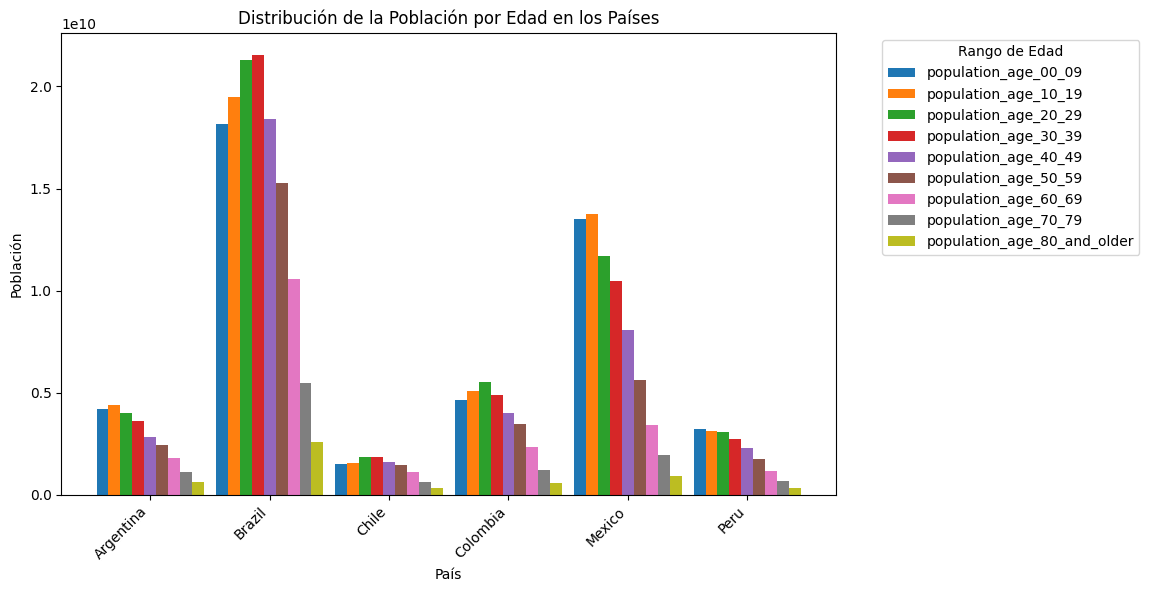

In [40]:
# Lista de nombres de columnas de población por edad
column_names = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Selecciona las columnas de población por edad del dataframe
df_ages = df_PI_filtrado_por_fecha[column_names]

# Agrupa los datos por país y suma las poblaciones en cada grupo de edad
df_grouped = df_PI_filtrado_por_fecha.groupby('country_name')[column_names].sum()

# Crea un gráfico de barras múltiples para visualizar la distribución de la población por edad en cada país
plt.figure(figsize=(10, 6))
x = range(len(df_grouped.index))  # Posiciones para las barras en el eje x
width = 0.1  # Ancho de las barras

# Itera sobre las columnas (rangos de edad) y crea las barras correspondientes
for i, col in enumerate(column_names):
    plt.bar([x_val - width * (len(column_names) - 1) / 2 + i * width for x_val in x],  # Posiciones ajustadas para cada grupo de edad
            df_grouped[col],  # Alturas de las barras correspondientes al grupo de edad actual
            width,  # Ancho de las barras
            label=col)  # Etiqueta para la leyenda

plt.xlabel('País')
plt.ylabel('Población')
plt.title('Distribución de la Población por Edad en los Países')
plt.xticks([x_val for x_val in x], df_grouped.index, rotation=45, ha='right')  # Etiquetas del eje x (países)
plt.legend(title='Rango de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda
plt.show()


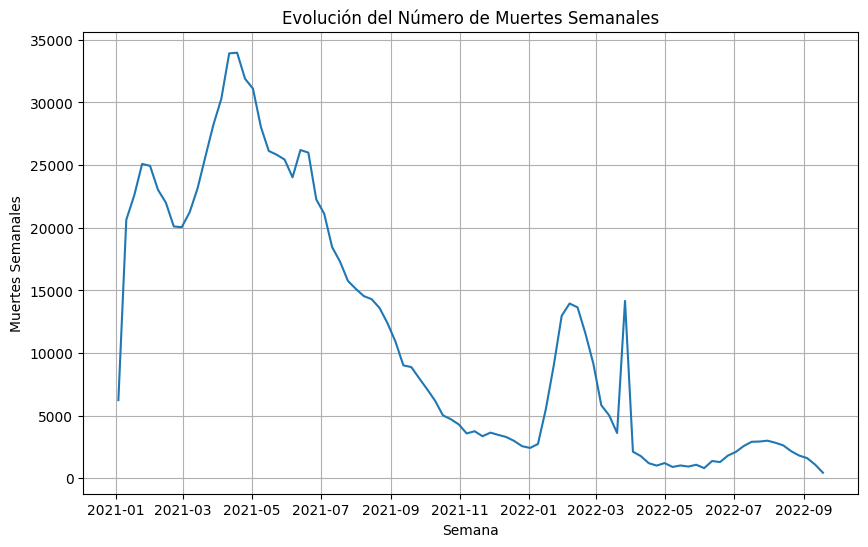

In [41]:
# Calcula el número de muertes semanales sumando los nuevos fallecidos por semana
df_deaths_weekly = df_PI_filtrado_por_fecha.resample('W')['new_deceased'].sum()

# Crea un gráfico de líneas para visualizar la evolución del número de muertes semanales
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura del gráfico
plt.plot(df_deaths_weekly.index, df_deaths_weekly.values)  # Dibuja el gráfico de líneas

# Configura etiquetas y título del gráfico
plt.xlabel('Semana')  # Etiqueta del eje x como "Semana"
plt.ylabel('Muertes Semanales')  # Etiqueta del eje y como "Muertes Semanales"
plt.title('Evolución del Número de Muertes Semanales')  # Título del gráfico

plt.grid(True)  # Muestra la rejilla en el gráfico
plt.show()  # Muestra el gráfico completo


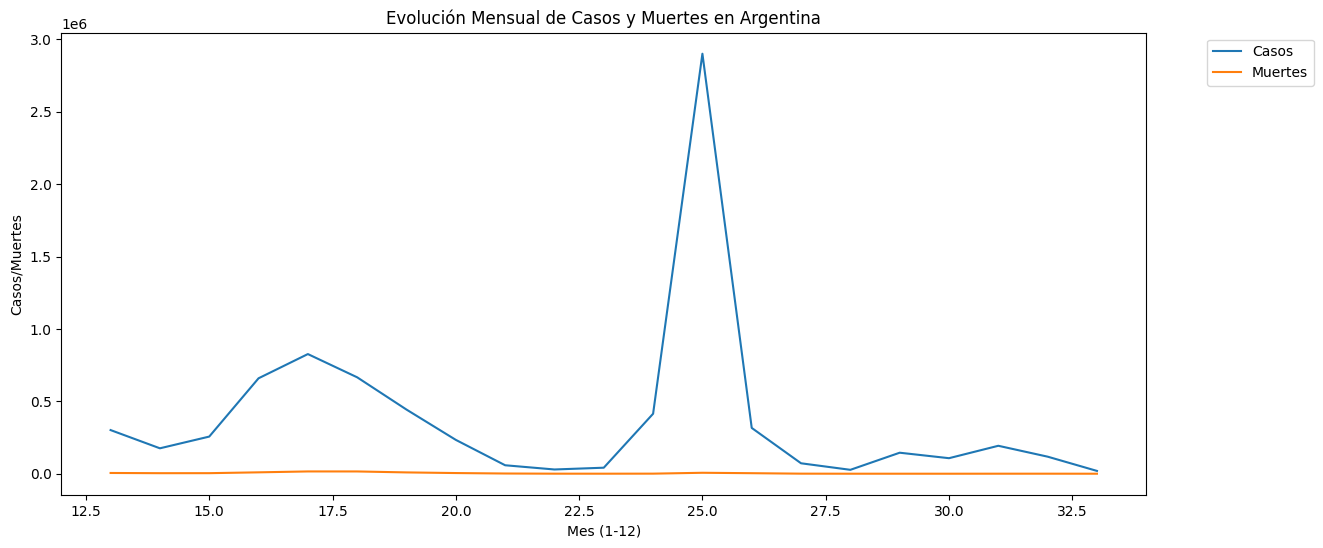

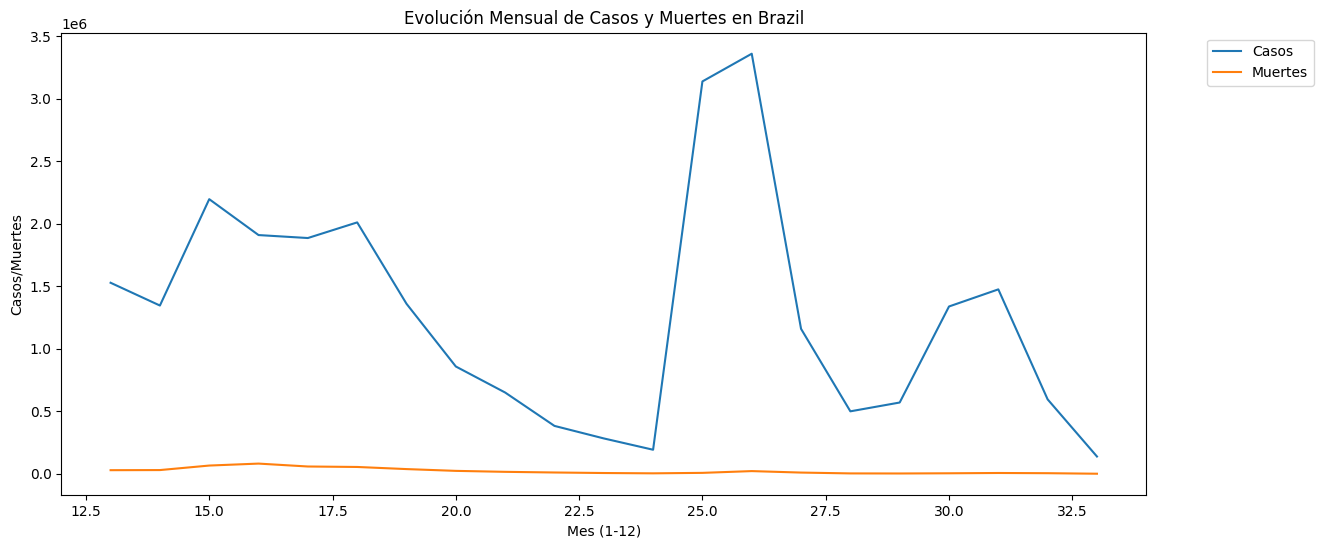

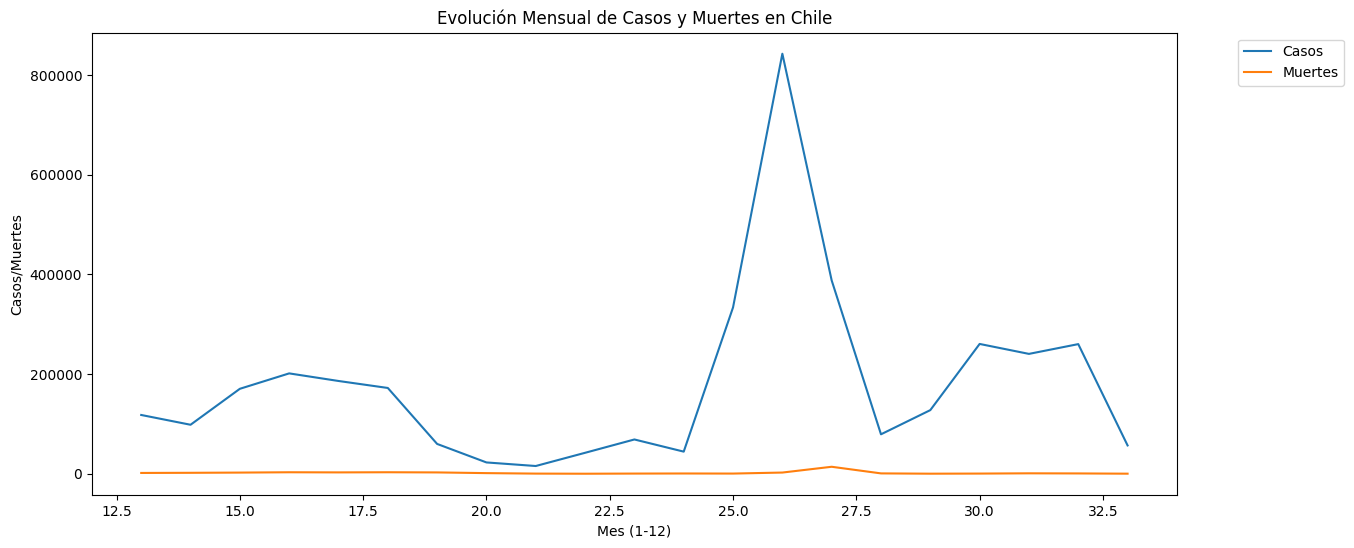

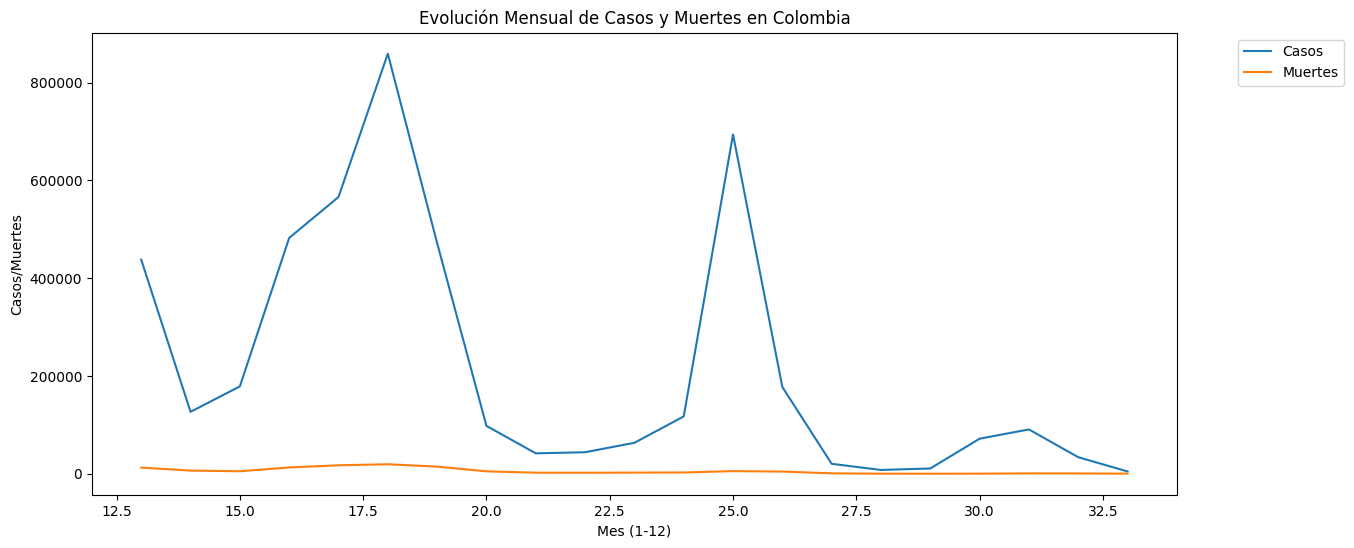

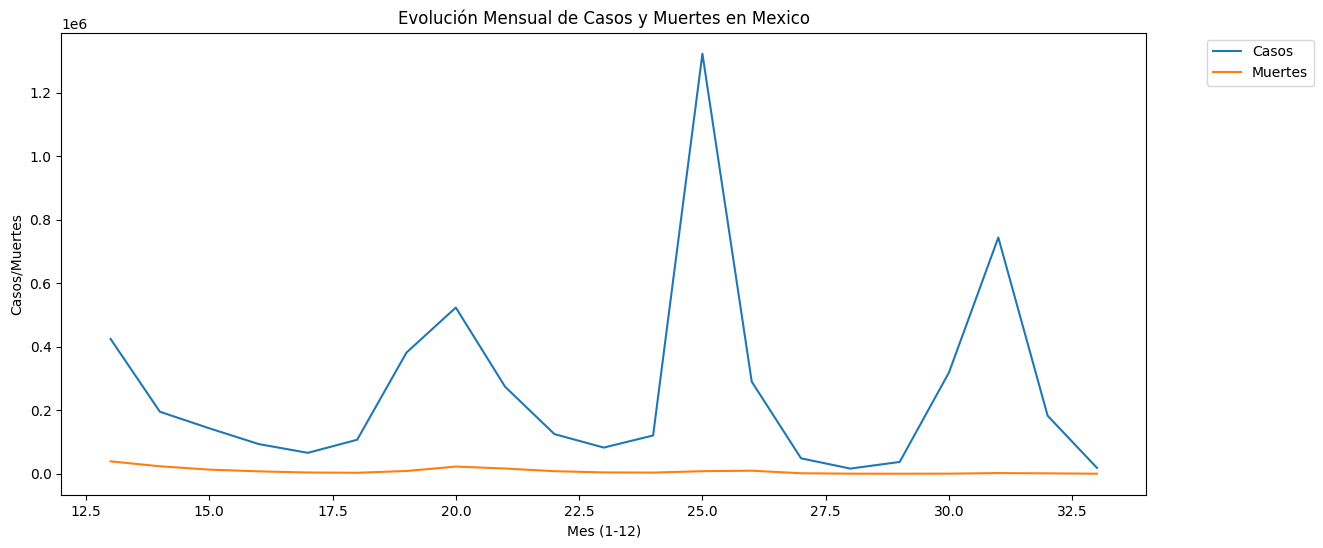

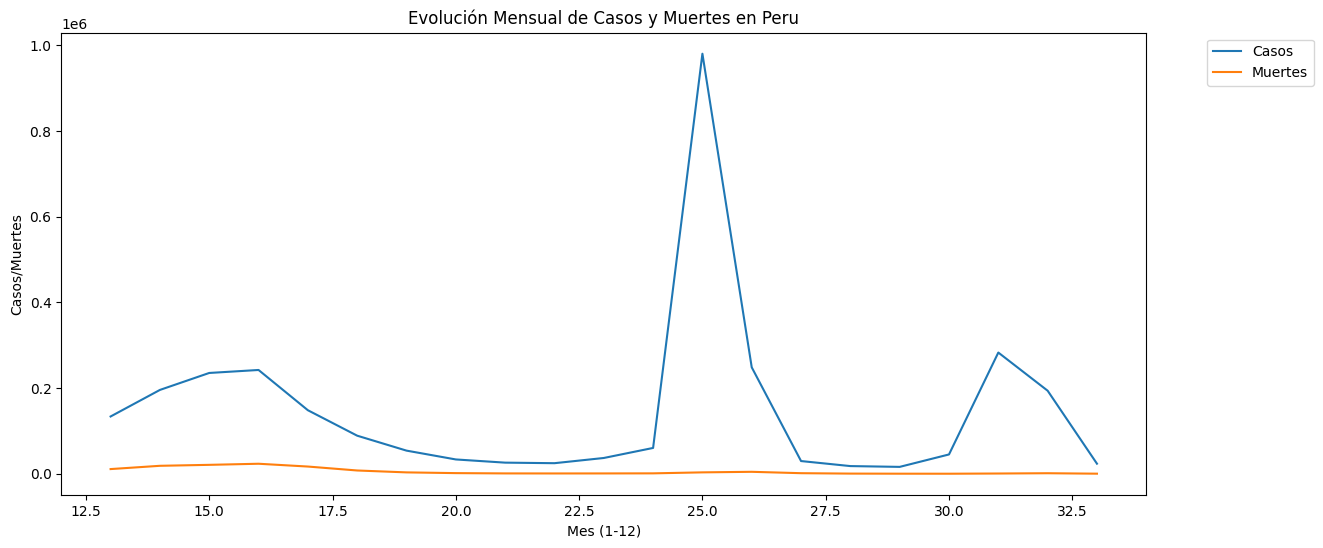

In [42]:
# Crear columnas para el mes y el año
df_PI_filtrado_por_fecha['month'] = df_PI_filtrado_por_fecha.index.month
df_PI_filtrado_por_fecha['year'] = df_PI_filtrado_por_fecha.index.year

# Agrupar por país, mes y año, y calcular la suma de casos y muertes
monthly_cases = df_PI_filtrado_por_fecha.groupby(['country_name', 'year', 'month'])['new_confirmed'].sum().reset_index()
monthly_deaths = df_PI_filtrado_por_fecha.groupby(['country_name', 'year', 'month'])['new_deceased'].sum().reset_index()

# Crear un gráfico separado para cada país
for country in monthly_cases['country_name'].unique():
    country_monthly_cases = monthly_cases[monthly_cases['country_name'] == country]
    country_monthly_deaths = monthly_deaths[monthly_deaths['country_name'] == country]
    
    # Calcular el número de meses desde enero de 2020 para el eje x
    x_months = country_monthly_cases['month'] + (country_monthly_cases['year'] - 2020) * 12
    
    # Crear figura para el gráfico
    plt.figure(figsize=(14, 6))
    
    # Dibujar líneas para casos y muertes mensuales
    plt.plot(x_months, country_monthly_cases['new_confirmed'], label='Casos')
    plt.plot(x_months, country_monthly_deaths['new_deceased'], label='Muertes')
    
    # Configurar etiquetas y título del gráfico
    plt.xlabel('Mes (1-12)')
    plt.ylabel('Casos/Muertes')
    plt.title(f'Evolución Mensual de Casos y Muertes en {country}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mostrar la leyenda fuera del gráfico
    plt.show()  # Mostrar el gráfico completo


C:\Users\Rembert\AppData\Local\Temp\ipykernel_9572\3248154535.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  population_monthly = group['population'].resample('M').mean()
C:\Users\Rembert\AppData\Local\Temp\ipykernel_9572\3248154535.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  deaths_monthly = group['new_deceased'].resample('M').sum()


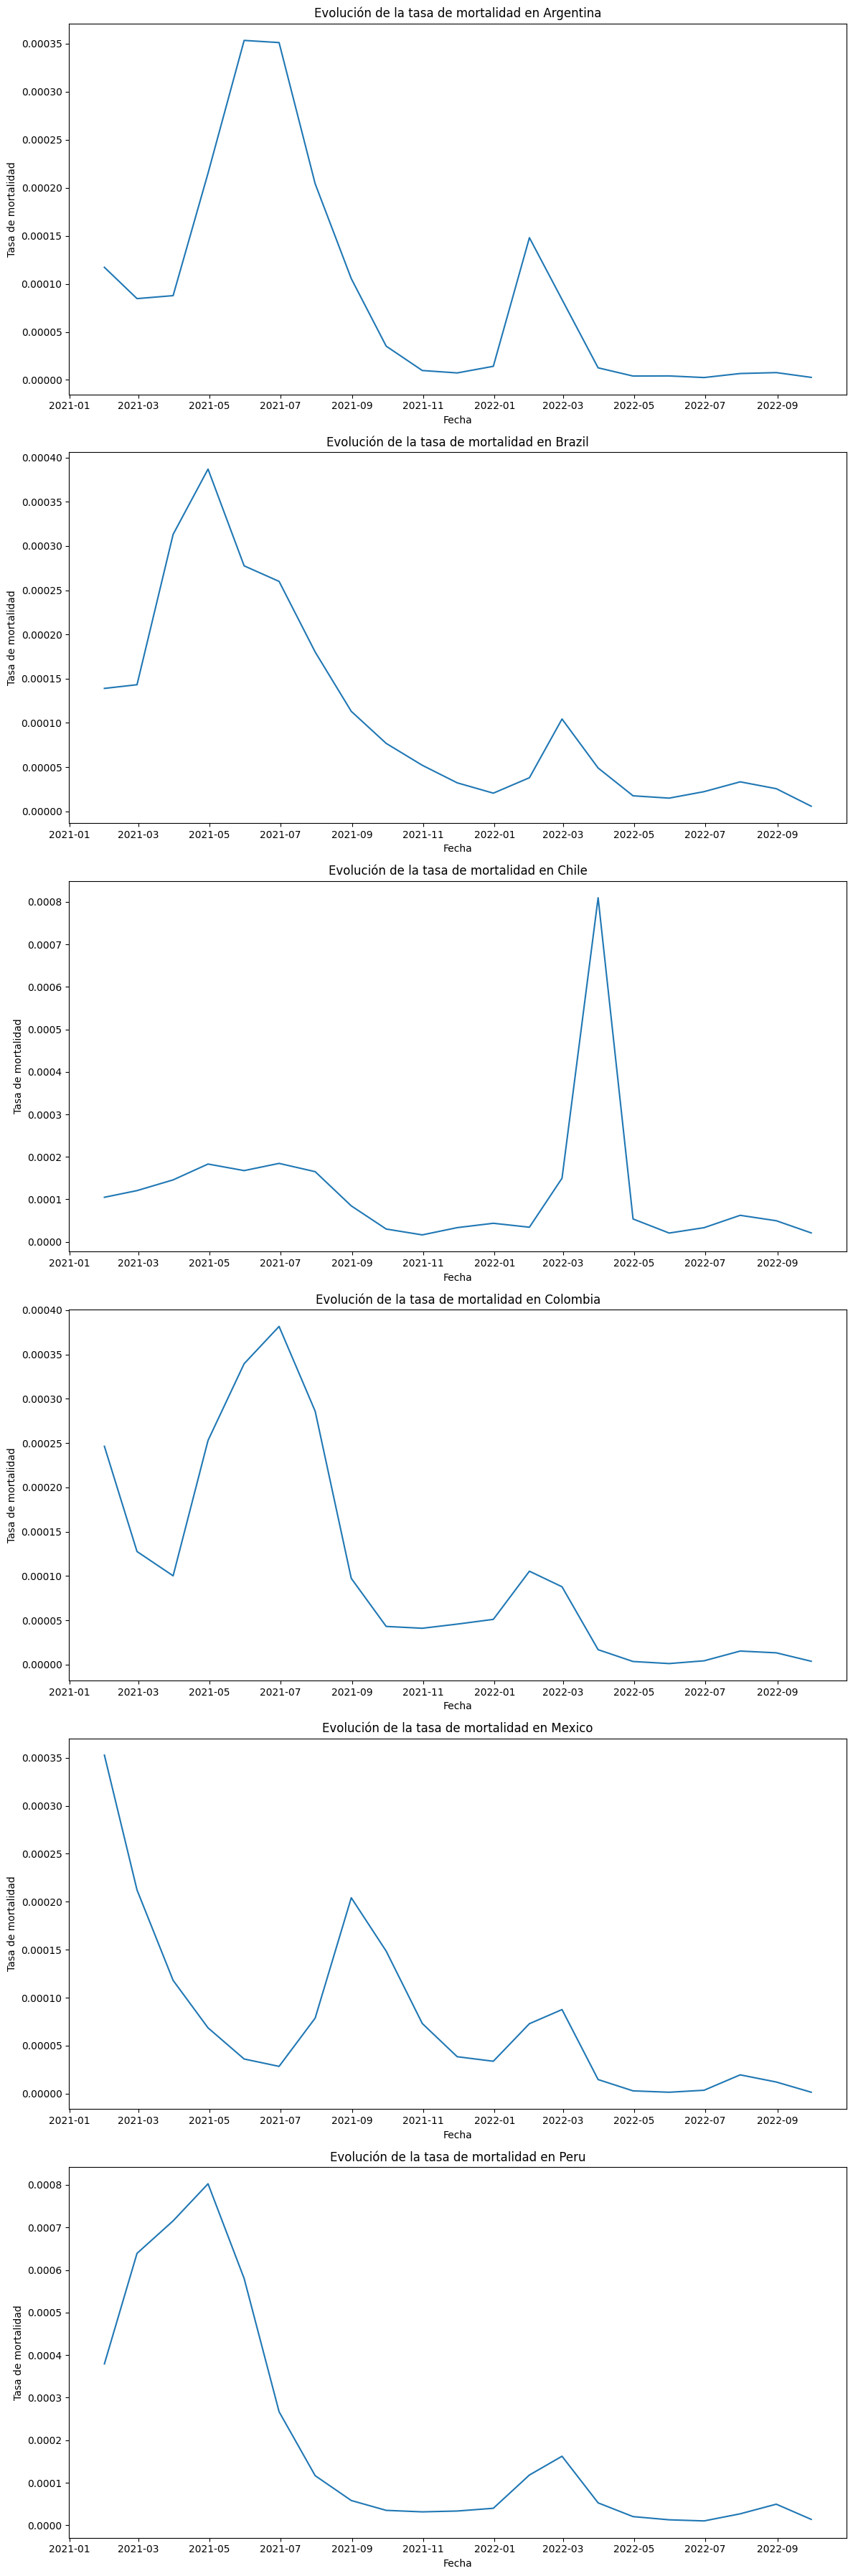

In [43]:
# Agrupar los datos por país
country_groups = df_PI_filtrado_por_fecha.groupby('country_name')

# Crear una figura con subplots para cada país
fig, axs = plt.subplots(nrows=len(country_groups), ncols=1, figsize=(12, 6*len(country_groups)))

# Iterar sobre cada país y crear un gráfico
for i, (country, group) in enumerate(country_groups):
    # Resamplear la población y los fallecidos para cada país a frecuencia mensual
    population_monthly = group['population'].resample('M').mean()
    deaths_monthly = group['new_deceased'].resample('M').sum()
    
    # Calcular la tasa de mortalidad mensual para cada país
    mortality_rate = deaths_monthly / population_monthly
    
    # Crear un gráfico de línea para cada país
    axs[i].plot(mortality_rate.index, mortality_rate.values)
    axs[i].set_title(f'Evolución de la tasa de mortalidad en {country}')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Tasa de mortalidad')

# Ajustar el diseño de los subplots para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico completo
plt.show()
